<a href="https://colab.research.google.com/github/JoyJiang97/NRC_vote_data/blob/main/6Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install openpyxl

In [4]:
# Define the file path (must match exactly where you saved it)
input_path = '/content/drive/Shareddrives/Nuclear/Projects/2025/NRC Commission vote efficiency/data/merged_data_clean.csv'

# Load the data
merged_cleaned = pd.read_csv(input_path)


In [5]:
merged_cleaned.head()

SECY_number                                    SRM Description  \
0  SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   
1  SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   
2  SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   
3  SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   
4  SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   

     SRM Date  SRM Year                                            SRM url  \
0  2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   
1  2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   
2  2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   
3  2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   
4  2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   

                                         Description   SECY Date  SECY Year  \
0  Pilot Program for NMSS Initiative on Streamlin...  2000-01-03       2000   
1  Pilot Program for NMSS Initiative on Streamlin...  2000-01-03       2000   
2  Pilot Program for NMSS Initiative on Streamlin...  2000-01-03       2000   
3  Pilot Program for NMSS Initiative on Streamlin...  2000-01-03       2000   
4  Pilot Program for NMSS Initiative on Streamlin...  2000-01-03       2000   

                                          SECY url detailed_type  ...  \
0  https://www.nrc.gov/docs/ML0036/ML003672266.pdf         Other  ...   
1  https://www.nrc.gov/docs/ML0036/ML003672266.pdf         Other  ...   
2  https://www.nrc.gov/docs/ML0036/ML003672266.pdf         Other  ...   
3  https://www.nrc.gov/docs/ML0036/ML003672266.pdf         Other  ...   
4  https://www.nrc.gov/docs/ML0036/ML003672266.pdf         Other  ...   

    Vote Date CVR Year valid_vote_date _merge_CVR  availability  \
0  2000-02-08     2000            True       both           all   
1  2000-01-13     2000            True       both           all   
2  2000-01-21     2000            True       both           all   
3  2000-01-11     2000            True       both           all   
4  2000-01-19     2000            True       both           all   

  SRM_Business_Days Vote_Business_Days Vote_SRM_Business_Days  first_vote  \
0              29.0               25.0                    4.0       False   
1              29.0                8.0                   21.0       False   
2              29.0               13.0                   16.0       False   
3              29.0                6.0                   23.0        True   
4              29.0               11.0                   18.0       False   

   last_vote  
0       True  
1      False  
2      False  
3      False  
4      False  

[5 rows x 23 columns]

In [6]:


unique_secy_counts = (
    merged_cleaned.groupby('availability')['SECY_number']
    .nunique(dropna=True)  # Counts unique non-null SECY_number
    .reset_index()
    .rename(columns={'SECY_number': 'unique_SECY_count'})
)

print(unique_secy_counts)



   availability  unique_SECY_count
0           CVR                  2
1   CVR and SRM                  6
2  SECY and CVR                  1
3  SECY and SRM                151
4     SECY only               2650
5      SRM only                 22
6           all               1048


In [7]:
##remove 2025
##both_data = merged_cleaned[merged_cleaned['SECY Year'] != 2025]
both_data = merged_cleaned

In [8]:

unique_secy_counts = (
    both_data.groupby('availability')['SECY_number']
    .nunique(dropna=True)  # Counts unique non-null SECY_number
    .reset_index()
    .rename(columns={'SECY_number': 'unique_SECY_count'})
)

print(unique_secy_counts)

   availability  unique_SECY_count
0           CVR                  2
1   CVR and SRM                  6
2  SECY and CVR                  1
3  SECY and SRM                151
4     SECY only               2650
5      SRM only                 22
6           all               1048


##Data analysis only for all (SECY, CVR and SRM)

In [9]:
# Filter the rows where '_merge' is 'both' (i.e., rows present in both DataFrames)
both_data = both_data[both_data['availability'] == 'all']


# Perform your analysis on the 'both' rows
# For example, let's check the first few rows of the filtered data
both_data.describe()


SRM Year    SECY Year     CVR Year  SRM_Business_Days  \
count  4430.000000  4430.000000  4430.000000        4430.000000   
mean   1979.017381  2007.088488  2007.088488          81.487810   
std     235.928113     7.696626     7.696626         130.087839   
min       0.000000  1997.000000  1997.000000           2.000000   
25%    2000.000000  2000.000000  2000.000000          26.000000   
50%    2006.000000  2006.000000  2006.000000          44.000000   
75%    2012.000000  2013.000000  2013.000000          84.000000   
max    2025.000000  2025.000000  2025.000000        1941.000000   

       Vote_Business_Days  Vote_SRM_Business_Days  
count         4430.000000             4430.000000  
mean            53.060271               28.427540  
std            104.886197               67.285782  
min              0.000000                0.000000  
25%             12.000000                8.000000  
50%             23.000000               15.000000  
75%             50.000000               28.000000  
max           1271.000000             1791.000000

In [10]:

unique_secy_counts = (
    both_data.groupby('availability')['SECY_number']
    .nunique(dropna=True)  # Counts unique non-null SECY_number
    .reset_index()
    .rename(columns={'SECY_number': 'unique_SECY_count'})
)

print(unique_secy_counts)

  availability  unique_SECY_count
0          all               1048


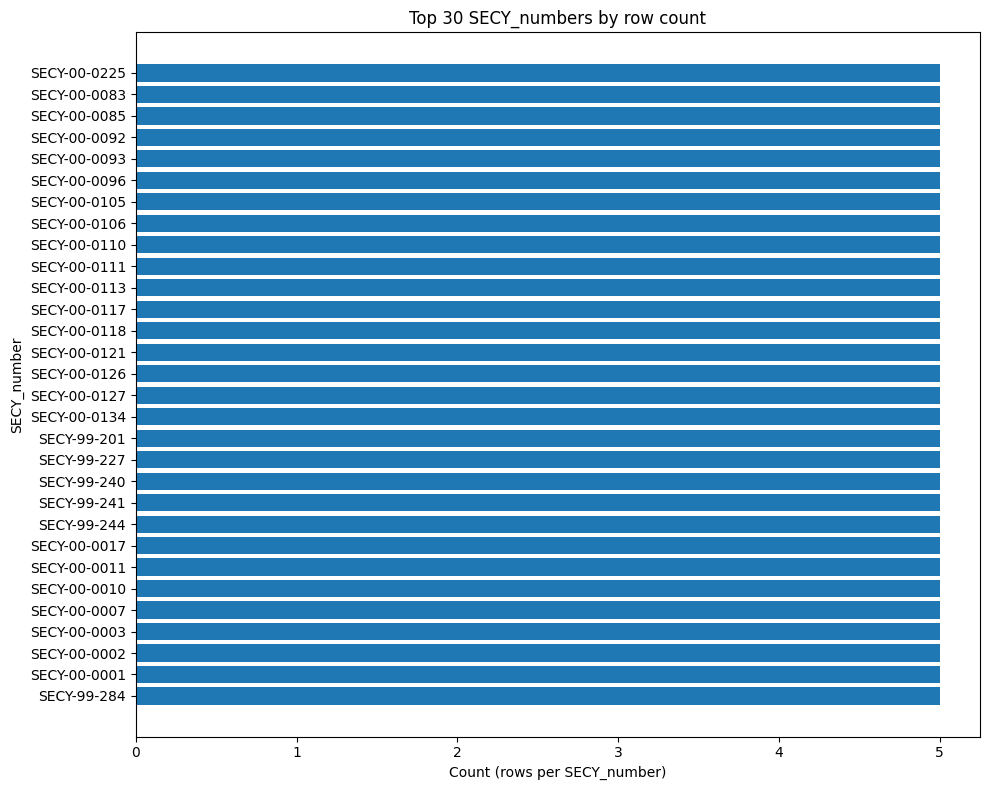

In [11]:
import matplotlib.pyplot as plt

counts = both_data['SECY_number'].value_counts()

top_n = 30
top = counts.head(top_n).sort_values(ascending=True)  # horizontal bar needs ascending

plt.figure(figsize=(10, 8))
plt.barh(top.index.astype(str), top.values)
plt.xlabel('Count (rows per SECY_number)')
plt.ylabel('SECY_number')
plt.title(f'Top {top_n} SECY_numbers by row count')
plt.tight_layout()
plt.show()

##merge the correct info/all terms

In [12]:
# Load the specified Excel file from the user's Google Drive path
file_path = "/content/drive/Shareddrives/Nuclear/Projects/2025/NRC Commission vote efficiency/data/NRC_All_Terms.xlsx"
all_term_data = pd.read_excel(file_path)

In [13]:
all_term_data.head()

Full Name Last Name       Date   Role Party Affiliation Start Date  \
0  William A. Anders    Anders 1975-01-19  Chair        Republican 1975-01-19   
1  William A. Anders    Anders 1975-01-20  Chair        Republican 1975-01-19   
2  William A. Anders    Anders 1975-01-21  Chair        Republican 1975-01-19   
3  William A. Anders    Anders 1975-01-22  Chair        Republican 1975-01-19   
4  William A. Anders    Anders 1975-01-23  Chair        Republican 1975-01-19   

    End Date Gender Chair at That Time  Cumulative Days Served  Term Number  
0 1976-04-20   Male             Anders                       1            1  
1 1976-04-20   Male             Anders                       2            1  
2 1976-04-20   Male             Anders                       3            1  
3 1976-04-20   Male             Anders                       4            1  
4 1976-04-20   Male             Anders                       5            1

In [14]:

# Prepare data for merge
all_term_data['Last Name'] = all_term_data['Last Name'].str.strip().str.upper()
both_data['voter'] = both_data['voter'].str.upper().str.extract(r'([A-Z]+)', expand=False)
both_data['Vote Date'] = pd.to_datetime(both_data['Vote Date'], errors='coerce')
all_term_data['Date'] = pd.to_datetime(all_term_data['Date'], errors='coerce')

# Merge on name and date
merged_with_allterm = pd.merge(
    both_data,
    all_term_data,
    how='left',
    left_on=['voter', 'Vote Date'],
    right_on=['Last Name', 'Date']
)

# Check the results of the merge
matched = merged_with_allterm[merged_with_allterm['Role'].notna()]
unmatched = merged_with_allterm[merged_with_allterm['Role'].isna()]

# Count matched and unmatched rows
matched_count = matched.shape[0]
unmatched_count = unmatched.shape[0]



/tmp/ipython-input-3369644887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_data['voter'] = both_data['voter'].str.upper().str.extract(r'([A-Z]+)', expand=False)
/tmp/ipython-input-3369644887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_data['Vote Date'] = pd.to_datetime(both_data['Vote Date'], errors='coerce')


In [15]:
# Get unique SECY numbers from unmatched rows
unmatched_secy_numbers = unmatched['SECY_number'].dropna().unique()

matched_count, unmatched_count, unmatched_secy_numbers[:10]  # Show only the first 10 for brevity

(4430, 0, array([], dtype=object))

In [16]:
merged_with_allterm = merged_with_allterm.rename(columns={'Role': 'Role at CVR'})
merged_with_allterm = merged_with_allterm.rename(columns={'Chair at That Time': 'Chair at CVR'})
merged_with_allterm = merged_with_allterm.rename(columns={'Start Date': 'voter Start Date'})
merged_with_allterm = merged_with_allterm.rename(columns={'End Date': 'voter End Date'})

In [17]:
merged_with_allterm = merged_with_allterm.drop(columns=['Date', 'Full Name', 'Last Name'], errors='ignore')

pd.set_option('display.max_columns', None)
merged_with_allterm.head()

SECY_number                                    SRM Description  \
0  SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   
1  SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   
2  SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   
3  SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   
4  SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   

     SRM Date  SRM Year                                            SRM url  \
0  2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   
1  2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   
2  2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   
3  2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   
4  2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   

                                         Description   SECY Date  SECY Year  \
0  Pilot Program for NMSS Initiative on Streamlin...  2000-01-03       2000   
1  Pilot Program for NMSS Initiative on Streamlin...  2000-01-03       2000   
2  Pilot Program for NMSS Initiative on Streamlin...  2000-01-03       2000   
3  Pilot Program for NMSS Initiative on Streamlin...  2000-01-03       2000   
4  Pilot Program for NMSS Initiative on Streamlin...  2000-01-03       2000   

                                          SECY url detailed_type  \
0  https://www.nrc.gov/docs/ML0036/ML003672266.pdf         Other   
1  https://www.nrc.gov/docs/ML0036/ML003672266.pdf         Other   
2  https://www.nrc.gov/docs/ML0036/ML003672266.pdf         Other   
3  https://www.nrc.gov/docs/ML0036/ML003672266.pdf         Other   
4  https://www.nrc.gov/docs/ML0036/ML003672266.pdf         Other   

         _merge  title       voter  Vote Date  CVR Year valid_vote_date  \
0  SECY and SRM  COMR.        DIAZ 2000-02-08      2000            True   
1  SECY and SRM  COMR.       DICUS 2000-01-13      2000            True   
2  SECY and SRM  COMR.  MCGAFFIGAN 2000-01-21      2000            True   
3  SECY and SRM  COMR.  MERRIFIELD 2000-01-11      2000            True   
4  SECY and SRM  CHRM.     MESERVE 2000-01-19      2000            True   

  _merge_CVR availability  SRM_Business_Days  Vote_Business_Days  \
0       both          all               29.0                25.0   
1       both          all               29.0                 8.0   
2       both          all               29.0                13.0   
3       both          all               29.0                 6.0   
4       both          all               29.0                11.0   

   Vote_SRM_Business_Days  first_vote  last_vote   Role at CVR  \
0                     4.0       False       True  Commissioner   
1                    21.0       False      False  Commissioner   
2                    16.0       False      False  Commissioner   
3                    23.0        True      False  Commissioner   
4                    18.0       False      False         Chair   

  Party Affiliation voter Start Date voter End Date  Gender Chair at CVR  \
0        Republican       1996-08-23     2001-06-30    Male      Meserve   
1          Democrat       1999-10-29     2003-06-30  Female      Meserve   
2          Democrat       1996-08-28     2005-06-30    Male      Meserve   
3        Republican       1998-10-23     2002-06-30    Male      Meserve   
4          Democrat       1999-10-29     2003-03-31    Male      Meserve   

   Cumulative Days Served  Term Number  
0                    1265            1  
1                    1311            4  
2                    1242            1  
3                     446            1  
4                      83            1

Just merge chair stuff

In [18]:
import numpy as np

all_term_data['matched'] = True
merged_with_allterm['SECY Date'] = pd.to_datetime(merged_with_allterm['SECY Date'], errors='coerce')

# Only keep "chair" rows for matching
all_term_chair = all_term_data[all_term_data['Role'].astype(str).str.strip().str.upper().eq('CHAIR')].copy()

# Merge on Last Name and SECY introduction date
merged_with_allterm = pd.merge(
    merged_with_allterm,
    all_term_chair[['Last Name', 'Date', 'matched','Role','Chair at That Time','Start Date','End Date']],
    how='left',
    left_on=['SECY Date'],
    right_on=['Date']
)

merged_with_allterm = merged_with_allterm.rename(columns={'Role': 'Role at SECY'})
merged_with_allterm = merged_with_allterm.rename(columns={'Chair at That Time': 'Chair at SECY'})
merged_with_allterm = merged_with_allterm.rename(columns={'Start Date': 'Chair at SECY Start Date'})
merged_with_allterm = merged_with_allterm.rename(columns={'End Date': 'Chair at SECY End Date'})

In [19]:
cols = ['Chair at SECY', 'Chair at SECY Start Date', 'Chair at SECY End Date']

# (recommended) ensure dates are datetimes
merged_with_allterm['Chair at SECY Start Date'] = pd.to_datetime(
    merged_with_allterm['Chair at SECY Start Date'], errors='coerce'
)
merged_with_allterm['Chair at SECY End Date'] = pd.to_datetime(
    merged_with_allterm['Chair at SECY End Date'], errors='coerce'
)

# propagate within each SECY_numbers
merged_with_allterm[cols] = (
    merged_with_allterm
    .sort_values(['SECY_number'])   # optional; helpful if you later use ffill
    .groupby('SECY_number')[cols]
    .transform(lambda s: s.ffill().bfill())
)


/tmp/ipython-input-3098981020.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda s: s.ffill().bfill())


In [20]:
merged_with_allterm[merged_with_allterm['SECY_number'] == 'SECY-21-0088']

SECY_number                                    SRM Description  \
3180  SECY-21-0088  Denial of Petition Rulemaking on Alternative M...   
3181  SECY-21-0088  Denial of Petition Rulemaking on Alternative M...   
3182  SECY-21-0088  Denial of Petition Rulemaking on Alternative M...   
3183  SECY-21-0088  Denial of Petition Rulemaking on Alternative M...   

        SRM Date  SRM Year                                           SRM url  \
3180  2025-06-18      2021  https://www.nrc.gov/docs/ML2516/ML25164A112.html   
3181  2025-06-18      2021  https://www.nrc.gov/docs/ML2516/ML25164A112.html   
3182  2025-06-18      2021  https://www.nrc.gov/docs/ML2516/ML25164A112.html   
3183  2025-06-18      2021  https://www.nrc.gov/docs/ML2516/ML25164A112.html   

                                            Description  SECY Date  SECY Year  \
3180  Denial of Petition Rulemaking on Alternative M... 2021-10-14       2021   
3181  Denial of Petition Rulemaking on Alternative M... 2021-10-14       2021   
3182  Denial of Petition Rulemaking on Alternative M... 2021-10-14       2021   
3183  Denial of Petition Rulemaking on Alternative M... 2021-10-14       2021   

                                              SECY url detailed_type  \
3180  https://www.nrc.gov/docs/ML2030/ML20304A000.html         Other   
3181  https://www.nrc.gov/docs/ML2030/ML20304A000.html         Other   
3182  https://www.nrc.gov/docs/ML2030/ML20304A000.html         Other   
3183  https://www.nrc.gov/docs/ML2030/ML20304A000.html         Other   

            _merge  title    voter  Vote Date  CVR Year valid_vote_date  \
3180  SECY and SRM   Cmr.   CAPUTO 2024-04-23      2021            True   
3181  SECY and SRM   Cmr.  CROWELL 2025-04-10      2021            True   
3182  SECY and SRM   Cmr.  MARZANO 2025-05-30      2021            True   
3183  SECY and SRM  Chair   WRIGHT 2025-05-30      2021            True   

     _merge_CVR availability  SRM_Business_Days  Vote_Business_Days  \
3180       both          all              919.0               630.0   
3181       both          all              919.0               871.0   
3182       both          all              919.0               906.0   
3183       both          all              919.0               906.0   

      Vote_SRM_Business_Days  first_vote  last_vote   Role at CVR  \
3180                   289.0        True      False  Commissioner   
3181                    48.0       False      False  Commissioner   
3182                    13.0       False       True  Commissioner   
3183                    13.0       False      False         Chair   

     Party Affiliation voter Start Date voter End Date  Gender Chair at CVR  \
3180        Republican       2022-08-09     2025-08-01  Female       Hanson   
3181          Democrat       2022-08-26     2027-06-30    Male       Wright   
3182          Democrat       2025-01-08     2028-06-30    Male       Wright   
3183        Republican       2025-01-20     2025-06-30    Male       Wright   

      Cumulative Days Served  Term Number Last Name       Date matched  \
3180                    1753            2    HANSON 2021-10-14    True   
3181                     959            1    HANSON 2021-10-14    True   
3182                     143            1    HANSON 2021-10-14    True   
3183                    2558            2    HANSON 2021-10-14    True   

     Role at SECY Chair at SECY Chair at SECY Start Date  \
3180        Chair        Hanson               2021-01-20   
3181        Chair        Hanson               2021-01-20   
3182        Chair        Hanson               2021-01-20   
3183        Chair        Hanson               2021-01-20   

     Chair at SECY End Date  
3180             2025-01-19  
3181             2025-01-19  
3182             2025-01-19  
3183             2025-01-19

In [21]:
merged_with_allterm = merged_with_allterm.drop(columns=['Last Name', 'Date', 'matched','Role at SECY'], errors='ignore')
merged_with_allterm.head()

SECY_number                                    SRM Description  \
0  SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   
1  SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   
2  SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   
3  SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   
4  SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   

     SRM Date  SRM Year                                            SRM url  \
0  2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   
1  2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   
2  2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   
3  2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   
4  2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   

                                         Description  SECY Date  SECY Year  \
0  Pilot Program for NMSS Initiative on Streamlin... 2000-01-03       2000   
1  Pilot Program for NMSS Initiative on Streamlin... 2000-01-03       2000   
2  Pilot Program for NMSS Initiative on Streamlin... 2000-01-03       2000   
3  Pilot Program for NMSS Initiative on Streamlin... 2000-01-03       2000   
4  Pilot Program for NMSS Initiative on Streamlin... 2000-01-03       2000   

                                          SECY url detailed_type  \
0  https://www.nrc.gov/docs/ML0036/ML003672266.pdf         Other   
1  https://www.nrc.gov/docs/ML0036/ML003672266.pdf         Other   
2  https://www.nrc.gov/docs/ML0036/ML003672266.pdf         Other   
3  https://www.nrc.gov/docs/ML0036/ML003672266.pdf         Other   
4  https://www.nrc.gov/docs/ML0036/ML003672266.pdf         Other   

         _merge  title       voter  Vote Date  CVR Year valid_vote_date  \
0  SECY and SRM  COMR.        DIAZ 2000-02-08      2000            True   
1  SECY and SRM  COMR.       DICUS 2000-01-13      2000            True   
2  SECY and SRM  COMR.  MCGAFFIGAN 2000-01-21      2000            True   
3  SECY and SRM  COMR.  MERRIFIELD 2000-01-11      2000            True   
4  SECY and SRM  CHRM.     MESERVE 2000-01-19      2000            True   

  _merge_CVR availability  SRM_Business_Days  Vote_Business_Days  \
0       both          all               29.0                25.0   
1       both          all               29.0                 8.0   
2       both          all               29.0                13.0   
3       both          all               29.0                 6.0   
4       both          all               29.0                11.0   

   Vote_SRM_Business_Days  first_vote  last_vote   Role at CVR  \
0                     4.0       False       True  Commissioner   
1                    21.0       False      False  Commissioner   
2                    16.0       False      False  Commissioner   
3                    23.0        True      False  Commissioner   
4                    18.0       False      False         Chair   

  Party Affiliation voter Start Date voter End Date  Gender Chair at CVR  \
0        Republican       1996-08-23     2001-06-30    Male      Meserve   
1          Democrat       1999-10-29     2003-06-30  Female      Meserve   
2          Democrat       1996-08-28     2005-06-30    Male      Meserve   
3        Republican       1998-10-23     2002-06-30    Male      Meserve   
4          Democrat       1999-10-29     2003-03-31    Male      Meserve   

   Cumulative Days Served  Term Number Chair at SECY Chair at SECY Start Date  \
0                    1265            1       Meserve               1999-10-29   
1                    1311            4       Meserve               1999-10-29   
2                    1242            1       Meserve               1999-10-29   
3                     446            1       Meserve               1999-10-29   
4                      83            1       Meserve               1999-10-29   

  Chair at SECY End Date  
0       

In [22]:
import numpy as np

all_term_data['matched'] = True

# Step 3: Ensure SECY Date is datetime
all_term_data['Last Name'] = all_term_data['Last Name'].str.strip().str.upper()
merged_with_allterm['voter'] = merged_with_allterm['voter'].str.upper().str.extract(r'([A-Z]+)', expand=False)
merged_with_allterm['SECY Date'] = pd.to_datetime(merged_with_allterm['SECY Date'], errors='coerce')

# Merge on Last Name and SECY introduction date
merged_with_allterm = pd.merge(
    merged_with_allterm,
    all_term_data[['Last Name', 'Date', 'matched','Role']],
    how='left',
    left_on=['voter', 'SECY Date'],
    right_on=['Last Name', 'Date']
)

merged_with_allterm = merged_with_allterm.rename(columns={'Role': 'Role at SECY'})

In [23]:
matched_rows = merged_with_allterm['matched'].sum()
unmatched_rows = merged_with_allterm['matched'].isna().sum()

print("✅ Matched rows (successful left join):", matched_rows)
print("❌ Unmatched rows (no match from right):", unmatched_rows)


✅ Matched rows (successful left join): 4224
❌ Unmatched rows (no match from right): 206


In [24]:
# Ensure date columns are datetime
merged_with_allterm['SECY Date'] = pd.to_datetime(merged_with_allterm['SECY Date'], errors='coerce')
merged_with_allterm['voter Start Date'] = pd.to_datetime(merged_with_allterm['voter Start Date'], errors='coerce')

# Create the flag
merged_with_allterm['SECY_before_term'] = merged_with_allterm['SECY Date'] < merged_with_allterm['voter Start Date']

# Filter the unmatched rows
unmatched_rows_df = merged_with_allterm[merged_with_allterm['matched'].isna()]

# Get unique SECY numbers from unmatched rows
unmatched_secy_numbers = unmatched_rows_df['SECY_number'].unique()

unmatched_secy_numbers

# Check if all unmatched rows have SECY introduced before term start
all_before_term = unmatched_rows_df['SECY_before_term'].all()

print("✅ All unmatched rows have SECY introduced before term start." if all_before_term else "❌ Not all unmatched rows have SECY introduced before term start.")



✅ All unmatched rows have SECY introduced before term start.


In [25]:
unmatched_secy_numbers

array(['SECY-01-0148', 'SECY-01-0162', 'SECY-02-0122', 'SECY-02-0127',
       'SECY-02-0132', 'SECY-02-0133', 'SECY-02-0135', 'SECY-02-0138',
       'SECY-04-0236', 'SECY-05-0005', 'SECY-05-0017', 'SECY-05-0019',
       'SECY-05-0020', 'SECY-05-0151', 'SECY-05-0170', 'SECY-05-0172',
       'SECY-06-0117', 'SECY-06-0139', 'SECY-06-0142', 'SECY-06-0144',
       'SECY-07-0225', 'SECY-08-0024', 'SECY-08-0028', 'SECY-08-0029',
       'SECY-08-0033', 'SECY-08-0036', 'SECY-09-0042', 'SECY-09-0090',
       'SECY-09-0140', 'SECY-09-0162', 'SECY-09-0179', 'SECY-09-0181',
       'SECY-09-0183', 'SECY-09-0190', 'SECY-10-0018', 'SECY-10-0024',
       'SECY-10-0031', 'SECY-11-0163', 'SECY-12-0034', 'SECY-12-0047',
       'SECY-12-0053', 'SECY-12-0063', 'SECY-12-0064', 'SECY-12-0071',
       'SECY-12-0076', 'SECY-12-0079', 'SECY-12-0081', 'SECY-12-0091',
       'SECY-12-0092', 'SECY-14-0077', 'SECY-14-0082', 'SECY-14-0087',
       'SECY-14-0088', 'SECY-14-0089', 'SECY-14-0100', 'SECY-14-0112',
      

In [26]:
# Filter for rows meeting both conditions
secy_before_term_missing_name = merged_with_allterm[
    (merged_with_allterm['SECY_before_term'] == True) &
    (merged_with_allterm['Last Name'].isna())
]

# Display the relevant records
secy_before_term_missing_name



SECY_number                                    SRM Description  \
459   SECY-01-0148  Processes for Revision of 10 CFR Part 20 Regar...   
464   SECY-01-0162  Staff Plans for Proceeding with the Risk-Infor...   
603   SECY-02-0122  Staff Review Guidance for Gaseous Diffusion Pl...   
608   SECY-02-0127  Proposed Response to State of Ohio on Its Assu...   
613   SECY-02-0132  Proposed Rule: Revision of 10 CFR 50.48 to Per...   
...            ...                                                ...   
4347   SECY-99-241  Rulemaking Plan, Physical Security Requirement...   
4352   SECY-99-244  Memo regarding Location of the NRC'S Technical...   
4357   SECY-99-246  Proposed Guidelines for Applying Risk-Informed...   
4366   SECY-99-250  National Materials Program: Request Approval o...   
4371   SECY-99-251  Policy Statement on Staff Meetings Open to the...   

        SRM Date  SRM Year                                            SRM url  \
459   2002-04-12      2001  https://www.nrc.gov/sites/default/files/doc_li...   
464   2001-12-31      2001  https://www.nrc.gov/sites/default/files/doc_li...   
603   2002-09-10      2002  https://www.nrc.gov/sites/default/files/doc_li...   
608   2002-09-05      2002  https://www.nrc.gov/sites/default/files/doc_li...   
613   2002-10-03      2002  https://www.nrc.gov/reading-rm/doc-collections...   
...          ...       ...                                                ...   
4347  1999-11-22      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4352  2000-03-16      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4357  2000-01-05      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4366  1999-11-23      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4371  1999-12-21      1999  https://www.nrc.gov/sites/default/files/doc_li...   

                                            Description  SECY Date  SECY Year  \
459   Processes for Revision of 10 CFR Part 20 Regar... 2001-08-02       2001   
464   Staff plans for proceeding with the risk-infor... 2001-08-23       2001   
603   Staff Review Guidance for Gaseous Diffusion Pl... 2002-07-01       2002   
608   Proposed Response to State of Ohio on Its Assu... 2002-07-11       2002   
613   Proposed Rule: Revision of 10 CFR 50.48 to Per... 2002-07-15       2002   
...                                                 ...        ...        ...   
4347  Rulemaking Plan, Physical Security Requirement... 1999-10-05       1999   
4352  Location of the NRC's Technical Training Cente... 1999-10-07       1999   
4357  Proposed Guidelines for Applying Risk-Informed... 1999-10-12       1999   
4366  National Materials Program: Request Approval o... 1999-10-14       1999   
4371  Policy Statement on Staff Meetings Open to the... 1999-10-14       1999   

                                               SECY url     detailed_type  \
459    https://www.nrc.gov/docs/ML0115/ML011580363.html   Recommendations   
464     https://www.nrc.gov/docs/ML0121/ML012120024.pdf             Other   
603     https://www.nrc.gov/docs/ML0213/ML021370135.pdf       Information   
608    https://www.nrc.gov/docs/ML0216/ML021690012.html          Response   
613    https://www.nrc.gov/docs/ML0213/ML021300046.html     Proposed Rule   
...                                                 ...               ...   
4347  https://www.nrc.gov/sites/default/files/doc_li...   Rulemaking Plan   
4352  https://www.nrc.gov/sites/default/files/doc_li...             Other   
4357  https://www.nrc.gov/sites/default/files/doc_li...       Information   
4366  https://www.nrc.gov/sites/default/files/doc_li...             Other   
4371  https://www.nrc.gov/sites/default/files/doc_li...  Policy Statement   

            _merge  title       voter  Vote Date  CVR Year valid_vote_date  \
459   SECY and SRM  COMR.        DIAZ 2001-11-07      2001            True   
464   SECY and SRM  COMR.        DIAZ 2001-11-28      2001            True   
603   SECY and SRM  COMR.

In [27]:
merged_with_allterm = merged_with_allterm.rename(columns={'voter Start Date': 'Start Date'})
merged_with_allterm = merged_with_allterm.rename(columns={'voter End Date': 'End Date'})

original code
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar

# Ensure datetime conversion
merged_with_allterm['SECY Date'] = pd.to_datetime(merged_with_allterm['SECY Date'], errors='coerce')
merged_with_allterm['SRM Date'] = pd.to_datetime(merged_with_allterm['SRM Date'], errors='coerce')
merged_with_allterm['Vote Date'] = pd.to_datetime(merged_with_allterm['Vote Date'], errors='coerce')
merged_with_allterm['Start Date'] = pd.to_datetime(merged_with_allterm['Start Date'], errors='coerce')

# Generate federal holiday calendar
start = merged_with_allterm[['SECY Date', 'SRM Date', 'Vote Date']].min().min()
end = merged_with_allterm[['SECY Date', 'SRM Date', 'Vote Date']].max().max()
calendar = USFederalHolidayCalendar()
holiday_series = calendar.holidays(start=start, end=end)
holiday_dates = np.array(holiday_series, dtype='datetime64[D]')

# Copy original business days column for comparison
merged_with_allterm['Original_Vote_Business_Days'] = merged_with_allterm['Vote_Business_Days']
merged_with_allterm['Original_SRM_Business_Days'] = merged_with_allterm['SRM_Business_Days']

# Adjust Vote_Business_Days for rows meeting the specific condition
condition = (merged_with_allterm['SECY_before_term'] == True) & (merged_with_allterm['Last Name'].isna())
merged_with_allterm.loc[condition, 'Vote_Business_Days'] = merged_with_allterm[condition].apply(
    lambda row: np.busday_count(
        row['Start Date'].date(),
        row['Vote Date'].date(),
        holidays=holiday_dates
    ) if pd.notna(row['Start Date']) and pd.notna(row['Vote Date']) else np.nan,
    axis=1
)

# Adjust SRM_Business_Days for rows meeting the specific condition
merged_with_allterm.loc[condition, 'SRM_Business_Days'] = merged_with_allterm[condition].apply(
    lambda row: np.busday_count(
        row['Start Date'].date(),
        row['SRM Date'].date(),
        holidays=holiday_dates
    ) if pd.notna(row['Start Date']) and pd.notna(row['SRM Date']) else np.nan,
    axis=1
)


In [28]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar

# --- 1) Ensure datetimes
for c in ['SECY Date','SRM Date','Vote Date','Start Date','End Date']:
    if c in merged_with_allterm.columns:
        merged_with_allterm[c] = pd.to_datetime(merged_with_allterm[c], errors='coerce')

# --- 2) Holiday calendar over full span
span_min = merged_with_allterm[['SECY Date','SRM Date','Vote Date']].min().min()
span_max = merged_with_allterm[['SECY Date','SRM Date','Vote Date']].max().max()
cal = USFederalHolidayCalendar()
holiday_dates = np.array(cal.holidays(start=span_min, end=span_max), dtype='datetime64[D]')

# --- 3) Preserve originals (if not already saved)
if 'Original_Vote_Business_Days' not in merged_with_allterm.columns:
    merged_with_allterm['Original_Vote_Business_Days'] = merged_with_allterm['Vote_Business_Days']
if 'Original_SRM_Business_Days' not in merged_with_allterm.columns:
    merged_with_allterm['Original_SRM_Business_Days']  = merged_with_allterm['SRM_Business_Days']

# --- 4) Build union of service intervals per commissioner
terms = (
    merged_with_allterm[['voter','Start Date','End Date']]
    .dropna(subset=['Start Date'])
    .drop_duplicates()
    .copy()
)
terms['Start Date'] = pd.to_datetime(terms['Start Date'], errors='coerce')
terms['End Date']   = pd.to_datetime(terms['End Date'],   errors='coerce')
far_future = pd.Timestamp('2100-01-01')
terms['End Date'] = terms['End Date'].fillna(far_future)

def merge_intervals(intervals):
    """Merge overlapping/adjacent [start,end] intervals (Timestamps)."""
    iv = sorted([(s, e) for s, e in intervals if not (pd.isna(s) or pd.isna(e))], key=lambda x: x[0])
    merged = []
    for s, e in iv:
        if not merged or s > merged[-1][1]:
            merged.append([s, e])
        else:
            merged[-1][1] = max(merged[-1][1], e)
    return [(s, e) for s, e in merged]

voter_union_terms = (
    terms.groupby('voter')[['Start Date','End Date']]
         .apply(lambda df: merge_intervals(list(zip(df['Start Date'], df['End Date']))))
         .to_dict()
)

# --- 5) Business day counter
def busdays_between(a, b):
    """Business days between a and b (exclusive of b), minus US federal holidays."""
    a = pd.to_datetime(a, errors='coerce')
    b = pd.to_datetime(b, errors='coerce')
    if pd.isna(a) or pd.isna(b) or a >= b:
        return 0
    return int(np.busday_count(a.date(), b.date(), holidays=holiday_dates))

# --- 6) Sum across union-of-terms overlap with [SECY, event]
def served_business_days_across_terms(voter, secy_dt, event_dt):
    secy_dt  = pd.to_datetime(secy_dt,  errors='coerce')
    event_dt = pd.to_datetime(event_dt, errors='coerce')
    if pd.isna(secy_dt) or pd.isna(event_dt) or secy_dt >= event_dt:
        return np.nan
    intervals = voter_union_terms.get(voter, [])
    if not intervals:
        return np.nan

    total = 0
    for s, e in intervals:
        overlap_start = max(secy_dt, s)
        overlap_end   = min(event_dt, e)
        if overlap_end > overlap_start:
            total += busdays_between(overlap_start, overlap_end)
    return np.nan if total == 0 else float(total)

# --- 7) Recompute using the correct "sum across terms" logic
merged_with_allterm['Vote_Business_Days'] = merged_with_allterm.apply(
    lambda r: served_business_days_across_terms(r['voter'], r['SECY Date'], r['Vote Date']),
    axis=1
)
merged_with_allterm['SRM_Business_Days'] = merged_with_allterm.apply(
    lambda r: served_business_days_across_terms(r['voter'], r['SECY Date'], r['SRM Date']),
    axis=1
)


# data check

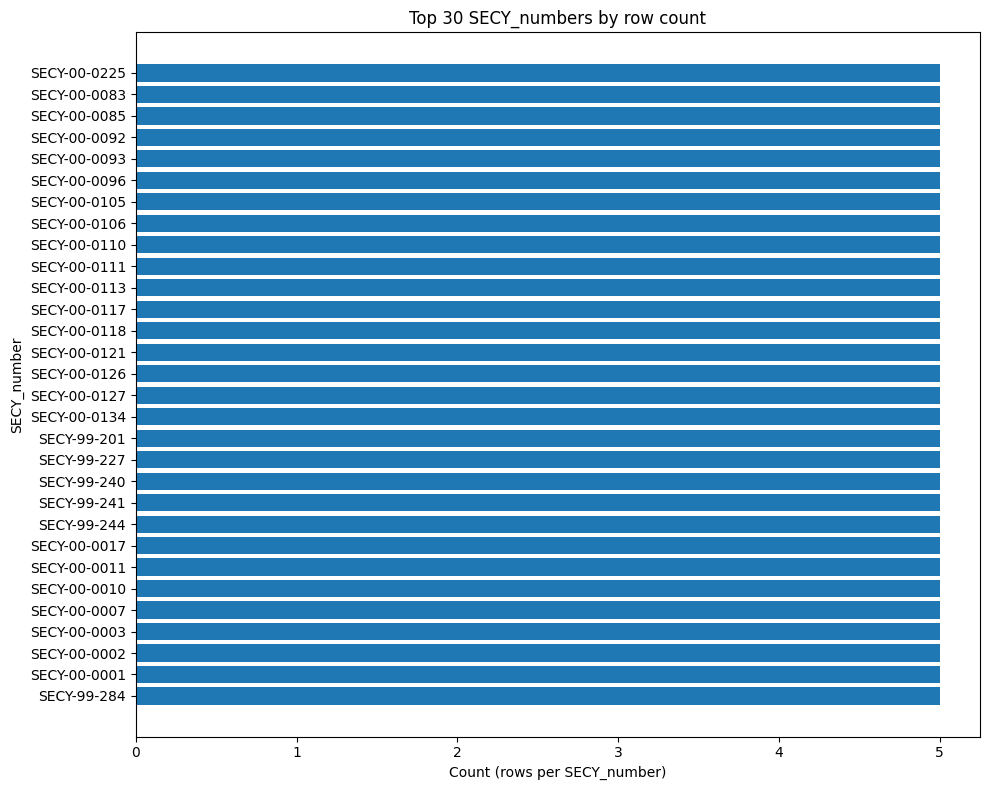

In [29]:
import matplotlib.pyplot as plt

counts = merged_with_allterm['SECY_number'].value_counts()

top_n = 30
top = counts.head(top_n).sort_values(ascending=True)  # horizontal bar needs ascending

plt.figure(figsize=(10, 8))
plt.barh(top.index.astype(str), top.values)
plt.xlabel('Count (rows per SECY_number)')
plt.ylabel('SECY_number')
plt.title(f'Top {top_n} SECY_numbers by row count')
plt.tight_layout()
plt.show()


In [30]:
merged_with_allterm[merged_with_allterm['SECY_number'] == 'SECY-17-0099']

SECY_number                                    SRM Description  \
2838  SECY-17-0099  Proposed Rule-Cyber Security at Fuel Cycle Fac...   

       SRM Date  SRM Year                                          SRM url  \
2838 2025-07-09      2017  https://www.nrc.gov/docs/ML2519/ML25190A291.pdf   

                                            Description  SECY Date  SECY Year  \
2838  Proposed Rule-Cyber Security at Fuel Cycle Fac... 2017-10-04       2017   

                                              SECY url  detailed_type  \
2838  https://www.nrc.gov/docs/ML1701/ML17018A218.html  Proposed Rule   

            _merge title  voter  Vote Date  CVR Year valid_vote_date  \
2838  SECY and SRM  Cmr.  BARAN 2018-05-11      2017            True   

     _merge_CVR availability  SRM_Business_Days  Vote_Business_Days  \
2838       both          all             1436.0               150.0   

      Vote_SRM_Business_Days  first_vote  last_vote   Role at CVR  \
2838                  1791.0        True       True  Commissioner   

     Party Affiliation Start Date   End Date Gender Chair at CVR  \
2838          Democrat 2015-01-02 2018-06-30   Male     Svinicki   

      Cumulative Days Served  Term Number Chair at SECY  \
2838                    1306            2      Svinicki   

     Chair at SECY Start Date Chair at SECY End Date Last Name       Date  \
2838               2017-01-23             2021-01-19     BARAN 2017-10-04   

     matched  Role at SECY  SECY_before_term  Original_Vote_Business_Days  \
2838    True  Commissioner             False                        150.0   

      Original_SRM_Business_Days  
2838                      1941.0

In [31]:
# Filter for CAPUTO votes >100 business days
caputo_long = merged_with_allterm[
    (merged_with_allterm['voter'].str.upper() == "MARZANO") &
    ##(merged_with_allterm['Vote_Business_Days'] > 100) &
    (merged_with_allterm['Vote_Business_Days'] != merged_with_allterm['Original_Vote_Business_Days'])
]

# Keep only the columns you care about
cols = [
    'SECY_number',
    'voter',
    'SECY Date',
    'Vote Date',
    'Start Date',
    'End Date',
    'Vote_Business_Days',
    'Original_Vote_Business_Days'
]

caputo_long_display = caputo_long[cols].sort_values('Vote_Business_Days')

# Show the records
caputo_long_display


SECY_number    voter  SECY Date  Vote Date Start Date   End Date  \
3413  SECY-24-0083  MARZANO 2024-10-08 2025-01-17 2025-01-08 2028-06-30   
3379  SECY-24-0008  MARZANO 2024-01-24 2025-04-10 2025-01-08 2028-06-30   
3418  SECY-24-0087  MARZANO 2024-10-22 2025-04-11 2025-01-08 2028-06-30   
3405  SECY-24-0058  MARZANO 2024-07-09 2025-05-08 2025-01-08 2028-06-30   
3367  SECY-23-0091  MARZANO 2023-10-30 2025-05-15 2025-01-08 2028-06-30   
3182  SECY-21-0088  MARZANO 2021-10-14 2025-05-30 2025-01-08 2028-06-30   
3267  SECY-22-0083  MARZANO 2022-09-06 2025-06-23 2025-01-08 2028-06-30   
3347  SECY-23-0053  MARZANO 2023-06-12 2025-07-03 2025-01-08 2028-06-30   
3382  SECY-24-0009  MARZANO 2024-01-25 2025-09-25 2025-01-08 2028-06-30   
3408  SECY-24-0076  MARZANO 2024-09-12 2025-09-29 2025-01-08 2028-06-30   

      Vote_Business_Days  Original_Vote_Business_Days  
3413                 7.0                         68.0  
3379                64.0                        304.0  
3418                65.0                        117.0  
3405                84.0                        209.0  
3367                89.0                        386.0  
3182                99.0                        906.0  
3267               114.0                        698.0  
3347               122.0                        515.0  
3382               180.0                        419.0  
3408               182.0                        261.0

In [32]:
# Step 1: Create a mapping of SECY_number to known Chair at SECY (dropna ensures we only use known values)
chair_lookup = merged_with_allterm.dropna(subset=['Chair at SECY'])[['SECY_number', 'Chair at SECY']]\
                                   .drop_duplicates()\
                                   .set_index('SECY_number')['Chair at SECY']

# Step 2: Fill missing values using the mapping
merged_with_allterm['Chair at SECY'] = merged_with_allterm.apply(
    lambda row: chair_lookup[row['SECY_number']]
    if pd.isna(row['Chair at SECY']) and row['SECY_number'] in chair_lookup
    else row['Chair at SECY'],
    axis=1
)

In [33]:
pd.set_option('display.max_columns', None)
merged_with_allterm[merged_with_allterm['SECY_number'] == 'SECY-99-251']

SECY_number                                    SRM Description  \
4367  SECY-99-251  Policy Statement on Staff Meetings Open to the...   
4368  SECY-99-251  Policy Statement on Staff Meetings Open to the...   
4369  SECY-99-251  Policy Statement on Staff Meetings Open to the...   
4370  SECY-99-251  Policy Statement on Staff Meetings Open to the...   
4371  SECY-99-251  Policy Statement on Staff Meetings Open to the...   

       SRM Date  SRM Year                                            SRM url  \
4367 1999-12-21      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4368 1999-12-21      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4369 1999-12-21      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4370 1999-12-21      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4371 1999-12-21      1999  https://www.nrc.gov/sites/default/files/doc_li...   

                                            Description  SECY Date  SECY Year  \
4367  Policy Statement on Staff Meetings Open to the... 1999-10-14       1999   
4368  Policy Statement on Staff Meetings Open to the... 1999-10-14       1999   
4369  Policy Statement on Staff Meetings Open to the... 1999-10-14       1999   
4370  Policy Statement on Staff Meetings Open to the... 1999-10-14       1999   
4371  Policy Statement on Staff Meetings Open to the... 1999-10-14       1999   

                                               SECY url     detailed_type  \
4367  https://www.nrc.gov/sites/default/files/doc_li...  Policy Statement   
4368  https://www.nrc.gov/sites/default/files/doc_li...  Policy Statement   
4369  https://www.nrc.gov/sites/default/files/doc_li...  Policy Statement   
4370  https://www.nrc.gov/sites/default/files/doc_li...  Policy Statement   
4371  https://www.nrc.gov/sites/default/files/doc_li...  Policy Statement   

            _merge  title       voter  Vote Date  CVR Year valid_vote_date  \
4367  SECY and SRM  COMR.        DIAZ 1999-11-23      1999            True   
4368  SECY and SRM  COMR.       DICUS 1999-11-09      1999            True   
4369  SECY and SRM  COMR.  MCGAFFIGAN 1999-11-19      1999            True   
4370  SECY and SRM  COMR.  MERRIFIELD 1999-11-19      1999            True   
4371  SECY and SRM  CHRM.     MESERVE 1999-11-15      1999            True   

     _merge_CVR availability  SRM_Business_Days  Vote_Business_Days  \
4367       both          all               46.0                27.0   
4368       both          all               45.0                17.0   
4369       both          all               46.0                25.0   
4370       both          all               46.0                25.0   
4371       both          all               35.0                10.0   

      Vote_SRM_Business_Days  first_vote  last_vote   Role at CVR  \
4367                    19.0       False       True  Commissioner   
4368                    28.0        True      False  Commissioner   
4369                    21.0       False      False  Commissioner   
4370                    21.0       False      False  Commissioner   
4371                    25.0       False      False         Chair   

     Party Affiliation Start Date   End Date  Gender Chair at CVR  \
4367        Republican 1996-08-23 2001-06-30    Male      Meserve   
4368          Democrat 1999-10-29 2003-06-30  Female      Meserve   
4369          Democrat 1996-08-28 2005-06-30    Male      Meserve   
4370        Republican 1998-10-23 2002-06-30    Male      Meserve   
4371          Democrat 1999-10-29 2003-03-31    Male      Meserve   

      Cumulative Days Served  Term Number Chair at SECY  \
4367                    1188            1         Dicus   
4368                    1246            4         Dicus   
4369                    1179            1         Dicus   
4370                     393            1         Dicus   
4371                      18            1         Dicus   

     Chair at SECY Start Date Chair at SECY End Date   Last N

In [34]:
merged_with_allterm[merged_with_allterm['SECY_number'] == 'SECY-21-0088']

SECY_number                                    SRM Description  \
3180  SECY-21-0088  Denial of Petition Rulemaking on Alternative M...   
3181  SECY-21-0088  Denial of Petition Rulemaking on Alternative M...   
3182  SECY-21-0088  Denial of Petition Rulemaking on Alternative M...   
3183  SECY-21-0088  Denial of Petition Rulemaking on Alternative M...   

       SRM Date  SRM Year                                           SRM url  \
3180 2025-06-18      2021  https://www.nrc.gov/docs/ML2516/ML25164A112.html   
3181 2025-06-18      2021  https://www.nrc.gov/docs/ML2516/ML25164A112.html   
3182 2025-06-18      2021  https://www.nrc.gov/docs/ML2516/ML25164A112.html   
3183 2025-06-18      2021  https://www.nrc.gov/docs/ML2516/ML25164A112.html   

                                            Description  SECY Date  SECY Year  \
3180  Denial of Petition Rulemaking on Alternative M... 2021-10-14       2021   
3181  Denial of Petition Rulemaking on Alternative M... 2021-10-14       2021   
3182  Denial of Petition Rulemaking on Alternative M... 2021-10-14       2021   
3183  Denial of Petition Rulemaking on Alternative M... 2021-10-14       2021   

                                              SECY url detailed_type  \
3180  https://www.nrc.gov/docs/ML2030/ML20304A000.html         Other   
3181  https://www.nrc.gov/docs/ML2030/ML20304A000.html         Other   
3182  https://www.nrc.gov/docs/ML2030/ML20304A000.html         Other   
3183  https://www.nrc.gov/docs/ML2030/ML20304A000.html         Other   

            _merge  title    voter  Vote Date  CVR Year valid_vote_date  \
3180  SECY and SRM   Cmr.   CAPUTO 2024-04-23      2021            True   
3181  SECY and SRM   Cmr.  CROWELL 2025-04-10      2021            True   
3182  SECY and SRM   Cmr.  MARZANO 2025-05-30      2021            True   
3183  SECY and SRM  Chair   WRIGHT 2025-05-30      2021            True   

     _merge_CVR availability  SRM_Business_Days  Vote_Business_Days  \
3180       both          all              715.0               426.0   
3181       both          all              702.0               654.0   
3182       both          all              112.0                99.0   
3183       both          all              919.0               906.0   

      Vote_SRM_Business_Days  first_vote  last_vote   Role at CVR  \
3180                   289.0        True      False  Commissioner   
3181                    48.0       False      False  Commissioner   
3182                    13.0       False       True  Commissioner   
3183                    13.0       False      False         Chair   

     Party Affiliation Start Date   End Date  Gender Chair at CVR  \
3180        Republican 2022-08-09 2025-08-01  Female       Hanson   
3181          Democrat 2022-08-26 2027-06-30    Male       Wright   
3182          Democrat 2025-01-08 2028-06-30    Male       Wright   
3183        Republican 2025-01-20 2025-06-30    Male       Wright   

      Cumulative Days Served  Term Number Chair at SECY  \
3180                    1753            2        Hanson   
3181                     959            1        Hanson   
3182                     143            1        Hanson   
3183                    2558            2        Hanson   

     Chair at SECY Start Date Chair at SECY End Date Last Name       Date  \
3180               2021-01-20             2025-01-19       NaN        NaT   
3181               2021-01-20             2025-01-19       NaN        NaT   
3182               2021-01-20             2025-01-19       NaN        NaT   
3183               2021-01-20             2025-01-19    WRIGHT 2021-10-14   

     matched  Role at SECY  SECY_before_term  Original_Vote_Business_Days  \
3180     NaN           NaN              True                        630.0   
3181     NaN           NaN              True                        871.0   
3182     NaN           NaN              True                        906.0   
3183    True  Commissioner              True                    

## find SECYs experience different chair when SECY introduced and when voted

In [35]:
# Step 1: Drop rows with missing chair info
valid_chair_df = merged_with_allterm.dropna(subset=['Chair at SECY', 'Chair at CVR'])

# Step 2: Identify where the chairs are different
different_chairs_df = valid_chair_df[valid_chair_df['Chair at SECY'] != valid_chair_df['Chair at CVR']]

# Step 3: Get unique SECY numbers that experienced a chair transition
secy_with_chair_transition = different_chairs_df['SECY_number'].unique()

# Step 4: Optional - inspect a few
transition_examples = valid_chair_df[valid_chair_df['SECY_number'].isin(secy_with_chair_transition)][
    ['SECY_number', 'Description','SECY Date', 'Vote Date', 'SRM Date', 'voter', 'Start Date', 'End Date','Chair at SECY', 'Chair at CVR', 'Original_Vote_Business_Days', 'Vote_Business_Days', 'SECY_before_term', 'matched']
].drop_duplicates()
##transition_examples
transition_examples['SECY_number'].nunique()

101

In [36]:
# Save to Excel
output_path = "/content/drive/Shareddrives/Nuclear/Projects/2025/NRC Commission vote efficiency/data/NRC_transition_examples.xlsx"
transition_examples.to_excel(output_path, index=False)

In [37]:


# Save to CSV
output_path = '/content/drive/Shareddrives/Nuclear/Projects/2025/NRC Commission vote efficiency/data/merged_with_allterm.csv'
merged_with_allterm.to_csv(output_path, index=False)

In [38]:
print(merged_with_allterm.isna().sum())


SECY_number                      0
SRM Description                 62
SRM Date                         0
SRM Year                         0
SRM url                         62
Description                      0
SECY Date                        0
SECY Year                        0
SECY url                         0
detailed_type                    0
_merge                           0
title                            0
voter                            0
Vote Date                        0
CVR Year                         0
valid_vote_date                  0
_merge_CVR                       0
availability                     0
SRM_Business_Days                0
Vote_Business_Days               8
Vote_SRM_Business_Days           0
first_vote                       0
last_vote                        0
Role at CVR                      0
Party Affiliation                0
Start Date                       0
End Date                         0
Gender                           0
Chair at CVR        

## load the commissioner info (first term analysis)

In [39]:
# Load the specified Excel file from the user's Google Drive path
file_path = "/content/drive/Shareddrives/Nuclear/Projects/2025/NRC Commission vote efficiency/data/NRC_First_Terms_Only.xlsx"
first_term_data = pd.read_excel(file_path)


In [40]:
# First, prepare data for merge (as shown previously)
first_term_data['Last Name'] = first_term_data['Last Name'].str.strip().str.upper()
both_data['voter'] = both_data['voter'].str.upper().str.extract(r'([A-Z]+)', expand=False)

# Merge on last name
merged = both_data.merge(
    first_term_data,
    left_on='voter',
    right_on='Last Name',
    how='left',
    suffixes=('', '_comm')
)

/tmp/ipython-input-682811610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_data['voter'] = both_data['voter'].str.upper().str.extract(r'([A-Z]+)', expand=False)


In [41]:

# Count matches
matched_count = merged['Last Name'].notna().sum()
unmatched_count = merged['Last Name'].isna().sum()

print(f"✅ Matched: {matched_count}")
print(f"❌ Not matched: {unmatched_count}")

✅ Matched: 4430
❌ Not matched: 0


In [42]:
merged['voter'] = merged['voter'].str.title()


In [43]:
##unique_secy[unique_secy['detailed_type'] == 'Annual Report']
plt.rcParams['axes.grid'] = False  # disables grid by default for all plots

## SECY-SRM Data analysis (using all SECY-CVR-SRM data)

In [44]:
# Drop duplicates keeping the first entry for each SECY_number
unique_secy = merged_with_allterm[merged_with_allterm['last_vote'] == True].copy()

unique_secy

SECY_number                                    SRM Description  \
0     SECY-00-0001  Pilot Program for NMSS Initiative on Streamlin...   
6     SECY-00-0002  Part 50 Rulemaking Plan for Decommissioning Tr...   
11    SECY-00-0003  Report to Congress on Abnormal Occurrences for...   
16    SECY-00-0007  Proposed Staff Plan for Low Power and Shutdown...   
24    SECY-00-0010  Calvert Cliffs Nuclear Power Plant, Units 1 an...   
...            ...                                                ...   
4409   SECY-99-273  Impact of Changes to the Inspection Program fo...   
4412   SECY-99-277  Concurrent Jurisdiction of Non-Radiological Ha...   
4419   SECY-99-278  NRC/Agreement State Jurisdiction for Formerly ...   
4424   SECY-99-279      Final Rule Amending the Fitness-for-Duty Rule   
4427   SECY-99-284  Classification of Savannah River Residual Tank...   

       SRM Date  SRM Year                                            SRM url  \
0    2000-02-14      2000  https://www.nrc.gov/sites/default/files/doc_li...   
6    2000-02-09      2000  https://www.nrc.gov/sites/default/files/doc_li...   
11   2000-02-11      2000  https://www.nrc.gov/sites/default/files/doc_li...   
16   2000-03-31      2000  https://www.nrc.gov/sites/default/files/doc_li...   
24   2000-03-23      2000  https://www.nrc.gov/sites/default/files/doc_li...   
...         ...       ...                                                ...   
4409 2000-01-27      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4412 2000-08-11      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4419 2000-02-02      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4424 2000-07-25      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4427 2000-05-30      1999  https://www.nrc.gov/sites/default/files/doc_li...   

                                            Description  SECY Date  SECY Year  \
0     Pilot Program for NMSS Initiative on Streamlin... 2000-01-03       2000   
6     Part 50 Rulemaking Plan for Decommissioning Tr... 1999-12-30       2000   
11    Report to Congress on Abnormal Occurrences for... 2000-01-03       2000   
16    Proposed Staff Plan for Low Power and Shutdown... 2000-01-12       2000   
24    Calvert Cliffs Nuclear Power Plant, Units 1 an... 2000-01-14       2000   
...                                                 ...        ...        ...   
4409  Impact of Changes to the Inspection Program fo... 1999-11-23       1999   
4412  Concurrent Jurisdiction of Non-Radiological Ha... 1999-12-02       1999   
4419  NRC/Agreement State Jurisdiction for Formerly ... 1999-12-02       1999   
4424      Final Rule Amending the Fitness-for-Duty Rule 1999-12-06       1999   
4427  Classification of Savannah River Residual Tank... 1999-12-15       1999   

                                               SECY url    detailed_type  \
0       https://www.nrc.gov/docs/ML0036/ML003672266.pdf            Other   
6       https://www.nrc.gov/docs/ML0036/ML003672289.pdf  Rulemaking Plan   
11      https://www.nrc.gov/docs/ML0036/ML003672303.pdf           Report   
16    https://www.nrc.gov/sites/default/files/doc_li...      Information   
24      https://www.nrc.gov/docs/ML0036/ML003672584.pdf            Other   
...                                                 ...              ...   
4409  https://www.nrc.gov/sites/default/files/doc_li...            Other   
4412  https://www.nrc.gov/sites/default/files/doc_li...            Other   
4419    https://www.nrc.gov/docs/ML1712/ML17129A511.pdf            Other   
4424  https://www.nrc.gov/sites/default/files/doc_li...       Final Rule   
4427  https://www.nrc.gov/sites/default/files/doc_li...            Other   

            _merge  title       voter  Vote Date  CVR Year valid_vote_date  \
0     SECY and SRM  COMR.        DIAZ 2000-02-08      2000            True   
6     SECY and SRM  COMR.       DICUS 2000-01-24      2000            True   
11    SECY and SRM  COMR.       DICUS 2000-01-24 

#Figure 1

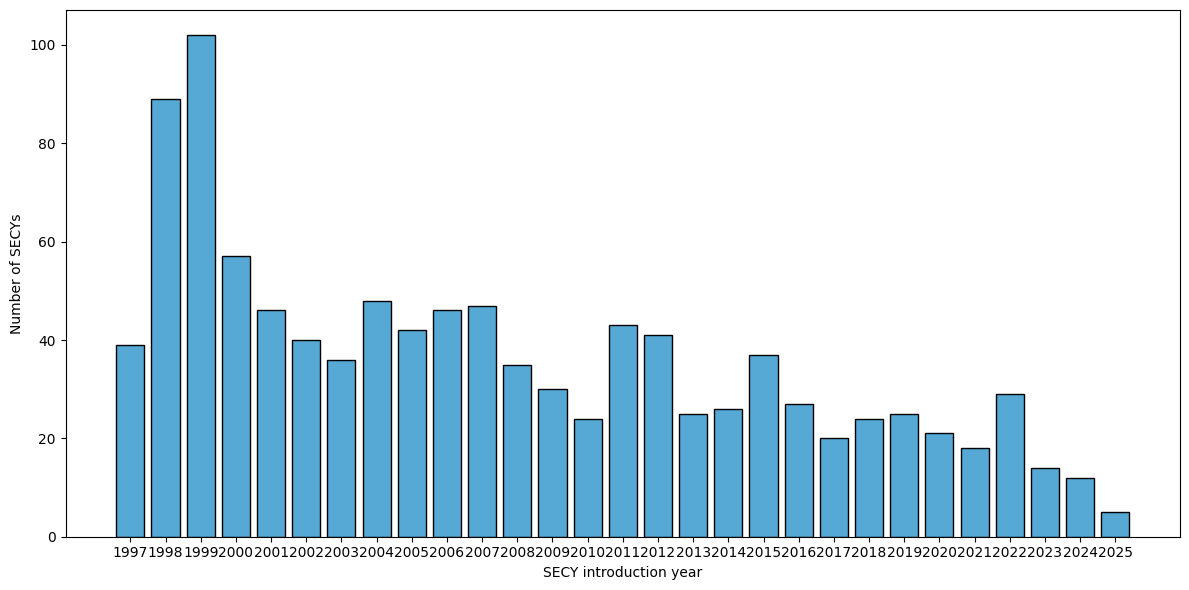

In [45]:
# Group by 'SECY_year' and count the number of records for each year
sec_year_count = unique_secy.groupby('SECY Year').size().reset_index(name='count')

# Plotting the bar plot for all cases
plt.figure(figsize=(12, 6))

plt.bar(
    sec_year_count['SECY Year'],
    sec_year_count['count'],
    color="#56A9D5",     # ← from your palette (teal)
    edgecolor='black'
)

# Customizing the plot
##plt.title('Number of SECYs by SECY Introduction Year')
plt.xlabel('SECY introduction year')
plt.ylabel('Number of SECYs')
# Set x-ticks to show all years
plt.xticks(sec_year_count['SECY Year'], rotation=0)  # Use all SECY_year values as x-ticks

# Show the plot
plt.tight_layout()
plt.show()

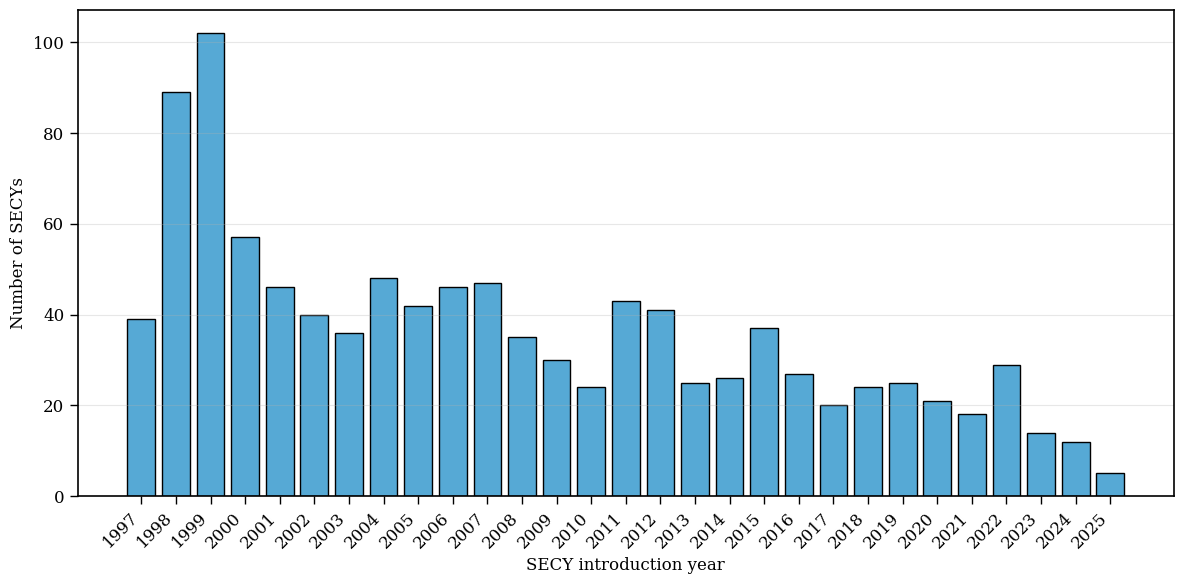

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Group by 'SECY_year' and count
sec_year_count = unique_secy.groupby('SECY Year').size().reset_index(name='count')
sec_year_count = sec_year_count.sort_values('SECY Year')

# Ensure years are numeric
years = sec_year_count['SECY Year'].astype(int)
counts = sec_year_count['count'].values

# --- Font & Global Styling ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 12


# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 6))

# Set white backgrounds
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Bars (centered to align with ticks)
ax.bar(
    years,
    counts,
    color="#56A9D5",     # BTI sky blue
    edgecolor='black',
    align='center'
)

# Labels
ax.set_xlabel('SECY introduction year', fontsize=12)
ax.set_ylabel('Number of SECYs', fontsize=12)

# All years on the x-axis
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha='right')

# Tick mark style — small marks pointing outward
ax.tick_params(
    axis='x',
    which='major',
    direction='out',
    length=6,
    width=1,
    color='black',
    bottom=True,
    top=False
)
ax.tick_params(
    axis='y',
    which='major',
    direction='out',
    length=6,
    width=1,
    color='black'
)

# Black plot border
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

# Only horizontal grid lines for clarity
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

plt.tight_layout()
plt.show()


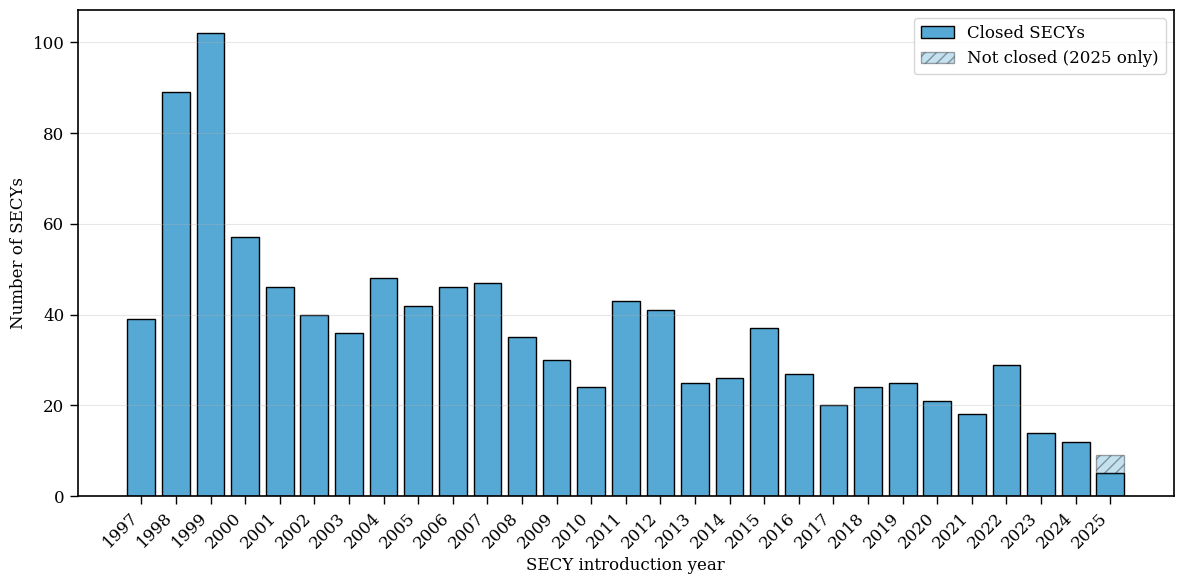

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Group by 'SECY Year' and count (closed / whatever unique_secy currently represents)
sec_year_count = unique_secy.groupby('SECY Year').size().reset_index(name='count')
sec_year_count = sec_year_count.sort_values('SECY Year')

# Ensure years are numeric
years = sec_year_count['SECY Year'].astype(int).values
counts = sec_year_count['count'].values

# --- Font & Global Styling ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 12

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Base bars (closed)
ax.bar(
    years,
    counts,
    color="#56A9D5",
    edgecolor='black',
    align='center',
    label='Closed SECYs'
)

# Add shaded "not closed" segment for 2025 (+4)
extra_year = 2025
extra = 4

mask_2025 = (years == extra_year)
if mask_2025.any():
    base_2025 = counts[mask_2025][0]
    ax.bar(
        extra_year,
        extra,
        bottom=base_2025,
        color="#56A9D5",
        edgecolor='black',
        align='center',
        alpha=0.35,          # shaded
        hatch='///',         # extra visual cue
        label='Not closed (2025 only)'
    )
else:
    # If 2025 isn't in your grouped data yet, add a new bar at 2025
    ax.bar(
        extra_year,
        extra,
        color="#56A9D5",
        edgecolor='black',
        align='center',
        alpha=0.35,
        hatch='///',
        label='Not closed (2025 only)'
    )
    years = np.append(years, extra_year)

# Labels
ax.set_xlabel('SECY introduction year', fontsize=12)
ax.set_ylabel('Number of SECYs', fontsize=12)

# All years on the x-axis (including 2025 even if it was missing)
years_sorted = np.sort(np.unique(years))
ax.set_xticks(years_sorted)
ax.set_xticklabels(years_sorted, rotation=45, ha='right')

# Tick mark style
ax.tick_params(axis='x', which='major', direction='out', length=6, width=1, color='black', bottom=True, top=False)
ax.tick_params(axis='y', which='major', direction='out', length=6, width=1, color='black')

# Black plot border
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

# Only horizontal grid lines
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

ax.legend(frameon=True)

plt.tight_layout()
plt.show()


In [48]:
sec_year_count

SECY Year  count
0        1997     39
1        1998     89
2        1999    102
3        2000     57
4        2001     46
5        2002     40
6        2003     36
7        2004     48
8        2005     42
9        2006     46
10       2007     47
11       2008     35
12       2009     30
13       2010     24
14       2011     43
15       2012     41
16       2013     25
17       2014     26
18       2015     37
19       2016     27
20       2017     20
21       2018     24
22       2019     25
23       2020     21
24       2021     18
25       2022     29
26       2023     14
27       2024     12
28       2025      5

In [49]:
# Count each unique detailed_type
detailed_type_counts = unique_secy['detailed_type'].value_counts(dropna=False).reset_index()
detailed_type_counts.columns = ['detailed_type', 'count']

# Add percentage column
detailed_type_counts['percentage'] = (
    detailed_type_counts['count'] / detailed_type_counts['count'].sum()
).round(3) * 100

# Display
print(detailed_type_counts)


       detailed_type  count  percentage
0              Other    399        38.1
1    Recommendations    153        14.6
2      Proposed Rule    120        11.5
3         Final Rule    116        11.1
4             Report     64         6.1
5        Information     64         6.1
6    Rulemaking Plan     50         4.8
7   Policy Statement     30         2.9
8      Status Report     29         2.8
9           Response     18         1.7
10     Annual Report      5         0.5


In [50]:
unique_secy[unique_secy['Vote_Business_Days'] > 1000]

SECY_number                                    SRM Description  \
2991  SECY-19-0062  Final Rule - Non-power Production or Utilizati...   

       SRM Date  SRM Year                                           SRM url  \
2991 2024-09-04      2019  https://www.nrc.gov/docs/ML2424/ML24248A208.html   

                                            Description  SECY Date  SECY Year  \
2991  Final Rule: Non-power Production or Utilizatio... 2019-06-17       2019   

                                              SECY url detailed_type  \
2991  https://www.nrc.gov/docs/ML1803/ML18031A000.html    Final Rule   

            _merge title   voter  Vote Date  CVR Year valid_vote_date  \
2991  SECY and SRM  Cmr.  WRIGHT 2024-06-06      2019            True   

     _merge_CVR availability  SRM_Business_Days  Vote_Business_Days  \
2991       both          all             1306.0              1245.0   

      Vote_SRM_Business_Days  first_vote  last_vote   Role at CVR  \
2991                    61.0       False       True  Commissioner   

     Party Affiliation Start Date   End Date Gender Chair at CVR  \
2991        Republican 2018-05-30 2025-01-19   Male       Hanson   

      Cumulative Days Served  Term Number Chair at SECY  \
2991                    2200            1      Svinicki   

     Chair at SECY Start Date Chair at SECY End Date Last Name       Date  \
2991               2017-01-23             2021-01-19    WRIGHT 2019-06-17   

     matched  Role at SECY  SECY_before_term  Original_Vote_Business_Days  \
2991    True  Commissioner             False                       1245.0   

      Original_SRM_Business_Days  
2991                      1306.0

#Business Days Calculation

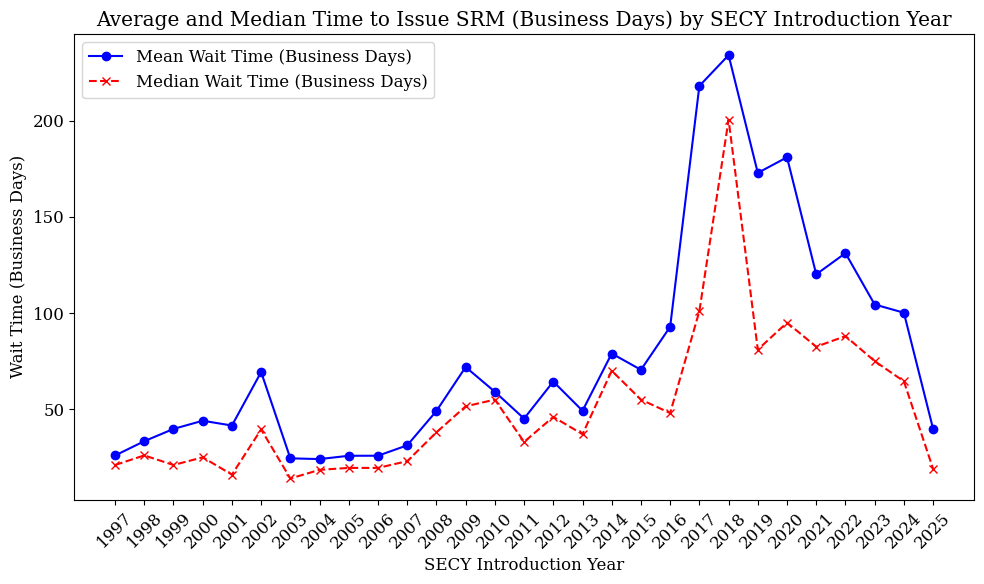

In [51]:

# Step 2: Group by 'SECY_year' and calculate the mean and median of 'wait_day'
wait_days_stats_bus = unique_secy.groupby('SECY Year')['Vote_Business_Days'].agg(['mean', 'median']).reset_index()


# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the mean and median on the same chart
ax.plot(wait_days_stats_bus['SECY Year'], wait_days_stats_bus['mean'], label='Mean Wait Time (Business Days)', marker='o', color='b')
ax.plot(wait_days_stats_bus['SECY Year'], wait_days_stats_bus['median'], label='Median Wait Time (Business Days)', linestyle='--', marker='x', color='r')

# Customizing the plot
ax.set_title('Average and Median Time to Issue SRM (Business Days) by SECY Introduction Year')
ax.set_xlabel('SECY Introduction Year')
ax.set_ylabel('Wait Time (Business Days)')
ax.legend()

# Set x-ticks to show all years
plt.xticks(sec_year_count['SECY Year'], rotation=45)  # Use all SECY_year values as x-ticks

# Show the plot
plt.tight_layout()
plt.show()

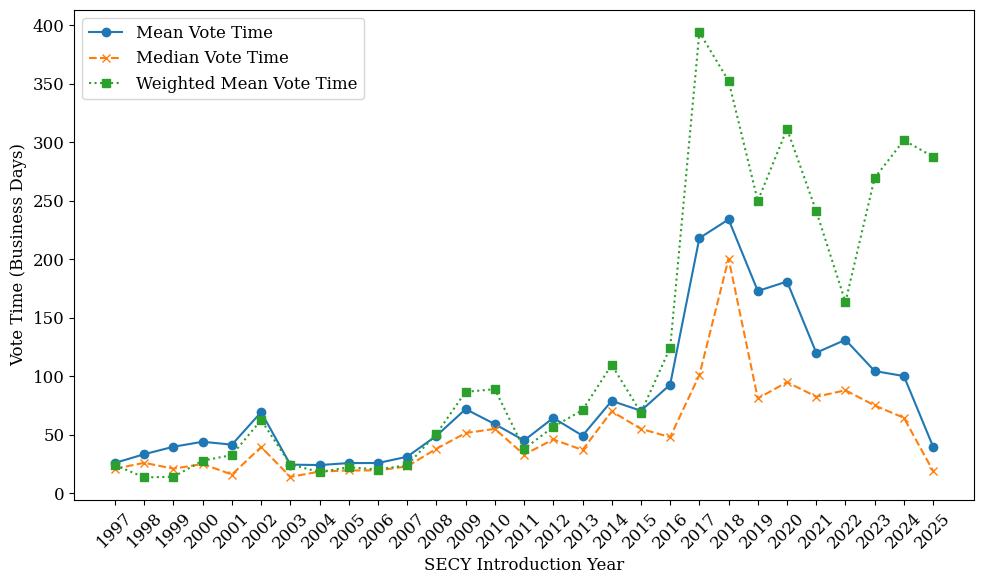

In [52]:
##weighted average = average wait time*average number of SECYs across all years/number of SECYs
# Step 1: Calculate number of SECYs per year
sec_year_count = unique_secy.groupby('SECY Year').size().reset_index(name='secy_count')

# Step 2: Merge with wait time stats
wait_days_stats_bus = wait_days_stats_bus.merge(sec_year_count, on='SECY Year', how='left')

# Step 3: Calculate overall average number of SECYs per year
avg_secy_per_year = sec_year_count['secy_count'].mean()

# Step 4: Compute relative weight and weighted mean
wait_days_stats_bus['weight'] =  avg_secy_per_year/wait_days_stats_bus['secy_count']
wait_days_stats_bus['weighted_mean'] = wait_days_stats_bus['mean'] * wait_days_stats_bus['weight']

# Step 5: Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(wait_days_stats_bus['SECY Year'], wait_days_stats_bus['mean'], label='Mean Vote Time', marker='o')
ax.plot(wait_days_stats_bus['SECY Year'], wait_days_stats_bus['median'], label='Median Vote Time', linestyle='--', marker='x')
ax.plot(wait_days_stats_bus['SECY Year'], wait_days_stats_bus['weighted_mean'], label='Weighted Mean Vote Time', linestyle=':', marker='s')

##ax.set_title('Mean, Median, and Weighted Mean Wait Time by SECY Year')
ax.set_xlabel('SECY Introduction Year')
ax.set_ylabel('Vote Time (Business Days)')
ax.legend()
plt.xticks(wait_days_stats_bus['SECY Year'], rotation=45)
plt.tight_layout()
plt.show()


In [53]:
wait_days_stats_bus['mean']

0      25.948718
1      33.382022
2      39.754902
3      44.017544
4      41.521739
5      69.325000
6      24.472222
7      24.083333
8      25.809524
9      25.826087
10     31.234043
11     49.085714
12     71.933333
13     59.083333
14     45.116279
15     64.390244
16     49.200000
17     78.961538
18     70.486486
19     92.851852
20    218.050000
21    234.041667
22    172.840000
23    180.952381
24    120.111111
25    131.137931
26    104.428571
27    100.166667
28     39.800000
Name: mean, dtype: float64

=== Summary Statistics for Commissioner Vote Times (Business Days) ===
Count: 1,048
Mean: 63.17
Median: 32.00
Standard Deviation: 104.77
Minimum: 2.00
25th Percentile (Q1): 17.75
75th Percentile (Q3): 66.00
Interquartile Range (IQR): 48.25
Maximum: 1,245.00
Skewness: 5.19
Kurtosis: 36.06


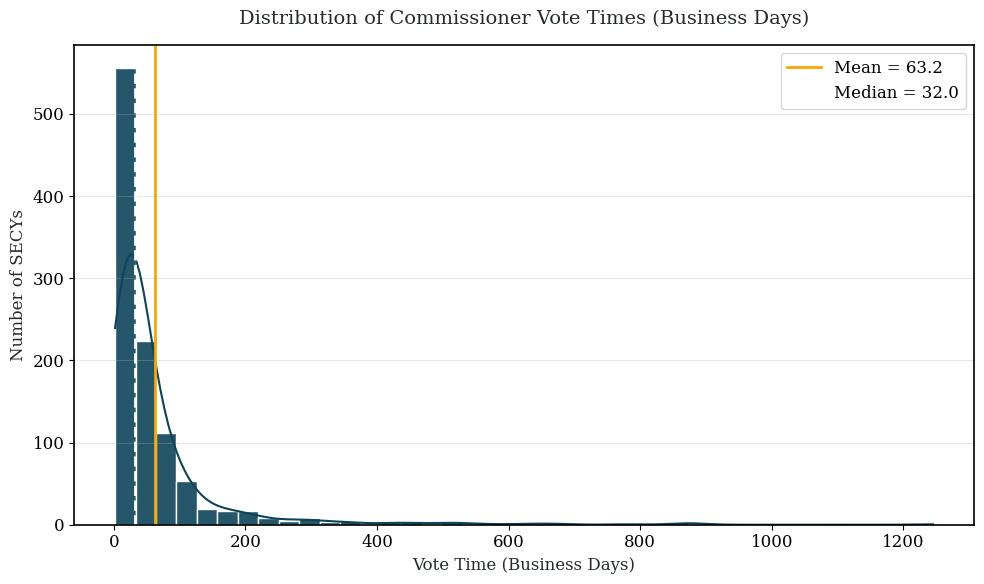

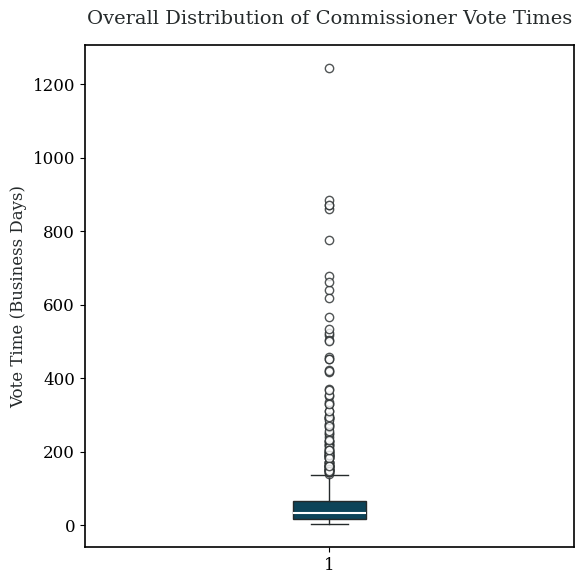

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =========================================
# 1) Data preparation
# =========================================
vote_days = unique_secy['Vote_Business_Days'].dropna()

# =========================================
# 2) Descriptive statistics
# =========================================
mean_val = vote_days.mean()
median_val = vote_days.median()
std_val = vote_days.std()
min_val = vote_days.min()
max_val = vote_days.max()
q1 = vote_days.quantile(0.25)
q3 = vote_days.quantile(0.75)
iqr = q3 - q1

print("=== Summary Statistics for Commissioner Vote Times (Business Days) ===")
print(f"Count: {len(vote_days):,.0f}")
print(f"Mean: {mean_val:,.2f}")
print(f"Median: {median_val:,.2f}")
print(f"Standard Deviation: {std_val:,.2f}")
print(f"Minimum: {min_val:,.2f}")
print(f"25th Percentile (Q1): {q1:,.2f}")
print(f"75th Percentile (Q3): {q3:,.2f}")
print(f"Interquartile Range (IQR): {iqr:,.2f}")
print(f"Maximum: {max_val:,.2f}")

# Optional: quick skewness & kurtosis check
skewness = vote_days.skew()
kurtosis = vote_days.kurtosis()
print(f"Skewness: {skewness:,.2f}")
print(f"Kurtosis: {kurtosis:,.2f}")

# =========================================
# 3) Visualization
# =========================================
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 12

PALETTE = {
    "navy":   "#0D4459",
    "coal":   "#252A2B",
}

# --- Histogram + KDE ---
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(vote_days, bins=40, kde=True, color=PALETTE["navy"], edgecolor='white', alpha=0.9, ax=ax)

ax.set_title('Distribution of Commissioner Vote Times (Business Days)', fontsize=14, color=PALETTE["coal"], pad=15)
ax.set_xlabel('Vote Time (Business Days)', color=PALETTE["coal"])
ax.set_ylabel('Number of SECYs', color=PALETTE["coal"])

ax.axvline(mean_val, color='orange', linestyle='-', linewidth=2, label=f'Mean = {mean_val:.1f}')
ax.axvline(median_val, color='white', linestyle='--', linewidth=2, label=f'Median = {median_val:.1f}')

ax.legend()
ax.grid(axis='y', linestyle='-', alpha=0.3)
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

plt.tight_layout()
plt.show()

# --- Boxplot ---
fig, ax = plt.subplots(figsize=(6, 6))
ax.boxplot(vote_days, patch_artist=True,
           boxprops=dict(facecolor=PALETTE["navy"], color=PALETTE["coal"]),
           medianprops=dict(color='white', linewidth=1.5),
           whiskerprops=dict(color=PALETTE["coal"]),
           capprops=dict(color=PALETTE["coal"]),
           flierprops=dict(marker='o', markerfacecolor='white',
                           markeredgecolor=PALETTE["coal"], alpha=0.8))

ax.set_title('Overall Distribution of Commissioner Vote Times', fontsize=14, color=PALETTE["coal"], pad=15)
ax.set_ylabel('Vote Time (Business Days)', color=PALETTE["coal"])

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

plt.tight_layout()
plt.show()


#Figure 2

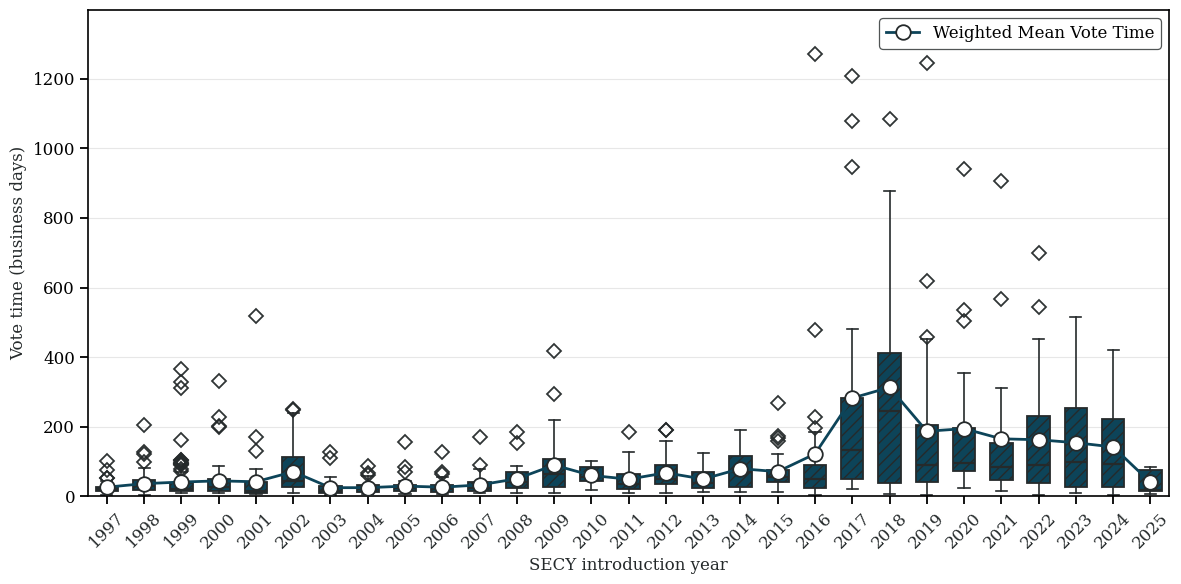

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Fonts (Colab-safe Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 12

# =========================================
# Brand palette (yours) — unchanged
# =========================================
PALETTE = {
    "navy":   "#0D4459",
    "teal":   "#0DC3A8",
    "sky":    "#56A9D5",
    "coal":   "#252A2B",
    "paper":  "#F8F9F9",
    "orange": "#EE5C36",
    "yellow": "#F8B944",
    "magenta":"#E82269",
}

# =========================================
# Mode — unchanged
# =========================================
MODE = "auto"

if MODE == "auto":
    BOX_FACE   = PALETTE["navy"]
    BOX_EDGE   = PALETTE["coal"]
    MEDIAN     = PALETTE["coal"]
    WHISKER    = PALETTE["coal"]
    CAP        = PALETTE["coal"]
    FLIER_EDGE = PALETTE["coal"]
    FLIER_MARK = "D"
    HATCH      = "///"
    MEAN_LINE  = PALETTE["navy"]
    MEAN_DOT_FACE = "white"
    MEAN_DOT_EDGE = PALETTE["coal"]
    ERROR_BAR  = PALETTE["navy"]
else:
    BOX_FACE   = "white"
    BOX_EDGE   = "#000000"
    MEDIAN     = "white"          # <- changed
    WHISKER    = "#000000"
    CAP        = "#000000"
    FLIER_EDGE = "#000000"
    FLIER_MARK = "D"
    HATCH      = "///"
    MEAN_LINE  = "#000000"
    MEAN_DOT_FACE = "white"
    MEAN_DOT_EDGE = "#000000"
    ERROR_BAR  = "#000000"

# =========================================
# 0) Data prep — unchanged
# =========================================
df = unique_secy.dropna(subset=['SECY Year', 'Original_Vote_Business_Days']).copy()
df['SECY Year'] = df['SECY Year'].astype(int)

years = np.array(sorted(df['SECY Year'].unique()))
pos = np.arange(len(years))
per_year_vals = [df.loc[df['SECY Year'] == y, 'Original_Vote_Business_Days'].values for y in years]

# 1) Means / 95% CI (no CI drawn) — unchanged
means = np.array([v.mean() if len(v) else np.nan for v in per_year_vals])
ns    = np.array([len(v) for v in per_year_vals])
stds  = np.array([v.std(ddof=1) if len(v) > 1 else 0.0 for v in per_year_vals])
sems  = np.where(ns > 0, stds / np.sqrt(ns), np.nan)
yerr  = 1.96 * sems

# =========================================
# 2) Plot — updated to match Figure 1 framing
# =========================================
plt.rcParams.update({
    'axes.grid': False,
    'figure.facecolor': 'white',   # match Fig 1 (no shaded bg)
    'savefig.facecolor': 'white',  # match Fig 1
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('white')          # plot area white (match Fig 1)

# (a) Boxplot (colors/shape/hatch unchanged)
boxprops = dict(edgecolor=BOX_EDGE, linewidth=1.3, facecolor=BOX_FACE, hatch=HATCH)
ax.boxplot(
    per_year_vals,
    positions=pos,
    widths=0.6,
    patch_artist=True,
    showfliers=True,
    whis=1.5,
    boxprops=boxprops,
    medianprops=dict(color=MEDIAN, linewidth=1.6),
    whiskerprops=dict(color=WHISKER, linewidth=1.2),
    capprops=dict(color=CAP, linewidth=1.2),
    flierprops=dict(
        marker=FLIER_MARK,
        markersize=7,
        markerfacecolor='none',
        markeredgecolor=FLIER_EDGE,
        markeredgewidth=1.3,
        linestyle='none',
        alpha=0.95
    )
)

# (b) Mean line ONLY — unchanged
ax.errorbar(
    pos, means,
    fmt='-o',
    linewidth=2.0,
    markersize=10.5,
    color=MEAN_LINE,
    markerfacecolor=MEAN_DOT_FACE,
    markeredgecolor=MEAN_DOT_EDGE,
    markeredgewidth=1.3,
    zorder=3,
    label='Weighted Mean Vote Time'
)

# =========================================
# 3) Labels/ticks/limits — make like Figure 1
# =========================================
ax.set_xlabel('SECY introduction year', color=PALETTE["coal"])
ax.set_ylabel('Vote time (business days)', color=PALETTE["coal"])

# X-ticks (centered, aligned, and with clear tick marks)
ax.set_xticks(pos)
ax.set_xticklabels(years, rotation=45, ha='center', color=PALETTE["coal"])

# Ensure ticks are drawn outward and visible
ax.tick_params(
    axis='x',
    which='major',
    direction='out',   # tick mark pointing downward/outside
    length=6,
    width=1.3,
    color='black',
    bottom=True,
    top=False
)
ax.tick_params(
    axis='y',
    which='major',
    direction='out',
    length=6,
    width=1.3,
    color='black'
)

# Tighten horizontal limits so boxes align with ticks
ax.set_xlim(pos[0] - 0.5, pos[-1] + 0.5)
ax.margins(x=0)

# Black border around plotting area (like Fig 1)
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

# Only horizontal grid lines (like Fig 1)
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

# Robust headroom — unchanged
upper_boxes = np.array([np.nanmax(v) if len(v) else np.nan for v in per_year_vals], dtype=float)
upper_mean_ci = np.nanmax(means + yerr) if np.isfinite(np.nanmax(means + yerr)) else np.nan
candidates = np.r_[upper_boxes, upper_mean_ci]
if not np.all(np.isnan(candidates)):
    upper = np.nanmax(candidates)
    if np.isfinite(upper):
        ax.set_ylim(0, upper * 1.1)

# Legend with solid frame (as before)
leg = ax.legend(frameon=True, loc='upper right')
leg.get_frame().set_edgecolor(PALETTE["coal"])
leg.get_frame().set_linewidth(0.9)

plt.tight_layout()
plt.show()


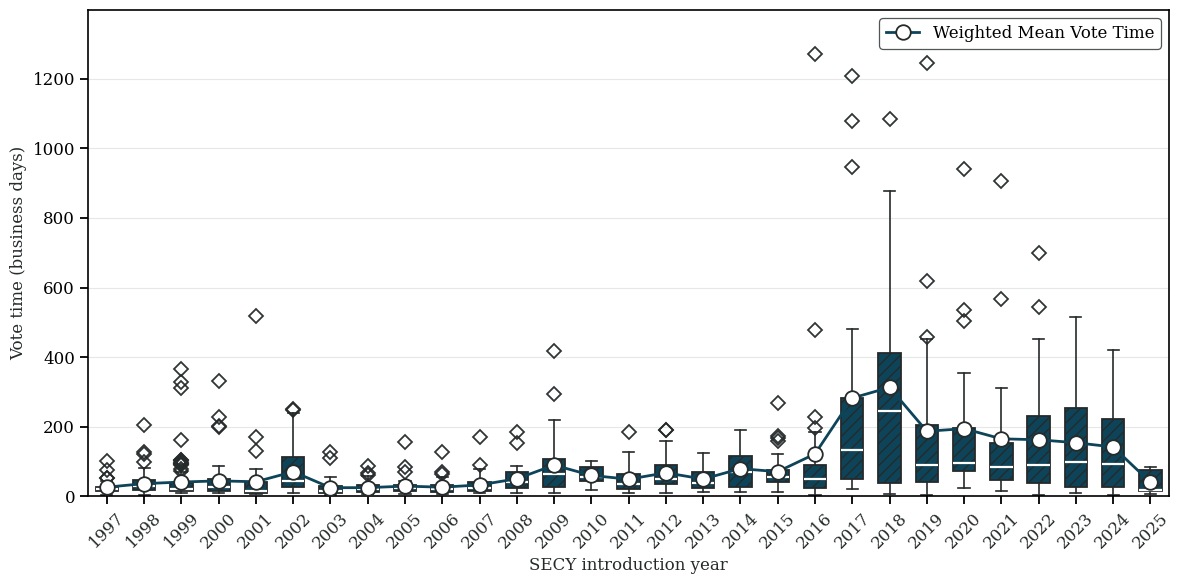

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Fonts (Colab-safe Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 12

# =========================================
# Brand palette (yours) — unchanged
# =========================================
PALETTE = {
    "navy":   "#0D4459",
    "teal":   "#0DC3A8",
    "sky":    "#56A9D5",
    "coal":   "#252A2B",
    "paper":  "#F8F9F9",
    "orange": "#EE5C36",
    "yellow": "#F8B944",
    "magenta":"#E82269",
}

# =========================================
# Mode — unchanged
# =========================================
MODE = "auto"

if MODE == "auto":
    BOX_FACE   = PALETTE["navy"]
    BOX_EDGE   = PALETTE["coal"]
    MEDIAN     = "white"          # <- changed
    WHISKER    = PALETTE["coal"]
    CAP        = PALETTE["coal"]
    FLIER_EDGE = PALETTE["coal"]
    FLIER_MARK = "D"
    HATCH      = "///"
    MEAN_LINE  = PALETTE["navy"]
    MEAN_DOT_FACE = "white"
    MEAN_DOT_EDGE = PALETTE["coal"]
    ERROR_BAR  = PALETTE["navy"]
else:
    BOX_FACE   = "white"
    BOX_EDGE   = "#000000"
    MEDIAN     = "white"          # <- changed
    WHISKER    = "#000000"
    CAP        = "#000000"
    FLIER_EDGE = "#000000"
    FLIER_MARK = "D"
    HATCH      = "///"
    MEAN_LINE  = "#000000"
    MEAN_DOT_FACE = "white"
    MEAN_DOT_EDGE = "#000000"
    ERROR_BAR  = "#000000"

# =========================================
# 0) Data prep — unchanged
# =========================================
df = unique_secy.dropna(subset=['SECY Year', 'Original_Vote_Business_Days']).copy()
df['SECY Year'] = df['SECY Year'].astype(int)

years = np.array(sorted(df['SECY Year'].unique()))
pos = np.arange(len(years))
per_year_vals = [df.loc[df['SECY Year'] == y, 'Original_Vote_Business_Days'].values for y in years]

# 1) Means / 95% CI (no CI drawn) — unchanged
means = np.array([v.mean() if len(v) else np.nan for v in per_year_vals])
ns    = np.array([len(v) for v in per_year_vals])
stds  = np.array([v.std(ddof=1) if len(v) > 1 else 0.0 for v in per_year_vals])
sems  = np.where(ns > 0, stds / np.sqrt(ns), np.nan)
yerr  = 1.96 * sems

# =========================================
# 2) Plot — updated to match Figure 1 framing
# =========================================
plt.rcParams.update({
    'axes.grid': False,
    'figure.facecolor': 'white',   # match Fig 1 (no shaded bg)
    'savefig.facecolor': 'white',  # match Fig 1
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('white')          # plot area white (match Fig 1)

# (a) Boxplot (colors/shape/hatch unchanged)
boxprops = dict(edgecolor=BOX_EDGE, linewidth=1.3, facecolor=BOX_FACE, hatch=HATCH)
ax.boxplot(
    per_year_vals,
    positions=pos,
    widths=0.6,
    patch_artist=True,
    showfliers=True,
    whis=1.5,
    boxprops=boxprops,
    medianprops=dict(color=MEDIAN, linewidth=1.6),
    whiskerprops=dict(color=WHISKER, linewidth=1.2),
    capprops=dict(color=CAP, linewidth=1.2),
    flierprops=dict(
        marker=FLIER_MARK,
        markersize=7,
        markerfacecolor='none',
        markeredgecolor=FLIER_EDGE,
        markeredgewidth=1.3,
        linestyle='none',
        alpha=0.95
    )
)

# (b) Mean line ONLY — unchanged
ax.errorbar(
    pos, means,
    fmt='-o',
    linewidth=2.0,
    markersize=10.5,
    color=MEAN_LINE,
    markerfacecolor=MEAN_DOT_FACE,
    markeredgecolor=MEAN_DOT_EDGE,
    markeredgewidth=1.3,
    zorder=3,
    label='Weighted Mean Vote Time'
)

# =========================================
# 3) Labels/ticks/limits — make like Figure 1
# =========================================
ax.set_xlabel('SECY introduction year', color=PALETTE["coal"])
ax.set_ylabel('Vote time (business days)', color=PALETTE["coal"])

# X-ticks (centered, aligned, and with clear tick marks)
ax.set_xticks(pos)
ax.set_xticklabels(years, rotation=45, ha='center', color=PALETTE["coal"])

# Ensure ticks are drawn outward and visible
ax.tick_params(
    axis='x',
    which='major',
    direction='out',   # tick mark pointing downward/outside
    length=6,
    width=1.3,
    color='black',
    bottom=True,
    top=False
)
ax.tick_params(
    axis='y',
    which='major',
    direction='out',
    length=6,
    width=1.3,
    color='black'
)

# Tighten horizontal limits so boxes align with ticks
ax.set_xlim(pos[0] - 0.5, pos[-1] + 0.5)
ax.margins(x=0)

# Black border around plotting area (like Fig 1)
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

# Only horizontal grid lines (like Fig 1)
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

# Robust headroom — unchanged
upper_boxes = np.array([np.nanmax(v) if len(v) else np.nan for v in per_year_vals], dtype=float)
upper_mean_ci = np.nanmax(means + yerr) if np.isfinite(np.nanmax(means + yerr)) else np.nan
candidates = np.r_[upper_boxes, upper_mean_ci]
if not np.all(np.isnan(candidates)):
    upper = np.nanmax(candidates)
    if np.isfinite(upper):
        ax.set_ylim(0, upper * 1.1)

# Legend with solid frame (as before)
leg = ax.legend(frameon=True, loc='upper right')
leg.get_frame().set_edgecolor(PALETTE["coal"])
leg.get_frame().set_linewidth(0.9)

plt.tight_layout()
plt.show()


#original days calculated

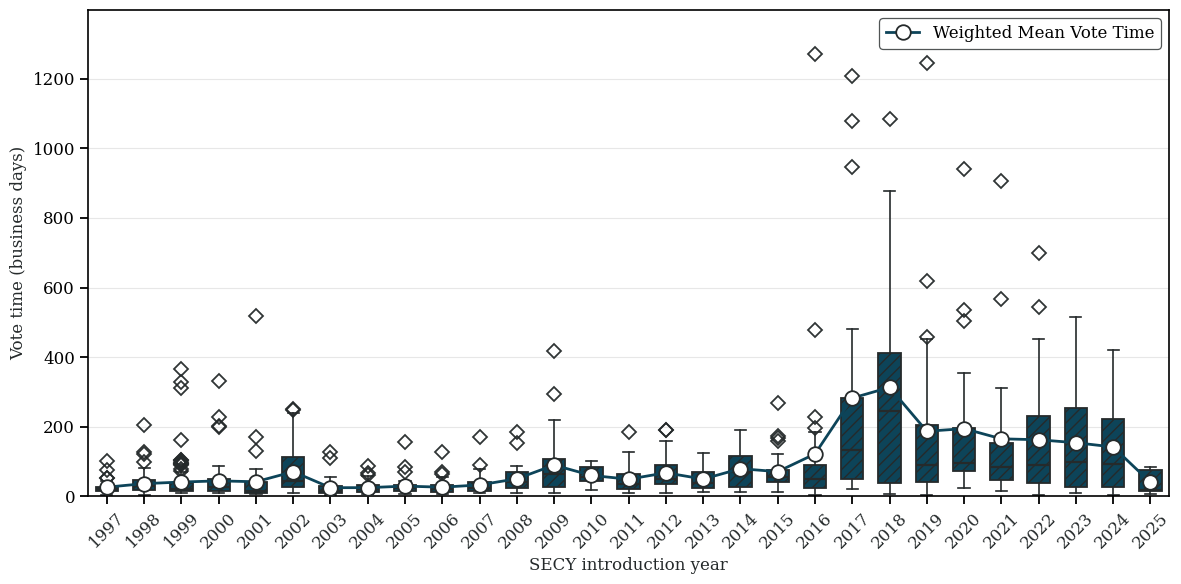

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Fonts (Colab-safe Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 12

# =========================================
# Brand palette (yours) — unchanged
# =========================================
PALETTE = {
    "navy":   "#0D4459",
    "teal":   "#0DC3A8",
    "sky":    "#56A9D5",
    "coal":   "#252A2B",
    "paper":  "#F8F9F9",
    "orange": "#EE5C36",
    "yellow": "#F8B944",
    "magenta":"#E82269",
}

# =========================================
# Mode — unchanged
# =========================================
MODE = "auto"

if MODE == "auto":
    BOX_FACE   = PALETTE["navy"]
    BOX_EDGE   = PALETTE["coal"]
    MEDIAN     = PALETTE["coal"]
    WHISKER    = PALETTE["coal"]
    CAP        = PALETTE["coal"]
    FLIER_EDGE = PALETTE["coal"]
    FLIER_MARK = "D"
    HATCH      = "///"
    MEAN_LINE  = PALETTE["navy"]
    MEAN_DOT_FACE = "white"
    MEAN_DOT_EDGE = PALETTE["coal"]
    ERROR_BAR  = PALETTE["navy"]
else:
    BOX_FACE   = "white"
    BOX_EDGE   = "#000000"
    MEDIAN     = "#000000"
    WHISKER    = "#000000"
    CAP        = "#000000"
    FLIER_EDGE = "#000000"
    FLIER_MARK = "D"
    HATCH      = "///"
    MEAN_LINE  = "#000000"
    MEAN_DOT_FACE = "white"
    MEAN_DOT_EDGE = "#000000"
    ERROR_BAR  = "#000000"

# =========================================
# 0) Data prep — unchanged
# =========================================
df = unique_secy.dropna(subset=['SECY Year', 'Original_Vote_Business_Days']).copy()
df['SECY Year'] = df['SECY Year'].astype(int)

years = np.array(sorted(df['SECY Year'].unique()))
pos = np.arange(len(years))
per_year_vals = [df.loc[df['SECY Year'] == y, 'Original_Vote_Business_Days'].values for y in years]

# 1) Means / 95% CI (no CI drawn) — unchanged
means = np.array([v.mean() if len(v) else np.nan for v in per_year_vals])
ns    = np.array([len(v) for v in per_year_vals])
stds  = np.array([v.std(ddof=1) if len(v) > 1 else 0.0 for v in per_year_vals])
sems  = np.where(ns > 0, stds / np.sqrt(ns), np.nan)
yerr  = 1.96 * sems

# =========================================
# 2) Plot — updated to match Figure 1 framing
# =========================================
plt.rcParams.update({
    'axes.grid': False,
    'figure.facecolor': 'white',   # match Fig 1 (no shaded bg)
    'savefig.facecolor': 'white',  # match Fig 1
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('white')          # plot area white (match Fig 1)

# (a) Boxplot (colors/shape/hatch unchanged)
boxprops = dict(edgecolor=BOX_EDGE, linewidth=1.3, facecolor=BOX_FACE, hatch=HATCH)
ax.boxplot(
    per_year_vals,
    positions=pos,
    widths=0.6,
    patch_artist=True,
    showfliers=True,
    whis=1.5,
    boxprops=boxprops,
    medianprops=dict(color=MEDIAN, linewidth=1.6),
    whiskerprops=dict(color=WHISKER, linewidth=1.2),
    capprops=dict(color=CAP, linewidth=1.2),
    flierprops=dict(
        marker=FLIER_MARK,
        markersize=7,
        markerfacecolor='none',
        markeredgecolor=FLIER_EDGE,
        markeredgewidth=1.3,
        linestyle='none',
        alpha=0.95
    )
)

# (b) Mean line ONLY — unchanged
ax.errorbar(
    pos, means,
    fmt='-o',
    linewidth=2.0,
    markersize=10.5,
    color=MEAN_LINE,
    markerfacecolor=MEAN_DOT_FACE,
    markeredgecolor=MEAN_DOT_EDGE,
    markeredgewidth=1.3,
    zorder=3,
    label='Weighted Mean Vote Time'
)

# =========================================
# 3) Labels/ticks/limits — make like Figure 1
# =========================================
ax.set_xlabel('SECY introduction year', color=PALETTE["coal"])
ax.set_ylabel('Vote time (business days)', color=PALETTE["coal"])

# X-ticks (centered, aligned, and with clear tick marks)
ax.set_xticks(pos)
ax.set_xticklabels(years, rotation=45, ha='center', color=PALETTE["coal"])

# Ensure ticks are drawn outward and visible
ax.tick_params(
    axis='x',
    which='major',
    direction='out',   # tick mark pointing downward/outside
    length=6,
    width=1.3,
    color='black',
    bottom=True,
    top=False
)
ax.tick_params(
    axis='y',
    which='major',
    direction='out',
    length=6,
    width=1.3,
    color='black'
)

# Tighten horizontal limits so boxes align with ticks
ax.set_xlim(pos[0] - 0.5, pos[-1] + 0.5)
ax.margins(x=0)

# Black border around plotting area (like Fig 1)
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

# Only horizontal grid lines (like Fig 1)
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

# Robust headroom — unchanged
upper_boxes = np.array([np.nanmax(v) if len(v) else np.nan for v in per_year_vals], dtype=float)
upper_mean_ci = np.nanmax(means + yerr) if np.isfinite(np.nanmax(means + yerr)) else np.nan
candidates = np.r_[upper_boxes, upper_mean_ci]
if not np.all(np.isnan(candidates)):
    upper = np.nanmax(candidates)
    if np.isfinite(upper):
        ax.set_ylim(0, upper * 1.1)

# Legend with solid frame (as before)
leg = ax.legend(frameon=True, loc='upper right')
leg.get_frame().set_edgecolor(PALETTE["coal"])
leg.get_frame().set_linewidth(0.9)

plt.tight_layout()
plt.show()


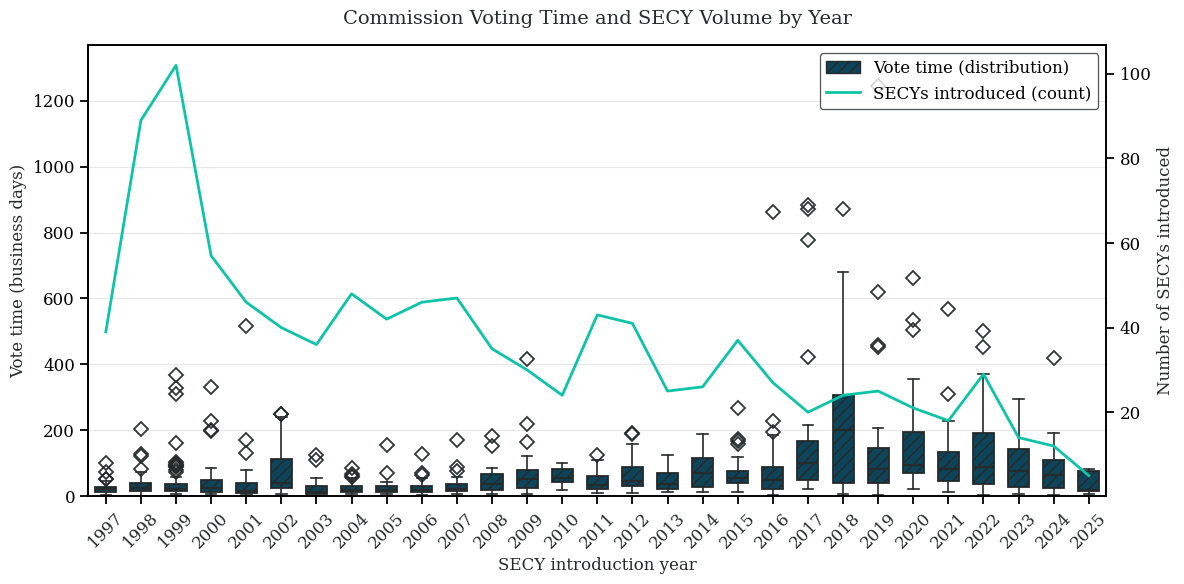

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# --- Fonts (Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 12

# =========================================
# Brand palette
# =========================================
PALETTE = {
    "navy":   "#0D4459",
    "teal":   "#0DC3A8",
    "sky":    "#56A9D5",
    "coal":   "#252A2B",
    "paper":  "#F8F9F9",
    "orange": "#EE5C36",
    "yellow": "#F8B944",
    "magenta":"#E82269",
}

# =========================================
# Mode
# =========================================
MODE = "auto"

if MODE == "auto":
    BOX_FACE   = PALETTE["navy"]
    BOX_EDGE   = PALETTE["coal"]
    MEDIAN     = PALETTE["coal"]
    WHISKER    = PALETTE["coal"]
    CAP        = PALETTE["coal"]
    FLIER_EDGE = PALETTE["coal"]
    FLIER_MARK = "D"
else:
    BOX_FACE   = "white"
    BOX_EDGE   = "#000000"
    MEDIAN     = "#000000"
    WHISKER    = "#000000"
    CAP        = "#000000"
    FLIER_EDGE = "#000000"
    FLIER_MARK = "D"


# =========================================
# 0) Data prep
# =========================================
df = unique_secy.dropna(subset=['SECY Year', 'Vote_Business_Days']).copy()
df['SECY Year'] = df['SECY Year'].astype(int)

years = np.array(sorted(df['SECY Year'].unique()))
pos = np.arange(len(years))
per_year_vals = [df.loc[df['SECY Year'] == y, 'Vote_Business_Days'].values for y in years]

# SECY volume (count) by year
secy_counts = df.groupby('SECY Year').size().reindex(years, fill_value=0).values

# =========================================
# Plot — boxplots + SECY volume line (no dots)
# =========================================
plt.rcParams.update({
    'axes.grid': False,
    'figure.facecolor': 'white',
    'savefig.facecolor': 'white',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('white')

# (a) Boxplot of vote times
boxprops = dict(edgecolor=BOX_EDGE, linewidth=1.3, facecolor=BOX_FACE, hatch=HATCH)
ax.boxplot(
    per_year_vals,
    positions=pos,
    widths=0.6,
    patch_artist=True,
    showfliers=True,
    whis=1.5,
    boxprops=boxprops,
    medianprops=dict(color=MEDIAN, linewidth=1.6),
    whiskerprops=dict(color=WHISKER, linewidth=1.2),
    capprops=dict(color=CAP, linewidth=1.2),
    flierprops=dict(
        marker=FLIER_MARK,
        markersize=7,
        markerfacecolor='none',
        markeredgecolor=FLIER_EDGE,
        markeredgewidth=1.3,
        linestyle='none',
        alpha=0.95
    )
)

# (b) SECY volume line (no markers)
ax2 = ax.twinx()
ax2.plot(
    pos, secy_counts,
    '-',  # simple line, no dots
    linewidth=2.0,
    color=PALETTE["teal"],
    zorder=2
)

# =========================================
# Labels / ticks / limits
# =========================================
ax.set_xlabel('SECY introduction year', color=PALETTE["coal"])
ax.set_ylabel('Vote time (business days)', color=PALETTE["coal"])
ax2.set_ylabel('Number of SECYs introduced', color=PALETTE["coal"])

ax.set_title('Commission Voting Time and SECY Volume by Year', fontsize=14, color=PALETTE["coal"], pad=15)

ax.set_xticks(pos)
ax.set_xticklabels(years, rotation=45, ha='center', color=PALETTE["coal"])

ax.tick_params(axis='x', which='major', direction='out', length=6, width=1.3, color='black', bottom=True, top=False)
ax.tick_params(axis='y', which='major', direction='out', length=6, width=1.3, color='black')
ax2.tick_params(axis='y', which='major', direction='out', length=6, width=1.3, color='black', right=True)

ax.set_xlim(pos[0] - 0.5, pos[-1] + 0.5)
ax.margins(x=0)

# Border and grid
for spine in ax.spines.values():
    spine.set_color('black'); spine.set_linewidth(1.2)
for spine in ax2.spines.values():
    spine.set_color('black'); spine.set_linewidth(1.2)

ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

# Headroom
upper_boxes = np.array([np.nanmax(v) if len(v) else np.nan for v in per_year_vals], dtype=float)
if np.isfinite(np.nanmax(upper_boxes)):
    ax.set_ylim(0, np.nanmax(upper_boxes) * 1.1)

# Legend
legend_elements = [
    Patch(facecolor=BOX_FACE, edgecolor=BOX_EDGE, hatch=HATCH, label='Vote time (distribution)'),
    Line2D([0], [0], color=PALETTE["teal"], linewidth=2.0, label='SECYs introduced (count)')
]
leg = ax.legend(handles=legend_elements, frameon=True, loc='upper right')
leg.get_frame().set_edgecolor(PALETTE["coal"])
leg.get_frame().set_linewidth(0.9)

plt.tight_layout()
plt.show()


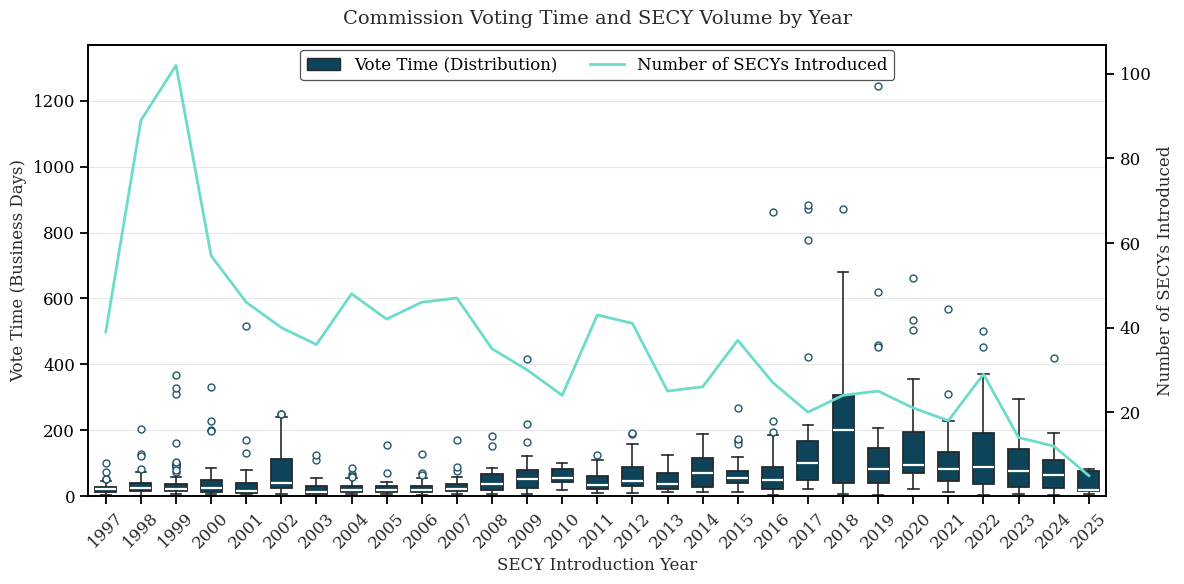

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# --- Fonts (Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 12

# =========================================
# Brand palette
# =========================================
PALETTE = {
    "navy":   "#0D4459",   # main box color (solid)
    "teal":   "#0DC3A8",
    "sky":    "#56A9D5",
    "coal":   "#252A2B",
    "paper":  "#F8F9F9",
    "orange": "#EE5C36",
    "yellow": "#F8B944",
    "magenta":"#E82269",
}

# Lighten function (for the line only)
def lighten(hex_color, factor=0.5):
    """Lighten a hex color by mixing with white."""
    hex_color = hex_color.lstrip('#')
    r, g, b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    r = int(r + (255 - r) * factor)
    g = int(g + (255 - g) * factor)
    b = int(b + (255 - b) * factor)
    return f'#{r:02X}{g:02X}{b:02X}'

TEAL_LIGHT = lighten(PALETTE["teal"], 0.4)

# =========================================
# 0) Data prep
# =========================================
df = unique_secy.dropna(subset=['SECY Year', 'Vote_Business_Days']).copy()
df['SECY Year'] = df['SECY Year'].astype(int)

years = np.array(sorted(df['SECY Year'].unique()))
pos = np.arange(len(years))
per_year_vals = [df.loc[df['SECY Year'] == y, 'Vote_Business_Days'].values for y in years]

# SECY volume (count) by year
secy_counts = df.groupby('SECY Year').size().reindex(years, fill_value=0).values

# =========================================
# 1) Plot setup
# =========================================
plt.rcParams.update({
    'axes.grid': False,
    'figure.facecolor': 'white',
    'savefig.facecolor': 'white',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('white')

# =========================================
# 2) Boxplot — vote time distribution (solid navy fill)
# =========================================
boxprops = dict(
    edgecolor=PALETTE["coal"],
    linewidth=1.3,
    facecolor=PALETTE["navy"],   # <-- solid navy fill
)

ax.boxplot(
    per_year_vals,
    positions=pos,
    widths=0.6,
    patch_artist=True,
    showfliers=True,
    whis=1.5,
    boxprops=boxprops,
    medianprops=dict(color='white', linewidth=1.6),  # white median line pops on navy
    whiskerprops=dict(color=PALETTE["coal"], linewidth=1.2),
    capprops=dict(color=PALETTE["coal"], linewidth=1.2),
    flierprops=dict(
        marker='o',                # round dots for outliers
        markersize=5,
        markerfacecolor='white',   # white fill for contrast
        markeredgecolor=PALETTE["navy"],
        markeredgewidth=1.0,
        linestyle='none',
        alpha=0.9
    )
)

# =========================================
# 3) SECY volume line (lighter teal)
# =========================================
ax2 = ax.twinx()
ax2.plot(
    pos, secy_counts,
    '-', linewidth=2.0,
    color=TEAL_LIGHT,
    zorder=2
)

# =========================================
# 4) Labels / ticks / limits
# =========================================
ax.set_xlabel('SECY Introduction Year', color=PALETTE["coal"])
ax.set_ylabel('Vote Time (Business Days)', color=PALETTE["coal"])
ax2.set_ylabel('Number of SECYs Introduced', color=PALETTE["coal"])

ax.set_title(
    'Commission Voting Time and SECY Volume by Year',
    fontsize=14, color=PALETTE["coal"], pad=15
)

ax.set_xticks(pos)
ax.set_xticklabels(years, rotation=45, ha='center', color=PALETTE["coal"])

ax.tick_params(axis='x', which='major', direction='out',
               length=6, width=1.3, color='black', bottom=True, top=False)
ax.tick_params(axis='y', which='major', direction='out',
               length=6, width=1.3, color='black')
ax2.tick_params(axis='y', which='major', direction='out',
                length=6, width=1.3, color='black', right=True)

ax.set_xlim(pos[0] - 0.5, pos[-1] + 0.5)
ax.margins(x=0)

# Borders & grid
for spine in ax.spines.values():
    spine.set_color('black'); spine.set_linewidth(1.2)
for spine in ax2.spines.values():
    spine.set_color('black'); spine.set_linewidth(1.2)

ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

# Headroom
upper_boxes = np.array([np.nanmax(v) if len(v) else np.nan for v in per_year_vals], dtype=float)
if np.isfinite(np.nanmax(upper_boxes)):
    ax.set_ylim(0, np.nanmax(upper_boxes) * 1.1)

# =========================================
# 5) Legend
# =========================================
legend_elements = [
    Patch(facecolor=PALETTE["navy"], edgecolor=PALETTE["coal"], label='Vote Time (Distribution)'),
    Line2D([0], [0], color=TEAL_LIGHT, linewidth=2.0, label='Number of SECYs Introduced')
]
leg = ax.legend(
    handles=legend_elements,
    frameon=True,
    loc='upper center',          # position the legend at the top center
    bbox_to_anchor=(0.5, 1),  # move it slightly above the plot
    ncol=2,                      # display items side by side
    borderaxespad=0.3
)
leg.get_frame().set_edgecolor(PALETTE["coal"])
leg.get_frame().set_linewidth(0.9)

plt.tight_layout()
plt.show()


In [60]:
merged_with_allterm[merged_with_allterm['SECY Year'] == 2025]

SECY_number                                    SRM Description  \
3420  SECY-25-0020  Rulemaking Plan on Cost Expenditure Criteria f...   
3421  SECY-25-0020  Rulemaking Plan on Cost Expenditure Criteria f...   
3422  SECY-25-0020  Rulemaking Plan on Cost Expenditure Criteria f...   
3423  SECY-25-0020  Rulemaking Plan on Cost Expenditure Criteria f...   
3424  SECY-25-0020  Rulemaking Plan on Cost Expenditure Criteria f...   
3425  SECY-25-0021  Denial of Petition for Rulemaking and Disconti...   
3426  SECY-25-0021  Denial of Petition for Rulemaking and Disconti...   
3427  SECY-25-0021  Denial of Petition for Rulemaking and Disconti...   
3428  SECY-25-0021  Denial of Petition for Rulemaking and Disconti...   
3429  SECY-25-0021  Denial of Petition for Rulemaking and Disconti...   
3430  SECY-25-0042  Recommendation to Increase Resident Inspector ...   
3431  SECY-25-0042  Recommendation to Increase Resident Inspector ...   
3432  SECY-25-0042  Recommendation to Increase Resident Inspector ...   
3433  SECY-25-0052  Nth-of-a-Kind Microreactor Licensing and Deplo...   
3434  SECY-25-0052  Nth-of-a-Kind Microreactor Licensing and Deplo...   
3435  SECY-25-0052  Nth-of-a-Kind Microreactor Licensing and Deplo...   
3436  SECY-25-0068  Section 274b. Agreement with the State of Conn...   
3437  SECY-25-0068  Section 274b. Agreement with the State of Conn...   
3438  SECY-25-0068  Section 274b. Agreement with the State of Conn...   

       SRM Date  SRM Year                                           SRM url  \
3420 2025-05-12      2025   https://www.nrc.gov/docs/ML2513/ML25132A111.pdf   
3421 2025-05-12      2025   https://www.nrc.gov/docs/ML2513/ML25132A111.pdf   
3422 2025-05-12      2025   https://www.nrc.gov/docs/ML2513/ML25132A111.pdf   
3423 2025-05-12      2025   https://www.nrc.gov/docs/ML2513/ML25132A111.pdf   
3424 2025-05-12      2025   https://www.nrc.gov/docs/ML2513/ML25132A111.pdf   
3425 2025-04-23      2025  https://www.nrc.gov/docs/ML2511/ML25113A241.html   
3426 2025-04-23      2025  https://www.nrc.gov/docs/ML2511/ML25113A241.html   
3427 2025-04-23      2025  https://www.nrc.gov/docs/ML2511/ML25113A241.html   
3428 2025-04-23      2025  https://www.nrc.gov/docs/ML2511/ML25113A241.html   
3429 2025-04-23      2025  https://www.nrc.gov/docs/ML2511/ML25113A241.html   
3430 2025-09-16      2025   https://www.nrc.gov/docs/ML2525/ML25259A016.pdf   
3431 2025-09-16      2025   https://www.nrc.gov/docs/ML2525/ML25259A016.pdf   
3432 2025-09-16      2025   https://www.nrc.gov/docs/ML2525/ML25259A016.pdf   
3433 2025-11-13      2025   https://www.nrc.gov/docs/ML2531/ML25317A650.pdf   
3434 2025-11-13      2025   https://www.nrc.gov/docs/ML2531/ML25317A650.pdf   
3435 2025-11-13      2025   https://www.nrc.gov/docs/ML2531/ML25317A650.pdf   
3436 2025-08-08      2025   https://www.nrc.gov/docs/ML2522/ML25220A282.pdf   
3437 2025-08-08      2025   https://www.nrc.gov/docs/ML2522/ML25220A282.pdf   
3438 2025-08-08      2025   https://www.nrc.gov/docs/ML2522/ML25220A282.pdf   

                                            Description  SECY Date  SECY Year  \
3420  Rulemaking Plan on Cost Expenditure Criteria f... 2025-03-26       2025   
3421  Rulemaking Plan on Cost Expenditure Criteria f... 2025-03-26       2025   
3422  Rulemaking Plan on Cost Expenditure Criteria f... 2025-03-26       2025   
3423  Rulemaking Plan on Cost Expenditure Criteria f... 2025-03-26       2025   
3424  Rulemaking Plan on Cost Expenditure Criteria f... 2025-03-26       2025   
3425  Denial of Petition for Rulemaking and Disconti... 2025-03-27       2025   
3426  Denial of Petition for Rulemaking and Disconti... 2025-03-27       2025   
3427  Denial of Petition for Rulemaking and Disconti... 2025-03-27       2025   
3428  Denial of Petition for Rulemaking and Disconti... 2025-03-27       2025   
3429  Denial of Petition for Rulemaking and Disconti... 2025-03-27       2025   
3430  Recommendation to Increase Resident Inspector ... 2025-05-21       2


Mean/Median with 95% CI (business days), SECYs ≥ 2019
 Year  Vote_mean  Vote_med  Vote_lo  Vote_hi  SRM_mean  SRM_med  SRM_lo  SRM_hi
 2019        127        54       90      163        34       16      23      45
 2020        122        74       92      153        63       15      27     100
 2021        123        68       81      165        29       12      13      45
 2022        122        72       97      146        38       16      27      48
 2023         94        45       66      123        53       12      28      78
 2024        101        64       70      131        32       20      22      42
 2025         29        15       15       42        12        7       8      17

Overall weighted mean — SECY→Vote: 114


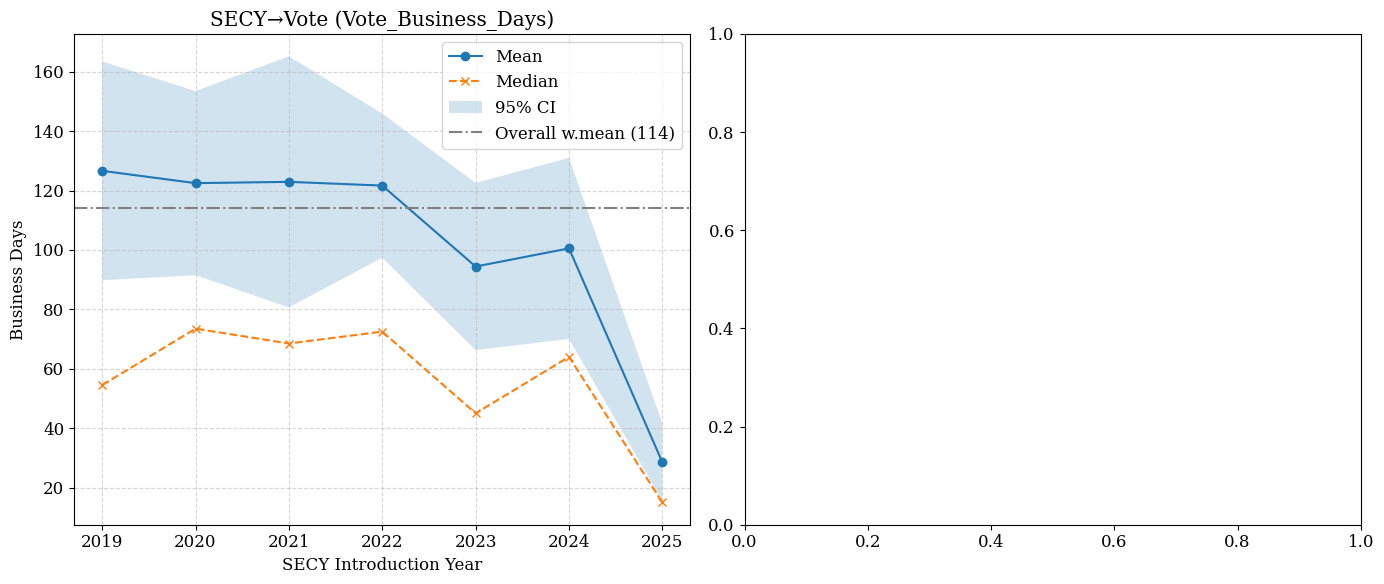

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === 1) Filter SECYs introduced in 2020+ ===
df = merged_with_allterm[merged_with_allterm['SECY Year'] >= 2019].copy()

# === 2) Per-year stats for both variables ===
stats = (
    df.groupby('SECY Year')[['Vote_Business_Days', 'Vote_SRM_Business_Days']]
      .agg(['mean','median','count','std'])
      .reset_index()
)

# Flatten columns
stats.columns = [
    'SECY Year',
    'Vote_Mean','Vote_Median','Vote_Count','Vote_Std',
    'SRM_Mean','SRM_Median','SRM_Count','SRM_Std'
]
stats['SECY Year'] = stats['SECY Year'].astype('Int64')

# 95% CI (normal approx)
stats['Vote_SE']     = stats['Vote_Std'] / np.sqrt(stats['Vote_Count'])
stats['Vote_CI_low'] = stats['Vote_Mean'] - 1.96 * stats['Vote_SE']
stats['Vote_CI_high']= stats['Vote_Mean'] + 1.96 * stats['Vote_SE']

stats['SRM_SE']      = stats['SRM_Std'] / np.sqrt(stats['SRM_Count'])
stats['SRM_CI_low']  = stats['SRM_Mean'] - 1.96 * stats['SRM_SE']
stats['SRM_CI_high'] = stats['SRM_Mean'] + 1.96 * stats['SRM_SE']

# Overall weighted means (weights = per-year counts)
vote_wmean = np.average(stats['Vote_Mean'], weights=stats['Vote_Count'])
srm_wmean  = np.average(stats['SRM_Mean'],  weights=stats['SRM_Count'])

# === 3) Concise integer table ===
table = (
    stats[['SECY Year',
           'Vote_Mean','Vote_Median','Vote_CI_low','Vote_CI_high',
           'SRM_Mean','SRM_Median','SRM_CI_low','SRM_CI_high']]
    .round(0).astype(int)
    .rename(columns={
        'SECY Year':'Year',
        'Vote_Mean':'Vote_mean','Vote_Median':'Vote_med',
        'Vote_CI_low':'Vote_lo','Vote_CI_high':'Vote_hi',
        'SRM_Mean':'SRM_mean','SRM_Median':'SRM_med',
        'SRM_CI_low':'SRM_lo','SRM_CI_high':'SRM_hi'
    })
)
print("\nMean/Median with 95% CI (business days), SECYs ≥ 2019")
print(table.to_string(index=False))
print(f"\nOverall weighted mean — SECY→Vote: {int(round(vote_wmean))}")

# === 4) Plots with CI bands ===
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=False)

# SECY → Vote
axes[0].plot(stats['SECY Year'], stats['Vote_Mean'], marker='o', label='Mean')
axes[0].plot(stats['SECY Year'], stats['Vote_Median'], marker='x', linestyle='--', label='Median')
axes[0].fill_between(stats['SECY Year'], stats['Vote_CI_low'], stats['Vote_CI_high'], alpha=0.2, label='95% CI')
axes[0].axhline(vote_wmean, ls='-.', color='gray', label=f'Overall w.mean ({int(round(vote_wmean))})')
axes[0].set_title('SECY→Vote (Vote_Business_Days)')
axes[0].set_xlabel('SECY Introduction Year'); axes[0].set_ylabel('Business Days'); axes[0].grid(True, ls='--', alpha=0.5); axes[0].legend()


plt.tight_layout()
plt.show()



Calendar days (not business days) — Mean/Median with 95% CI, SECYs ≥ 2019
 Year  n_vote  Vote_mean  Vote_med  Vote_lo  Vote_hi  n_srm  SRM_mean  SRM_med  SRM_lo  SRM_hi
 2019     104        222        85      154      289    104        49       24      33      65
 2020      82        197       108      140      255     82        93       22      39     147
 2021      60        214       100      133      294     60        42       17      18      66
 2022     118        197       121      158      237    118        55       24      39      71
 2023      59        154        65      106      202     59        78       18      41     114
 2024      47        173        95      122      223     47        46       28      31      61
 2025      19         45        21       24       66     19        18        9      11      25

Overall weighted mean (calendar days) — SECY→Vote: 191


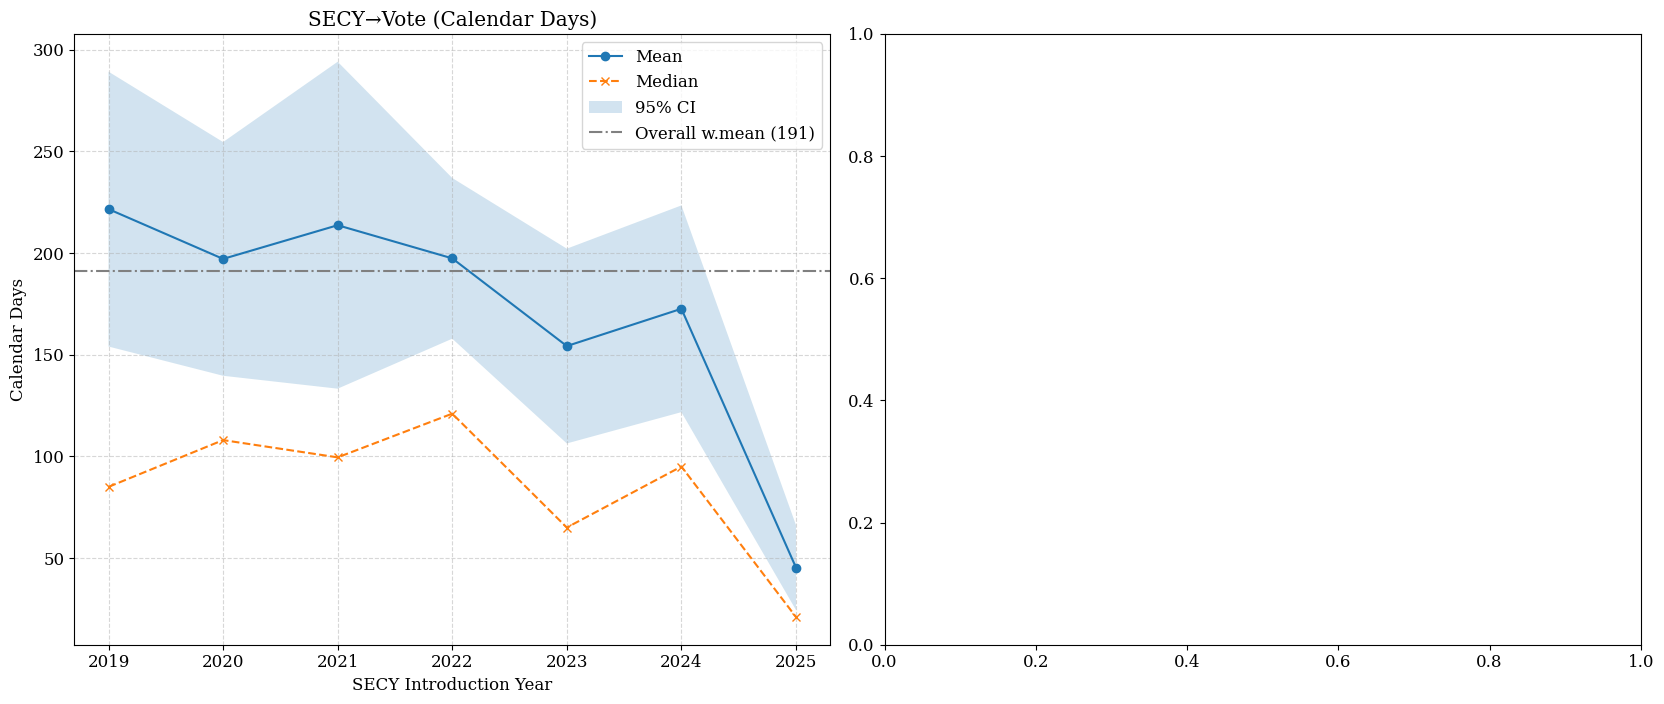

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1) Prep: datetimes & calendar-day deltas ===
df = merged_with_allterm.copy()
for c in ['SECY Date','Vote Date','SRM Date']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce')

df['SECY_to_Vote_Days'] = (df['Vote Date'] - df['SECY Date']).dt.days
df.loc[df['SECY_to_Vote_Days'] < 0, 'SECY_to_Vote_Days'] = np.nan

df['Vote_to_SRM_Days'] = (df['SRM Date'] - df['Vote Date']).dt.days
df.loc[df['Vote_to_SRM_Days'] < 0, 'Vote_to_SRM_Days'] = np.nan

# Filter SECYs introduced in 2020+
df['SECY Year'] = pd.to_numeric(df['SECY Year'], errors='coerce')
df = df[df['SECY Year'] >= 2019].copy()

# === 2) Helper: per-year stats with CI ===
def per_year_stats(frame, col):
    out = (
        frame.dropna(subset=[col, 'SECY Year'])
             .groupby('SECY Year')[col]
             .agg(n='count', mean='mean', median='median', std='std')
             .reset_index()
    )
    out['SECY Year'] = out['SECY Year'].astype('Int64')
    out['se'] = out['std'] / np.sqrt(out['n'])
    z = 1.96
    out['lo'] = out['mean'] - z * out['se']
    out['hi'] = out['mean'] + z * out['se']
    return out

vote_stats = per_year_stats(df, 'SECY_to_Vote_Days')
srm_stats  = per_year_stats(df, 'Vote_to_SRM_Days')

vote_wmean = np.average(vote_stats['mean'], weights=vote_stats['n']) if len(vote_stats) else np.nan
srm_wmean  = np.average(srm_stats['mean'],  weights=srm_stats['n'])  if len(srm_stats)  else np.nan

# === 3) Concise integer table ===
table = (
    vote_stats[['SECY Year','n','mean','median','lo','hi']]
    .merge(srm_stats[['SECY Year','n','mean','median','lo','hi']],
           on='SECY Year', suffixes=('_vote','_srm'))
    .round(0).astype(int)
    .rename(columns={
        'SECY Year':'Year',
        'n_vote':'n_vote','mean_vote':'Vote_mean','median_vote':'Vote_med','lo_vote':'Vote_lo','hi_vote':'Vote_hi',
        'n_srm':'n_srm','mean_srm':'SRM_mean','median_srm':'SRM_med','lo_srm':'SRM_lo','hi_srm':'SRM_hi'
    })
)

print("\nCalendar days (not business days) — Mean/Median with 95% CI, SECYs ≥ 2019")
print(table.to_string(index=False))
print(f"\nOverall weighted mean (calendar days) — SECY→Vote: {int(round(vote_wmean)) if np.isfinite(vote_wmean) else 'NA'}")

# === 4) Side-by-side plots ===
fig, axes = plt.subplots(1, 2, figsize=(16.8,7.2), sharey=False)

# SECY→Vote
axes[0].plot(vote_stats['SECY Year'], vote_stats['mean'], marker='o', label='Mean')
axes[0].plot(vote_stats['SECY Year'], vote_stats['median'], marker='x', linestyle='--', label='Median')
axes[0].fill_between(vote_stats['SECY Year'], vote_stats['lo'], vote_stats['hi'], alpha=0.2, label='95% CI')
if np.isfinite(vote_wmean):
    axes[0].axhline(vote_wmean, ls='-.', color='gray', label=f'Overall w.mean ({int(round(vote_wmean))})')
axes[0].set_title("SECY→Vote (Calendar Days)")
axes[0].set_xlabel("SECY Introduction Year"); axes[0].set_ylabel("Calendar Days")
axes[0].legend(); axes[0].grid(True, ls='--', alpha=0.5)


plt.tight_layout()
plt.show()



Calendar days — SECY-level (last_vote == True). Mean/Median with 95% CI (lo clipped at 0), SECYs ≥ 2019
 Year  n_vote  Vote_mean  Vote_med  Vote_lo  Vote_hi  n_srm  SRM_mean  SRM_med  SRM_lo  SRM_hi
 2019      25        272       133      117      427     25        18       14      11      25
 2020      21        283       139      142      424     21        82       11       0     216
 2021      18        241       120       86      396     18        12        9       8      17
 2022      29        238       137      144      332     29        15       10       7      23
 2023      14        224       142      101      346     14        19        8       6      33
 2024      12        206       136       95      317     12        36       11      12      60
 2025       5         58        27       11      105      5        12        7       2      22

Overall weighted mean (calendar days) — SECY→Vote: 241, Vote→SRM: 29


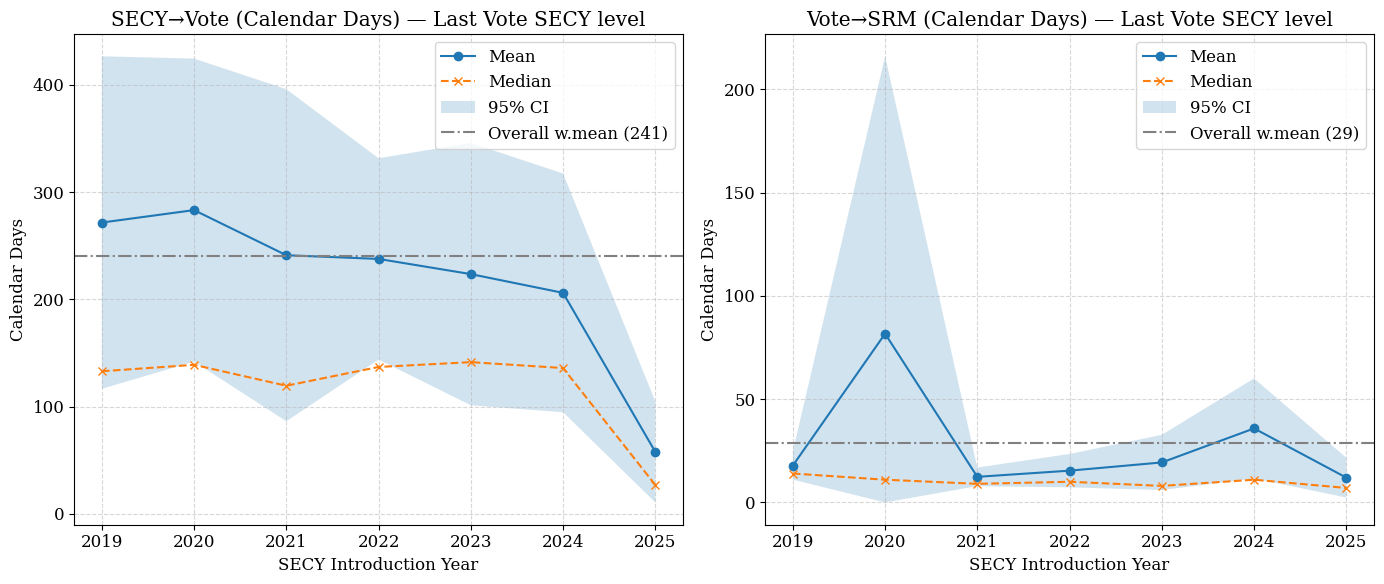

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1) SECY-level (last vote only), datetimes, calendar-day deltas ===
df = merged_with_allterm.copy()

# Keep one row per SECY: last vote
df = df[df['last_vote'] == True].copy()

# Ensure datetime
for c in ['SECY Date','Vote Date','SRM Date']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce')

# Calendar days (end - start).days; negatives -> NaN
df['SECY_to_Vote_Days'] = (df['Vote Date'] - df['SECY Date']).dt.days
df.loc[df['SECY_to_Vote_Days'] < 0, 'SECY_to_Vote_Days'] = np.nan

df['Vote_to_SRM_Days'] = (df['SRM Date'] - df['Vote Date']).dt.days
df.loc[df['Vote_to_SRM_Days'] < 0, 'Vote_to_SRM_Days'] = np.nan

# Filter to SECYs introduced in 2020+
df['SECY Year'] = pd.to_numeric(df['SECY Year'], errors='coerce')
df = df[df['SECY Year'] >= 2019].copy()

# === 2) Helper: per-year stats with 95% CI; clip lower bound at 0 ===
def per_year_stats(frame, col):
    out = (
        frame.dropna(subset=[col, 'SECY Year'])
             .groupby('SECY Year')[col]
             .agg(n='count', mean='mean', median='median', std='std')
             .reset_index()
             .sort_values('SECY Year')
    )
    if out.empty:
        return out.assign(se=np.nan, lo=np.nan, hi=np.nan)

    out['SECY Year'] = out['SECY Year'].astype('Int64')
    out['se'] = out['std'] / np.sqrt(out['n'])
    z = 1.96
    # Normal-approx CI; clip lower bound at 0 days
    out['lo'] = (out['mean'] - z * out['se']).clip(lower=0)
    out['hi'] = (out['mean'] + z * out['se']).clip(lower=0)
    return out

vote_stats = per_year_stats(df, 'SECY_to_Vote_Days')  # SECY → Vote
srm_stats  = per_year_stats(df, 'Vote_to_SRM_Days')   # Vote → SRM

# Weighted overall means (weights = per-year counts)
vote_wmean = np.average(vote_stats['mean'], weights=vote_stats['n']) if len(vote_stats) else np.nan
srm_wmean  = np.average(srm_stats['mean'],  weights=srm_stats['n'])  if len(srm_stats)  else np.nan

# === 3) Concise integer table ===
table = (
    vote_stats[['SECY Year','n','mean','median','lo','hi']]
    .merge(srm_stats[['SECY Year','n','mean','median','lo','hi']],
           on='SECY Year', suffixes=('_vote','_srm'))
    .round(0).astype(int)
    .rename(columns={
        'SECY Year':'Year',
        'n_vote':'n_vote', 'mean_vote':'Vote_mean', 'median_vote':'Vote_med',
        'lo_vote':'Vote_lo', 'hi_vote':'Vote_hi',
        'n_srm':'n_srm',   'mean_srm':'SRM_mean',   'median_srm':'SRM_med',
        'lo_srm':'SRM_lo', 'hi_srm':'SRM_hi'
    })
)

print("\nCalendar days — SECY-level (last_vote == True). Mean/Median with 95% CI (lo clipped at 0), SECYs ≥ 2019")
print(table.to_string(index=False))
print(f"\nOverall weighted mean (calendar days) — SECY→Vote: {int(round(vote_wmean)) if np.isfinite(vote_wmean) else 'NA'}, "
      f"Vote→SRM: {int(round(srm_wmean)) if np.isfinite(srm_wmean) else 'NA'}")

# === 4) Side-by-side plots with CI bands ===
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=False)

# SECY → Vote
axes[0].plot(vote_stats['SECY Year'], vote_stats['mean'], marker='o', label='Mean')
axes[0].plot(vote_stats['SECY Year'], vote_stats['median'], marker='x', linestyle='--', label='Median')
axes[0].fill_between(vote_stats['SECY Year'], vote_stats['lo'], vote_stats['hi'], alpha=0.2, label='95% CI')
if np.isfinite(vote_wmean):
    axes[0].axhline(vote_wmean, ls='-.', color='gray', label=f'Overall w.mean ({int(round(vote_wmean))})')
axes[0].set_title("SECY→Vote (Calendar Days) — Last Vote SECY level")
axes[0].set_xlabel("SECY Introduction Year"); axes[0].set_ylabel("Calendar Days")
axes[0].legend(); axes[0].grid(True, ls='--', alpha=0.5)

# Vote → SRM
axes[1].plot(srm_stats['SECY Year'], srm_stats['mean'], marker='o', label='Mean')
axes[1].plot(srm_stats['SECY Year'], srm_stats['median'], marker='x', linestyle='--', label='Median')
axes[1].fill_between(srm_stats['SECY Year'], srm_stats['lo'], srm_stats['hi'], alpha=0.2, label='95% CI')
if np.isfinite(srm_wmean):
    axes[1].axhline(srm_wmean, ls='-.', color='gray', label=f'Overall w.mean ({int(round(srm_wmean))})')
axes[1].set_title("Vote→SRM (Calendar Days) — Last Vote SECY level")
axes[1].set_xlabel("SECY Introduction Year"); axes[1].set_ylabel("Calendar Days")
axes[1].legend(); axes[1].grid(True, ls='--', alpha=0.5)

plt.tight_layout()
plt.show()



Calendar days — SECY-level (last_vote == True). Mean/Median with 95% CI (lo clipped at 0), SECYs ≥ 2020
 Year  n_vote  Vote_mean  Vote_med  Vote_lo  Vote_hi  n_srm  SRM_mean  SRM_med  SRM_lo  SRM_hi
 2020      21        120        73       46      194     21       245       57      72     419
 2021      18        162        96       62      263     18        91       26      17     165
 2022      29        136        70       72      199     29       117       55      69     165
 2023      14         58        33       27       90     14       184       60      71     298
 2024      12        160        66       52      268     12        82       68      40     124
 2025       5         44        11        0       90      5        25       16       5      46

Overall weighted mean (calendar days) — SECY→Vote: 125, Vote→SRM: 140


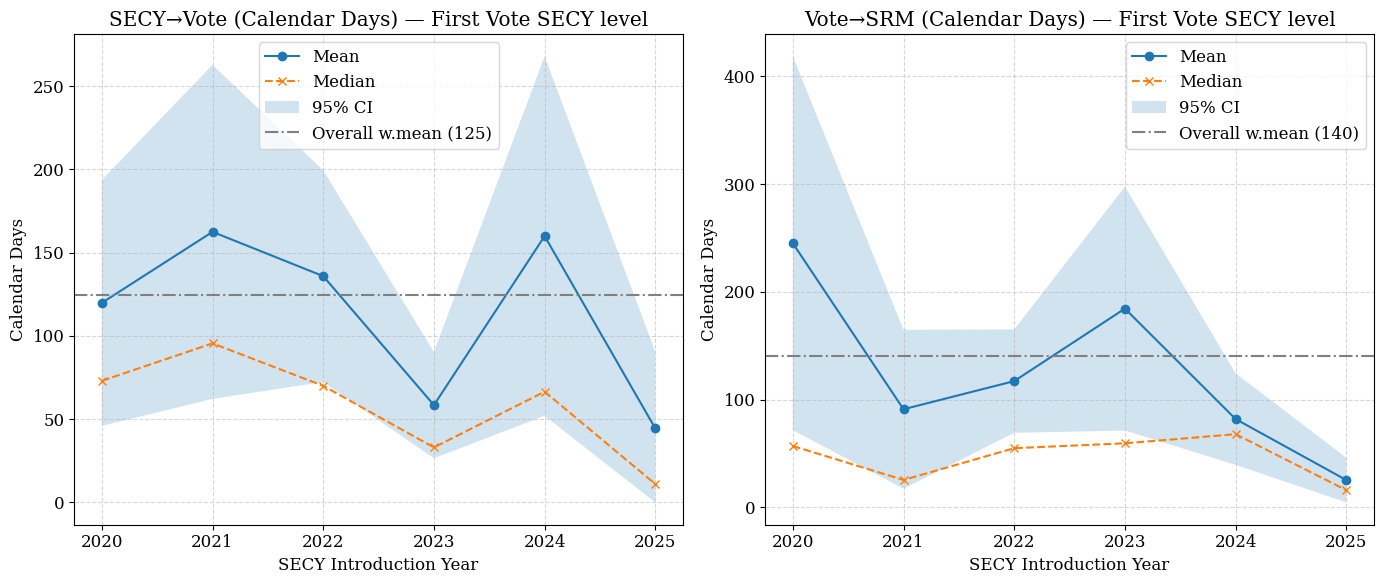

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1) SECY-level (last vote only), datetimes, calendar-day deltas ===
df = merged_with_allterm.copy()

# Keep one row per SECY: last vote
df = df[df['first_vote'] == True].copy()

# Ensure datetime
for c in ['SECY Date','Vote Date','SRM Date']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce')

# Calendar days (end - start).days; negatives -> NaN
df['SECY_to_Vote_Days'] = (df['Vote Date'] - df['SECY Date']).dt.days
df.loc[df['SECY_to_Vote_Days'] < 0, 'SECY_to_Vote_Days'] = np.nan

df['Vote_to_SRM_Days'] = (df['SRM Date'] - df['Vote Date']).dt.days
df.loc[df['Vote_to_SRM_Days'] < 0, 'Vote_to_SRM_Days'] = np.nan

# Filter to SECYs introduced in 2020+
df['SECY Year'] = pd.to_numeric(df['SECY Year'], errors='coerce')
df = df[df['SECY Year'] >= 2020].copy()

# === 2) Helper: per-year stats with 95% CI; clip lower bound at 0 ===
def per_year_stats(frame, col):
    out = (
        frame.dropna(subset=[col, 'SECY Year'])
             .groupby('SECY Year')[col]
             .agg(n='count', mean='mean', median='median', std='std')
             .reset_index()
             .sort_values('SECY Year')
    )
    if out.empty:
        return out.assign(se=np.nan, lo=np.nan, hi=np.nan)

    out['SECY Year'] = out['SECY Year'].astype('Int64')
    out['se'] = out['std'] / np.sqrt(out['n'])
    z = 1.96
    # Normal-approx CI; clip lower bound at 0 days
    out['lo'] = (out['mean'] - z * out['se']).clip(lower=0)
    out['hi'] = (out['mean'] + z * out['se']).clip(lower=0)
    return out

vote_stats = per_year_stats(df, 'SECY_to_Vote_Days')  # SECY → Vote
srm_stats  = per_year_stats(df, 'Vote_to_SRM_Days')   # Vote → SRM

# Weighted overall means (weights = per-year counts)
vote_wmean = np.average(vote_stats['mean'], weights=vote_stats['n']) if len(vote_stats) else np.nan
srm_wmean  = np.average(srm_stats['mean'],  weights=srm_stats['n'])  if len(srm_stats)  else np.nan

# === 3) Concise integer table ===
table = (
    vote_stats[['SECY Year','n','mean','median','lo','hi']]
    .merge(srm_stats[['SECY Year','n','mean','median','lo','hi']],
           on='SECY Year', suffixes=('_vote','_srm'))
    .round(0).astype(int)
    .rename(columns={
        'SECY Year':'Year',
        'n_vote':'n_vote', 'mean_vote':'Vote_mean', 'median_vote':'Vote_med',
        'lo_vote':'Vote_lo', 'hi_vote':'Vote_hi',
        'n_srm':'n_srm',   'mean_srm':'SRM_mean',   'median_srm':'SRM_med',
        'lo_srm':'SRM_lo', 'hi_srm':'SRM_hi'
    })
)

print("\nCalendar days — SECY-level (last_vote == True). Mean/Median with 95% CI (lo clipped at 0), SECYs ≥ 2020")
print(table.to_string(index=False))
print(f"\nOverall weighted mean (calendar days) — SECY→Vote: {int(round(vote_wmean)) if np.isfinite(vote_wmean) else 'NA'}, "
      f"Vote→SRM: {int(round(srm_wmean)) if np.isfinite(srm_wmean) else 'NA'}")

# === 4) Side-by-side plots with CI bands ===
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=False)

# SECY → Vote
axes[0].plot(vote_stats['SECY Year'], vote_stats['mean'], marker='o', label='Mean')
axes[0].plot(vote_stats['SECY Year'], vote_stats['median'], marker='x', linestyle='--', label='Median')
axes[0].fill_between(vote_stats['SECY Year'], vote_stats['lo'], vote_stats['hi'], alpha=0.2, label='95% CI')
if np.isfinite(vote_wmean):
    axes[0].axhline(vote_wmean, ls='-.', color='gray', label=f'Overall w.mean ({int(round(vote_wmean))})')
axes[0].set_title("SECY→Vote (Calendar Days) — First Vote SECY level")
axes[0].set_xlabel("SECY Introduction Year"); axes[0].set_ylabel("Calendar Days")
axes[0].legend(); axes[0].grid(True, ls='--', alpha=0.5)

# Vote → SRM
axes[1].plot(srm_stats['SECY Year'], srm_stats['mean'], marker='o', label='Mean')
axes[1].plot(srm_stats['SECY Year'], srm_stats['median'], marker='x', linestyle='--', label='Median')
axes[1].fill_between(srm_stats['SECY Year'], srm_stats['lo'], srm_stats['hi'], alpha=0.2, label='95% CI')
if np.isfinite(srm_wmean):
    axes[1].axhline(srm_wmean, ls='-.', color='gray', label=f'Overall w.mean ({int(round(srm_wmean))})')
axes[1].set_title("Vote→SRM (Calendar Days) — First Vote SECY level")
axes[1].set_xlabel("SECY Introduction Year"); axes[1].set_ylabel("Calendar Days")
axes[1].legend(); axes[1].grid(True, ls='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [65]:
plt.rcParams['axes.grid'] = False  # disables grid by default for all plots

In [66]:
# All rows where Vote_SRM_Business_Days < 0
negative_vote_srm = merged_with_allterm[merged_with_allterm['Vote_SRM_Business_Days'] < 0]

# Display basic info
print(negative_vote_srm[['SECY_number', 'voter', 'Vote_SRM_Business_Days', 'Start Date', 'Vote Date', 'SRM Date']])
print(f"Number of negative entries: {len(negative_vote_srm)}")


Empty DataFrame
Columns: [SECY_number, voter, Vote_SRM_Business_Days, Start Date, Vote Date, SRM Date]
Index: []
Number of negative entries: 0


# Figure 10

/tmp/ipython-input-3715297456.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(box_data, patch_artist=True, labels=grouped.index, showfliers=False)


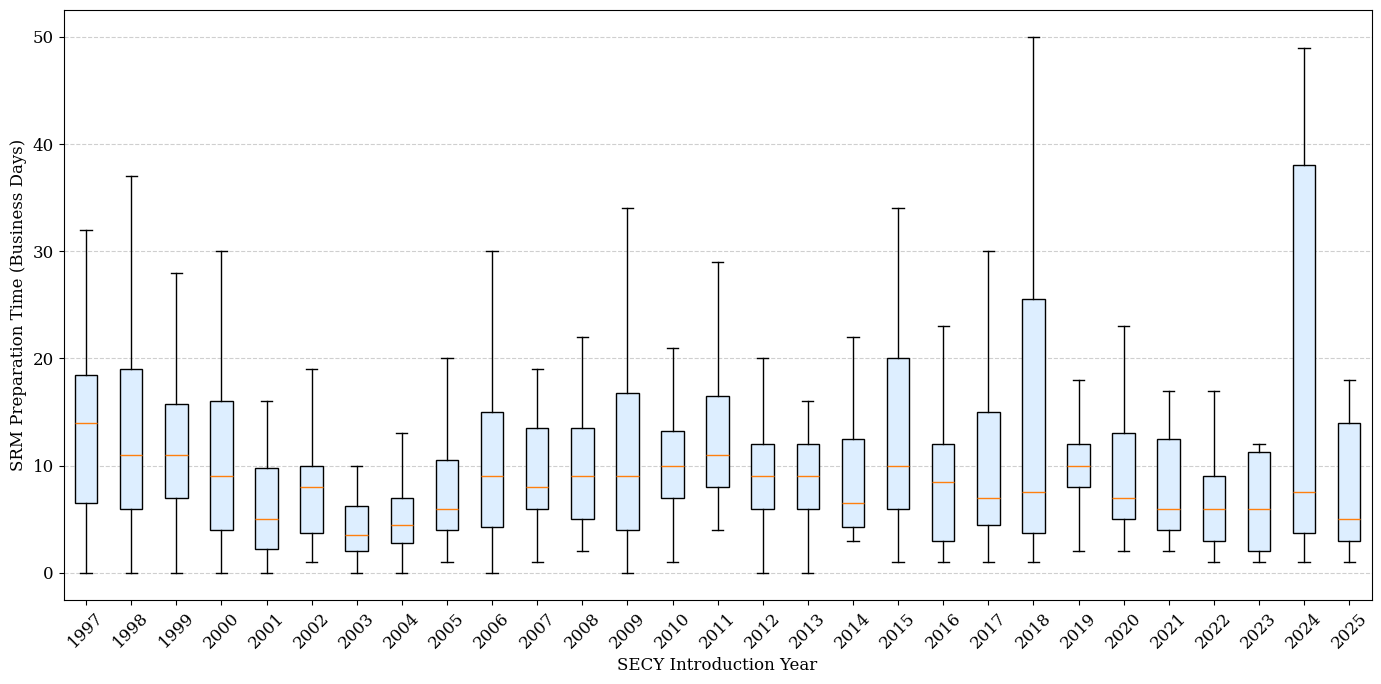

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for last votes with valid 'Vote_SRM_Business_Days'
vote_SRM_data = merged_with_allterm[(merged_with_allterm['last_vote'] == True) & (~merged_with_allterm['Vote_SRM_Business_Days'].isna())]

# Group by 'SECY Year'
grouped = vote_SRM_data.groupby('SECY Year')['Vote_SRM_Business_Days'].apply(list)

# Separate into boxplot values and outliers
box_data = []
outlier_x = []
outlier_y = []

for i, (year, values) in enumerate(grouped.items()):
    series = pd.Series(values)
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr

    box_values = [v for v in values if v <= 1000]
    outliers = [v for v in values if v > 1000]

    box_data.append(box_values)
    outlier_x.extend([i + 1] * len(outliers))
    outlier_y.extend(outliers)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Boxplot on primary axis
bp = ax1.boxplot(box_data, patch_artist=True, labels=grouped.index, showfliers=False)
for box in bp['boxes']:
    box.set(facecolor="#DDEEFF")

##ax1.set_title('Boxplot of SRM Preparation Time (Business Days) by SECY Year\n(Outliers >1000 Shown on Secondary Axis)', fontsize=14)
ax1.set_xlabel('SECY Introduction Year', fontsize=12)
ax1.set_ylabel('SRM Preparation Time (Business Days)', fontsize=12)
plt.xticks(rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Secondary axis for outliers
##ax2 = ax1.twinx()
##ax2.scatter(outlier_x, outlier_y, color='red', label='Outliers > 1000 Days')
##for x, y in zip(outlier_x, outlier_y):
    ##ax2.annotate(f"{int(y)}", (x, y), textcoords="offset points", xytext=(5, 0),
                 ##ha='left', fontsize=8, color='red')

# Set fixed secondary y-axis range to focus on extreme outliers
##ax2.set_ylim(500, 1600)
##ax2.set_yticks([y for y in outlier_y if 700 <= y <= 1500])
##ax2.set_ylabel('Outlier Range (Days)', fontsize=12, color='red')

plt.tight_layout()
plt.show()


/tmp/ipython-input-1257115565.py:71: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


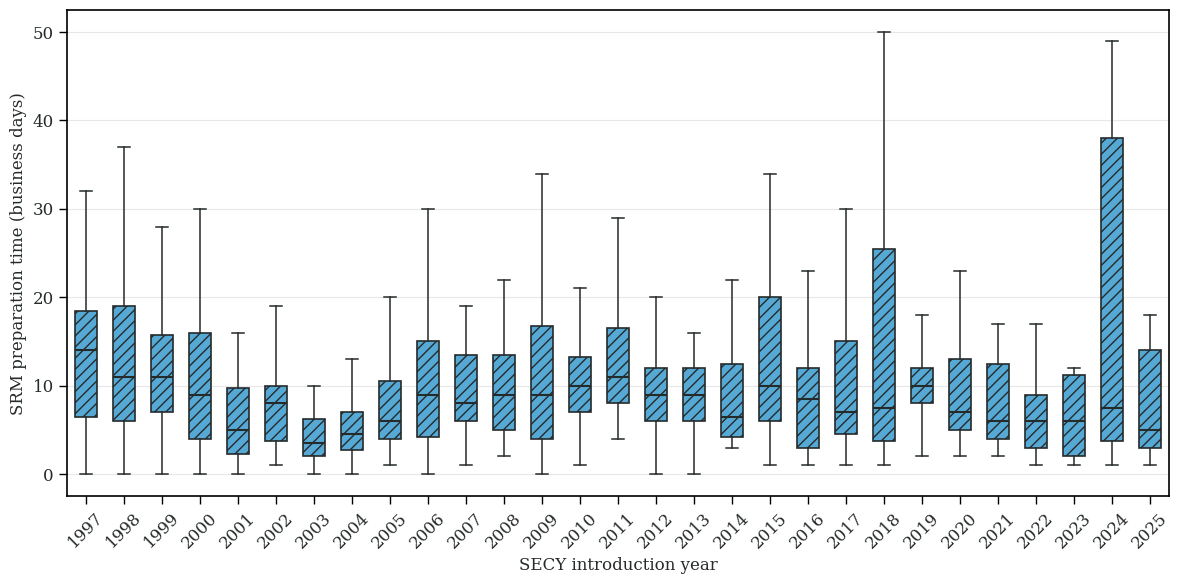

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Brand palette
# -----------------------------
PALETTE = {
    "NAVY":   "#0D4459",  # accents
    "SKY":    "#56A9D5",  # box fill
    "COAL":   "#252A2B",  # axes/edges/text
    "PAPER":  "#FFFFFF",  # pure white
}

# -----------------------------
# Font / rcParams (Colab-safe Times fallback)
# -----------------------------
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'Times', 'DejaVu Serif'],
    'font.size': 12,
    'figure.facecolor': PALETTE["PAPER"],
    'savefig.facecolor': PALETTE["PAPER"],
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.labelcolor': PALETTE["COAL"],
    'xtick.color': PALETTE["COAL"],
    'ytick.color': PALETTE["COAL"],
})

# -----------------------------
# Prepare data
# -----------------------------
vote_SRM_data = merged_with_allterm[
    (merged_with_allterm['last_vote'] == True) &
    (~merged_with_allterm['Vote_SRM_Business_Days'].isna())
][['SECY Year', 'Vote_SRM_Business_Days']].copy()

# Ensure years are ints and sort
vote_SRM_data['SECY Year'] = pd.to_numeric(vote_SRM_data['SECY Year'], errors='coerce').astype('Int64')
vote_SRM_data = vote_SRM_data.dropna(subset=['SECY Year']).sort_values('SECY Year')

# Group to lists, in ascending year order
grouped = (vote_SRM_data
           .groupby('SECY Year')['Vote_SRM_Business_Days']
           .apply(list)
           .sort_index())

# Split into box data (<=1000) and extreme outliers (>1000) for optional overlay
box_data = []
outlier_x, outlier_y = [], []
years = grouped.index.to_numpy()

for i, values in enumerate(grouped):
    vals = np.asarray(values, dtype=float)
    box_vals   = vals[vals <= 1000]
    outliers   = vals[vals > 1000]
    box_data.append(box_vals.tolist())
    if outliers.size:
        outlier_x.extend([i + 1] * outliers.size)  # boxplot positions are 1..N
        outlier_y.extend(outliers.tolist())

# -----------------------------
# Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(PALETTE["PAPER"])
ax.set_facecolor('white')

# Boxplot on primary axis (no fliers)
bp = ax.boxplot(
    box_data,
    positions=np.arange(1, len(years) + 1),
    patch_artist=True,
    labels=years,           # year labels
    showfliers=False,
    widths=0.6
)

# Style boxes: sky fill + hatch, coal edges
for box in bp['boxes']:
    box.set(facecolor=PALETTE["SKY"], edgecolor=PALETTE["COAL"], hatch="///", linewidth=1.2)
for med in bp['medians']:
    med.set(color=PALETTE["COAL"], linewidth=1.5)
for whisk in bp['whiskers']:
    whisk.set(color=PALETTE["COAL"], linewidth=1.1)
for cap in bp['caps']:
    cap.set(color=PALETTE["COAL"], linewidth=1.1)

# Labels
ax.set_xlabel('SECY introduction year', color=PALETTE["COAL"])
ax.set_ylabel('SRM preparation time (business days)', color=PALETTE["COAL"])

# X ticks: all years, centered; fix limits for perfect centering
centers = np.arange(1, len(years) + 1)
ax.set_xticks(centers)
ax.set_xticklabels(years, rotation=45, ha='center')
ax.set_xlim(centers[0] - 0.5, centers[-1] + 0.5)
ax.margins(x=0)

# Grid (horizontal only) and borders
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

# Outward tick marks
ax.tick_params(axis='x', direction='out', length=6, width=1, color='black', bottom=True, top=False)
ax.tick_params(axis='y', direction='out', length=6, width=1, color='black')

# OPTIONAL: plot extreme outliers on same axes (uncomment to show)
# if outlier_x:
#     ax.scatter(outlier_x, outlier_y, s=35, facecolors='none',
#                edgecolors=PALETTE["NAVY"], linewidths=1.2, zorder=3, label='>1000 days')
#     ax.legend(frameon=True, loc='upper right')

#plt.title('SRM Preparation Time by SECY Introduction Year')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2560721551.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


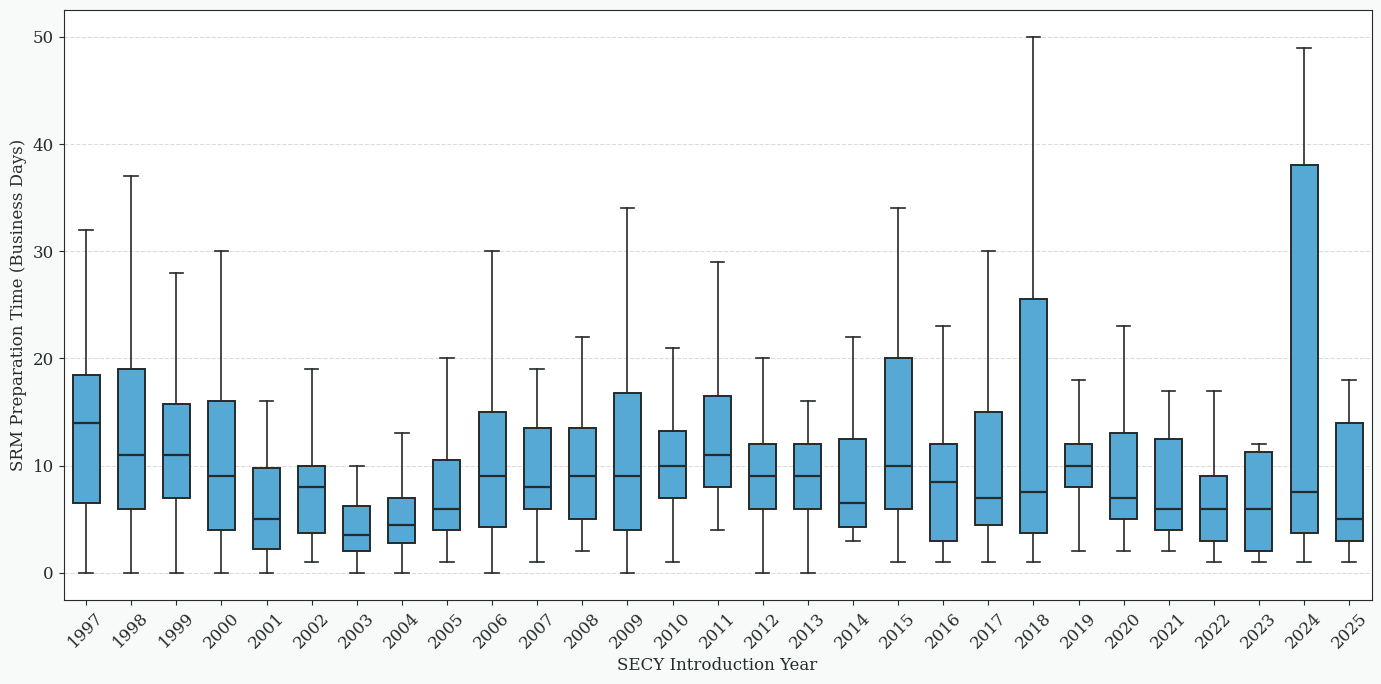

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- Brand palette (CB-safe & print-safe) ----
PALETTE = {
    "NAVY":   "#0D4459",   # primary accent
    "SKY":    "#56A9D5",   # box fill color
    "COAL":   "#252A2B",   # edges, labels
    "PAPER":  "#F8F9F9",   # background
}

# Filter for last votes with valid SRM days + EXCLUDE true outliers (>1000 days)
filtered = merged_with_allterm[
    (merged_with_allterm['last_vote'] == True)
    & (~merged_with_allterm['Vote_SRM_Business_Days'].isna())
    & (merged_with_allterm['Vote_SRM_Business_Days'] <= 1000)
]

# Group by SECY Year
grouped = filtered.groupby('SECY Year')['Vote_SRM_Business_Days'].apply(list)

# ---- Figure setup ----
plt.rcParams.update({
    'figure.facecolor': PALETTE["PAPER"],
    'savefig.facecolor': PALETTE["PAPER"]
})
fig, ax = plt.subplots(figsize=(14, 7))

# ---- Color-filled boxplot (NO HATCH) ----
bp = ax.boxplot(
    grouped.values,
    patch_artist=True,
    labels=grouped.index,
    showfliers=False,
    widths=0.6,
    boxprops=dict(
        facecolor=PALETTE["SKY"],         # ✅ keep solid color
        edgecolor=PALETTE["COAL"],        # ✅ crisp black/charcoal outline
        linewidth=1.4
    ),
    medianprops=dict(color=PALETTE["COAL"], linewidth=1.6),
    whiskerprops=dict(color=PALETTE["COAL"], linewidth=1.2),
    capprops=dict(color=PALETTE["COAL"], linewidth=1.2)
)

# ---- Axis labels & styling ----
ax.set_xlabel('SECY Introduction Year', color=PALETTE["COAL"], fontsize=12)
ax.set_ylabel('SRM Preparation Time (Business Days)', color=PALETTE["COAL"], fontsize=12)
ax.tick_params(axis='x', rotation=45, colors=PALETTE["COAL"])
ax.tick_params(axis='y', colors=PALETTE["COAL"])

# Horizontal reference lines only (no vertical grid)
ax.yaxis.grid(True, linestyle='--', alpha=0.45)
ax.xaxis.grid(False)

# Strong axis edges
for spine in ax.spines.values():
    spine.set_edgecolor(PALETTE["COAL"])

plt.tight_layout()
plt.show()


In [70]:
# Extreme outliers: > 1000 SRM prep business days (last_vote only)
extreme = merged_with_allterm.loc[
    (merged_with_allterm['last_vote'] == True) &
    (merged_with_allterm['Vote_SRM_Business_Days'].notna()) &
    (merged_with_allterm['Vote_SRM_Business_Days'] > 1000),
    ['SECY_number','SECY Year','Vote Date','SRM Date','Vote_SRM_Business_Days','Chair at CVR','voter','detailed_type','Description','SRM url','SECY url']
].copy()

extreme = extreme.sort_values(['Vote_SRM_Business_Days','SECY Year'], ascending=[False, True])

print("Extreme outliers count:", len(extreme))
display(extreme)


Extreme outliers count: 2


SECY_number  SECY Year  Vote Date   SRM Date  Vote_SRM_Business_Days  \
2838  SECY-17-0099       2017 2018-05-11 2025-07-09                  1791.0   
2729  SECY-16-0056       2016 2016-05-31 2022-02-18                  1434.0   

     Chair at CVR       voter  detailed_type  \
2838     Svinicki       BARAN  Proposed Rule   
2729        Burns  OSTENDORFF    Information   

                                            Description  \
2838  Proposed Rule-Cyber Security at Fuel Cycle Fac...   
2729  Recommendations for a Process to Conduct Inimi...   

                                              SRM url  \
2838  https://www.nrc.gov/docs/ML2519/ML25190A291.pdf   
2729  https://www.nrc.gov/docs/ML2204/ML22049B014.pdf   

                                              SECY url  
2838  https://www.nrc.gov/docs/ML1701/ML17018A218.html  
2729   https://www.nrc.gov/docs/ML1532/ML15320A283.pdf

In [71]:
import pandas as pd

# Grouping by 'SECY Year' and calculating summary statistics for 'Vote_SRM_Business_Days'
summary_stats_by_year = vote_SRM_data.groupby('SECY Year')['Vote_SRM_Business_Days'].describe()
summary_stats_by_year

count       mean         std  min   25%   50%    75%     max
SECY Year                                                              
1997        39.0  14.512821   10.542824  0.0  6.50  14.0  18.50    42.0
1998        89.0  15.022472   13.270762  0.0  6.00  11.0  19.00    71.0
1999       102.0  13.607843   12.369042  0.0  7.00  11.0  15.75    81.0
2000        57.0  11.631579   10.822648  0.0  4.00   9.0  16.00    46.0
2001        46.0   6.826087    5.907827  0.0  2.25   5.0   9.75    27.0
2002        40.0   7.725000    5.078802  1.0  3.75   8.0  10.00    24.0
2003        36.0   4.666667    4.154172  0.0  2.00   3.5   6.25    19.0
2004        48.0  15.729167   50.640048  0.0  2.75   4.5   7.00   258.0
2005        42.0  10.428571   17.189252  1.0  4.00   6.0  10.50   109.0
2006        46.0  11.000000    8.788882  0.0  4.25   9.0  15.00    40.0
2007        47.0  12.063830   13.897770  1.0  6.00   8.0  13.50    66.0
2008        35.0  13.571429   15.230167  2.0  5.00   9.0  13.50    72.0
2009        30.0  11.966667   10.496250  0.0  4.00   9.0  16.75    44.0
2010        24.0  13.833333   13.415328  1.0  7.00  10.0  13.25    66.0
2011        43.0  13.325581    8.102677  4.0  8.00  11.0  16.50    38.0
2012        41.0  11.951220   10.721360  0.0  6.00   9.0  12.00    58.0
2013        25.0  10.760000   10.409451  0.0  6.00   9.0  12.00    53.0
2014        26.0  10.000000    8.602325  3.0  4.25   6.5  12.50    41.0
2015        37.0  13.567568   10.769145  1.0  6.00  10.0  20.00    43.0
2016        27.0  62.777778  274.215010  1.0  3.00   9.0  12.00  1434.0
2017        20.0  99.000000  398.337598  1.0  4.75   7.5  15.25  1791.0
2018        24.0  17.500000   20.606035  1.0  3.75   7.5  25.50    67.0
2019        25.0  12.160000   11.869709  1.0  8.00  10.0  12.00    61.0
2020        21.0  55.857143  215.276400  2.0  5.00   7.0  13.00   995.0
2021        18.0   8.666667    6.842772  2.0  4.00   6.0  12.50    29.0
2022        29.0  10.620690   14.936565  1.0  3.00   6.0   9.00    71.0
2023        14.0  13.000000   16.802015  1.0  2.00   6.0  11.25    47.0
2024        12.0  24.583333   29.441647  1.0  3.75   7.5  38.00    98.0
2025         5.0   8.200000    7.395945  1.0  3.00   5.0  14.00    18.0

/tmp/ipython-input-2636637022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SECY Year', y='SRM_Business_Days', data=unique_secy, palette="Set2")


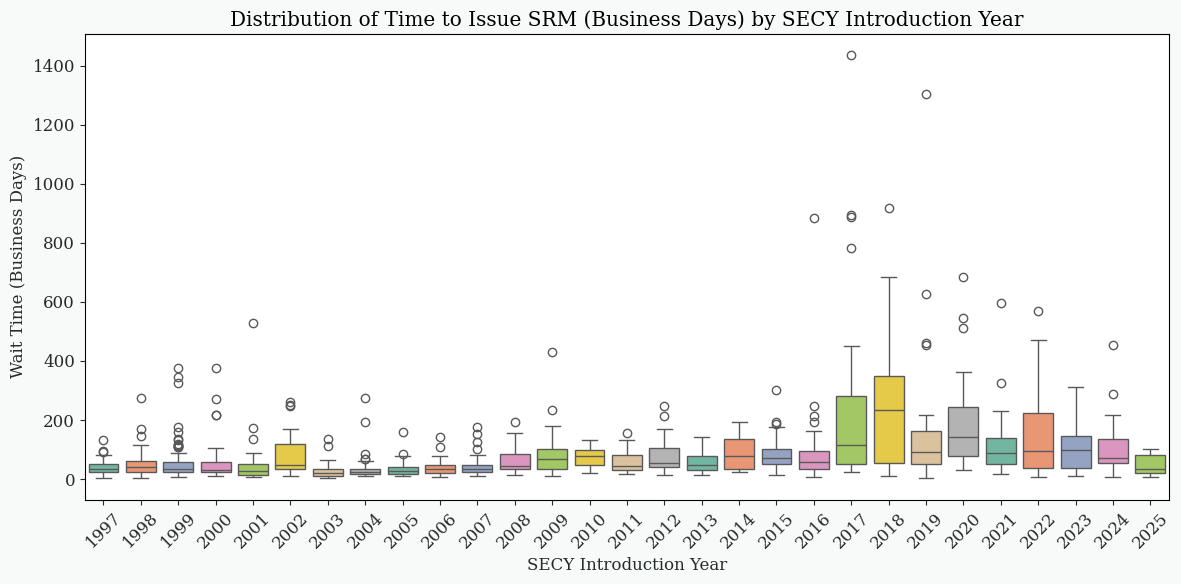

In [72]:
# Create a boxplot for 'wait_day' grouped by 'SECY_year'
plt.figure(figsize=(12, 6))
sns.boxplot(x='SECY Year', y='SRM_Business_Days', data=unique_secy, palette="Set2")

# Customizing the plot
plt.title('Distribution of Time to Issue SRM (Business Days) by SECY Introduction Year')
plt.xlabel('SECY Introduction Year')
plt.ylabel('Wait Time (Business Days)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipython-input-1442102538.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


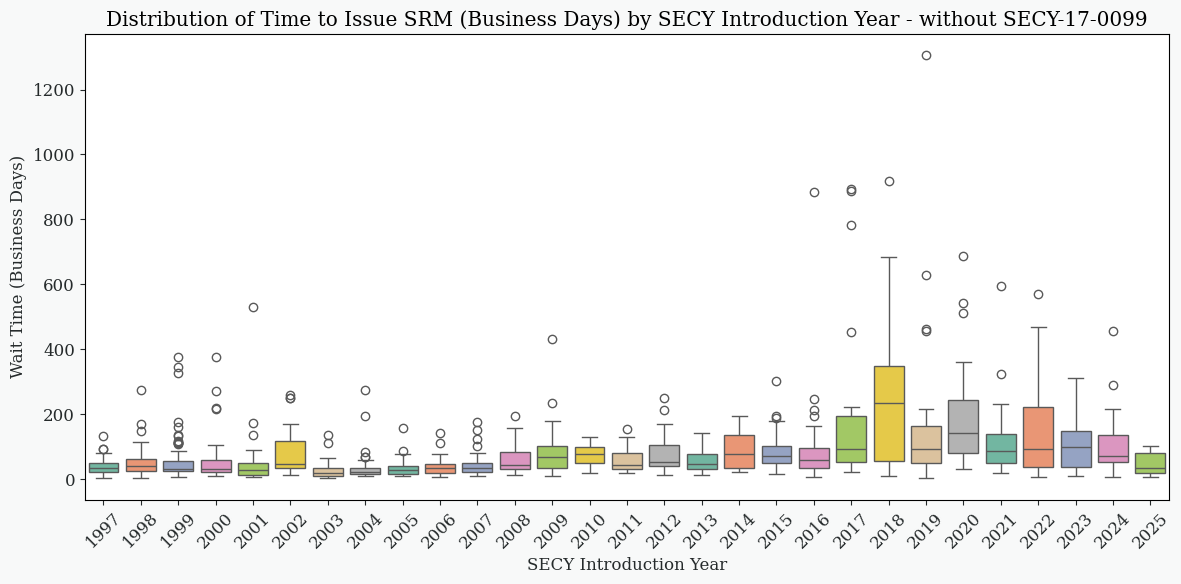

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude SECY-17-0099 first
filtered = unique_secy[unique_secy['SECY_number'] != 'SECY-17-0099']

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='SECY Year',
    y='SRM_Business_Days',
    data=filtered,
    palette="Set2"
)

# Customize aesthetics
plt.title('Distribution of Time to Issue SRM (Business Days) by SECY Introduction Year - without SECY-17-0099')
plt.xlabel('SECY Introduction Year')
plt.ylabel('Wait Time (Business Days)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [74]:
# Calculate the count of SECYs completed in 18, 30, and 60 days
secys_18_days_bus = unique_secy[unique_secy['SRM_Business_Days'] <= 18].shape[0]
secys_30_days_bus = unique_secy[unique_secy['SRM_Business_Days'] <= 30].shape[0]
secys_60_days_bus = unique_secy[unique_secy['SRM_Business_Days'] <= 60].shape[0]

# Total number of SECYs
total_secys = unique_secy.shape[0]

# Calculate the proportions
proportion_18_days_bus = secys_18_days_bus / total_secys
proportion_30_days_bus = secys_30_days_bus / total_secys
proportion_60_days_bus = secys_60_days_bus / total_secys

# Print the count and the proportion for each category
print(f"Count of total SECYs: {total_secys}")
print(f"Count of SECYs completed in 18 days: {secys_18_days_bus}")
print(f"Proportion of SECYs completed in 18 days: {proportion_18_days_bus:.1%}")

print(f"Count of SECYs completed in 30 days: {secys_30_days_bus}")
print(f"Proportion of SECYs completed in 30 days: {proportion_30_days_bus:.1%}")

print(f"Count of SECYs completed in 60 days: {secys_60_days_bus}")
print(f"Proportion of SECYs completed in 60 days: {proportion_60_days_bus:.1%}")


Count of total SECYs: 1048
Count of SECYs completed in 18 days: 154
Proportion of SECYs completed in 18 days: 14.7%
Count of SECYs completed in 30 days: 355
Proportion of SECYs completed in 30 days: 33.9%
Count of SECYs completed in 60 days: 688
Proportion of SECYs completed in 60 days: 65.6%


In [75]:
# Calculate the count of SECYs completed in 18, 30, and 60 days
secys_18_days_bus = unique_secy[unique_secy['Vote_Business_Days'] <= 18].shape[0]
secys_30_days_bus = unique_secy[unique_secy['Vote_Business_Days'] <= 30].shape[0]
secys_60_days_bus = unique_secy[unique_secy['Vote_Business_Days'] <= 60].shape[0]

# Total number of SECYs
total_secys = unique_secy.shape[0]

# Calculate the proportions
proportion_18_days_bus = secys_18_days_bus / total_secys
proportion_30_days_bus = secys_30_days_bus / total_secys
proportion_60_days_bus = secys_60_days_bus / total_secys

# Print the count and the proportion for each category
print(f"Count of total SECYs: {total_secys}")
print(f"Count of SECYs completed in 18 days: {secys_18_days_bus}")
print(f"Proportion of SECYs completed in 18 days: {proportion_18_days_bus:.1%}")

print(f"Count of SECYs completed in 30 days: {secys_30_days_bus}")
print(f"Proportion of SECYs completed in 30 days: {proportion_30_days_bus:.1%}")

print(f"Count of SECYs completed in 60 days: {secys_60_days_bus}")
print(f"Proportion of SECYs completed in 60 days: {proportion_60_days_bus:.1%}")


Count of total SECYs: 1048
Count of SECYs completed in 18 days: 290
Proportion of SECYs completed in 18 days: 27.7%
Count of SECYs completed in 30 days: 504
Proportion of SECYs completed in 30 days: 48.1%
Count of SECYs completed in 60 days: 763
Proportion of SECYs completed in 60 days: 72.8%


In [76]:
# Step 0: Filter for last votes only
last_vote_secys = unique_secy[unique_secy['last_vote'] == True].copy()

# Step 1: Assign deadline per detailed_type
def get_deadline(row):
    if row['detailed_type'] == 'Proposed Rule':
        return 30
    elif row['detailed_type'] == 'Final Rule':
        return 60
    else:
        return 18

last_vote_secys['deadline'] = last_vote_secys.apply(get_deadline, axis=1)

# Step 2: Check if voted within the deadline
last_vote_secys['on_time'] = last_vote_secys['Vote_Business_Days'] <= last_vote_secys['deadline']

# Step 3: Calculate count and proportion
total_secys = last_vote_secys.shape[0]
on_time_count = last_vote_secys['on_time'].sum()
on_time_proportion = on_time_count / total_secys

# Step 4: Print results
print(f"Count of SECYs with last vote: {total_secys}")
print(f"Count completed within detailed-type-specific deadline: {on_time_count}")
print(f"Proportion completed on time: {on_time_proportion:.1%}")


Count of SECYs with last vote: 1048
Count completed within detailed-type-specific deadline: 363
Proportion completed on time: 34.6%


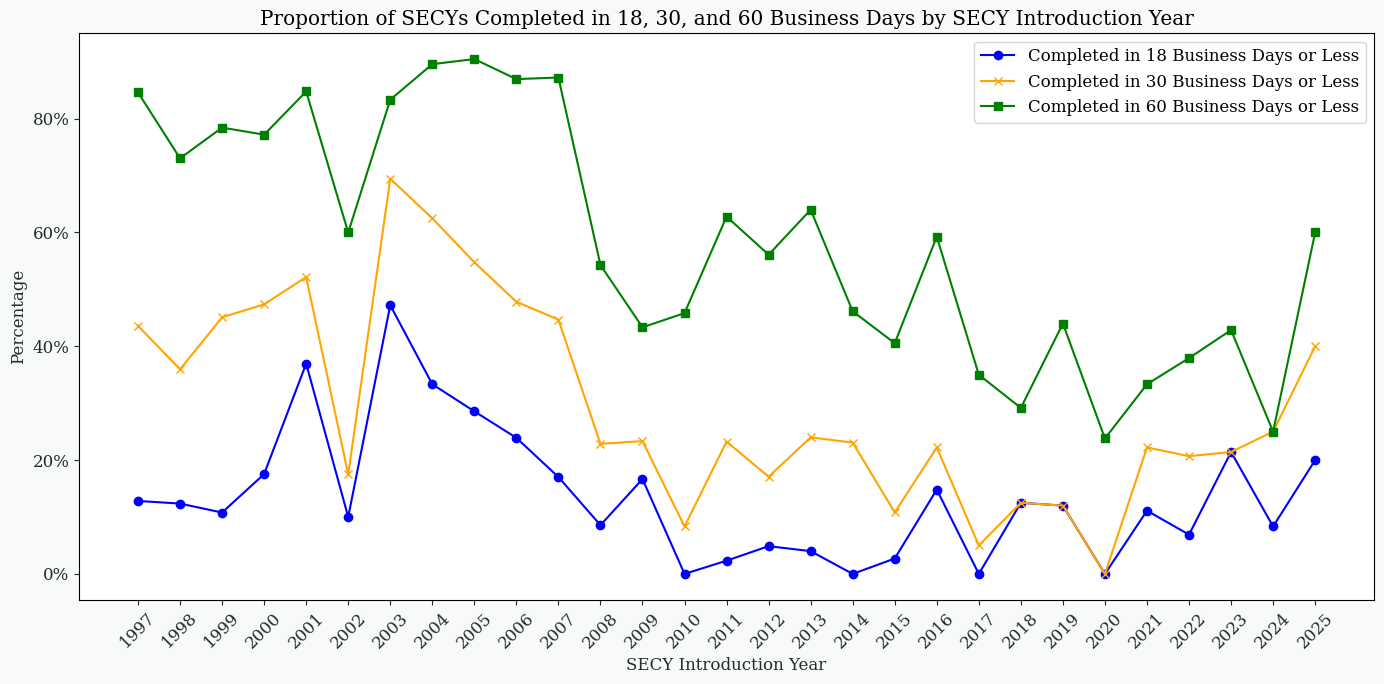

In [77]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter  # Import PercentFormatter

# Step 1: Group by 'SECY_year' and calculate counts for SECYs completed in 18, 30, and 60 days
secys_by_year = unique_secy.groupby('SECY Year')

# Create a dictionary to store proportions for each year
proportions = {'SECY year': [], 'Proportion_18_days': [], 'Proportion_30_days': [], 'Proportion_60_days': []}

# Step 2: Loop through each year and calculate proportions
for year, group in secys_by_year:
    secys_18_days = group[group['SRM_Business_Days'] <= 18].shape[0]
    secys_30_days = group[group['SRM_Business_Days'] <= 30].shape[0]
    secys_60_days = group[group['SRM_Business_Days'] <= 60].shape[0]

    total_secys = group.shape[0]

    proportion_18_days = secys_18_days / total_secys
    proportion_30_days = secys_30_days / total_secys
    proportion_60_days = secys_60_days / total_secys

    # Append the values to the list
    proportions['SECY year'].append(year)
    proportions['Proportion_18_days'].append(proportion_18_days)
    proportions['Proportion_30_days'].append(proportion_30_days)
    proportions['Proportion_60_days'].append(proportion_60_days)

# Step 3: Convert to DataFrame
proportions_df = pd.DataFrame(proportions)

# Step 4: Filter for years starting from 1995
proportions_df = proportions_df[proportions_df['SECY year'] >= 1997]

# Step 5: Plotting the data as a line chart
plt.figure(figsize=(14, 7))

# Plotting each of the proportions as lines
plt.plot(proportions_df['SECY year'], proportions_df['Proportion_18_days'], label='Completed in 18 Business Days or Less', marker='o', color='blue')
plt.plot(proportions_df['SECY year'], proportions_df['Proportion_30_days'], label='Completed in 30 Business Days or Less', marker='x', color='orange')
plt.plot(proportions_df['SECY year'], proportions_df['Proportion_60_days'], label='Completed in 60 Business Days or Less', marker='s', color='green')

# Customizing the plot
plt.title('Proportion of SECYs Completed in 18, 30, and 60 Business Days by SECY Introduction Year')
plt.xlabel('SECY Introduction Year')
plt.ylabel('Percentage')

# Set y-axis to percentage format
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))

plt.xticks(proportions_df['SECY year'], rotation=45)  # Rotate x-axis labels for readability
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

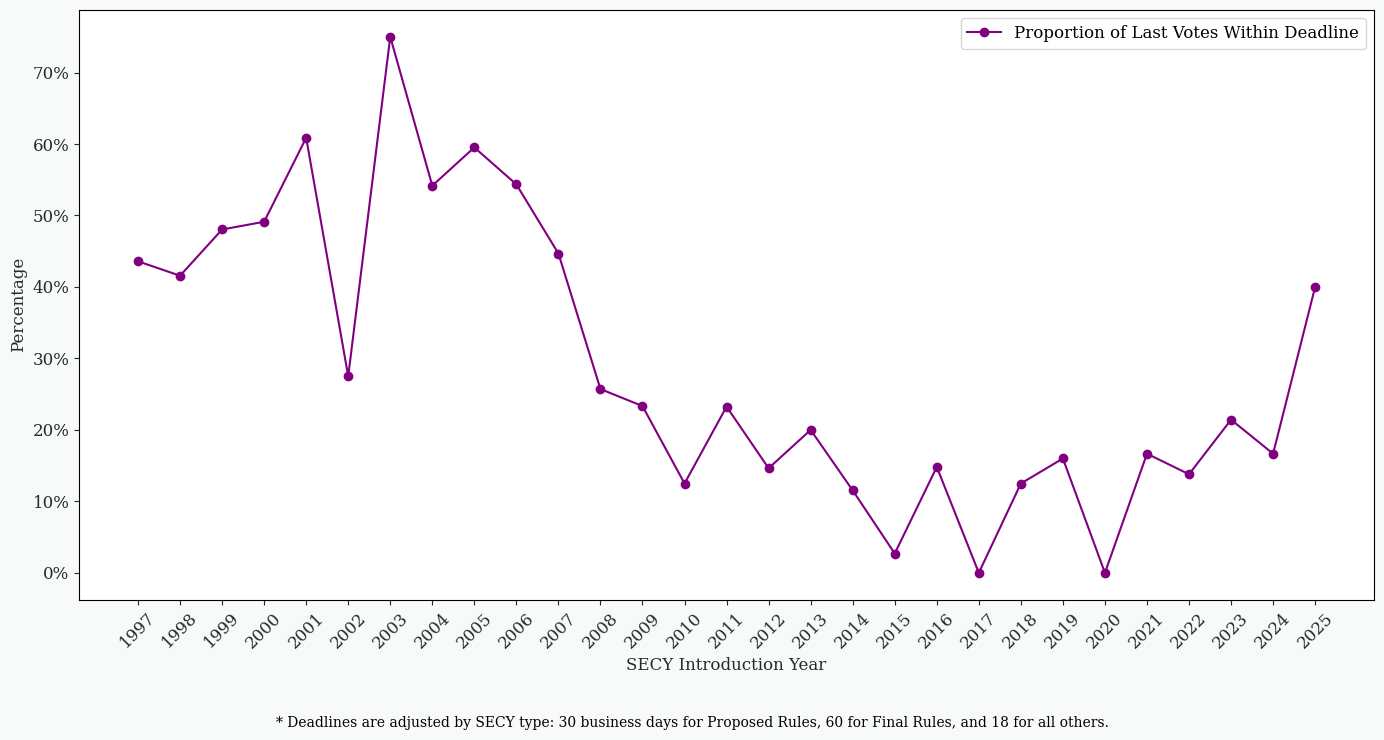

In [78]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd

# Step 0: Filter for last votes only
last_vote_secys = unique_secy[unique_secy['last_vote'] == True].copy()

# Step 1: Assign deadline based on detailed_type
def get_deadline(row):
    if row['detailed_type'] == 'Proposed Rule':
        return 30
    elif row['detailed_type'] == 'Final Rule':
        return 60
    else:
        return 18

last_vote_secys['deadline'] = last_vote_secys.apply(get_deadline, axis=1)
last_vote_secys['on_time'] = last_vote_secys['Vote_Business_Days'] <= last_vote_secys['deadline']

# Step 2: Group by year and compute on-time proportion
proportion_by_year = last_vote_secys.groupby('SECY Year')['on_time'].mean().reset_index()
proportion_by_year = proportion_by_year[proportion_by_year['SECY Year'] >= 1997]

# Step 3: Plot
plt.figure(figsize=(14, 7))
plt.plot(proportion_by_year['SECY Year'], proportion_by_year['on_time'],
         marker='o', color='purple', label='Proportion of Last Votes Within Deadline')

# Axis labels and title
##plt.title('Proportion of Last Votes Completed On Time by SECY Introduction Year*')
plt.xlabel('SECY Introduction Year')
plt.ylabel('Percentage')
plt.xticks(proportion_by_year['SECY Year'], rotation=45)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.legend()

# Asterisk note
plt.figtext(0.5, -0.05,
            "* Deadlines are adjusted by SECY type: 30 business days for Proposed Rules, "
            "60 for Final Rules, and 18 for all others.",
            wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()


#Figure 3

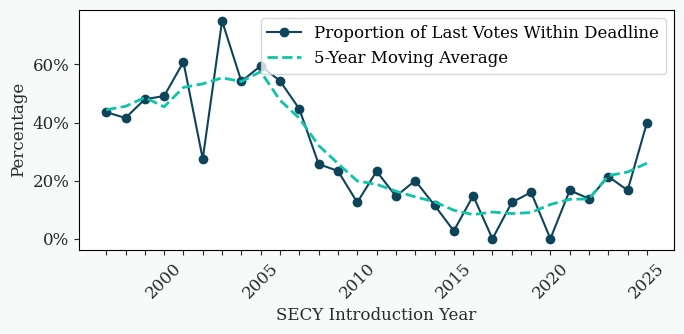

In [79]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd

# Step 0: Filter for last votes only
last_vote_secys = unique_secy[unique_secy['last_vote'] == True].copy()

# Step 1: Assign deadline based on detailed_type
def get_deadline(row):
    if row['detailed_type'] == 'Proposed Rule':
        return 30
    elif row['detailed_type'] == 'Final Rule':
        return 60
    else:
        return 18

last_vote_secys['deadline'] = last_vote_secys.apply(get_deadline, axis=1)
last_vote_secys['on_time'] = last_vote_secys['Vote_Business_Days'] <= last_vote_secys['deadline']

# Step 2: Group by year and compute on-time proportion
proportion_by_year = last_vote_secys.groupby('SECY Year')['on_time'].mean().reset_index()
proportion_by_year = proportion_by_year[proportion_by_year['SECY Year'] >= 1997]

# Step 3: Calculate moving average (5-year window)
proportion_by_year['moving_avg'] = proportion_by_year['on_time'].rolling(window=5, center=True, min_periods=1).mean()

# Step 4: Plot
plt.figure(figsize=(7, 3.5))  # academic journal size (single column)
plt.plot(proportion_by_year['SECY Year'], proportion_by_year['on_time'],
         marker='o', color='#0D4459', label='Proportion of Last Votes Within Deadline')
plt.plot(proportion_by_year['SECY Year'], proportion_by_year['moving_avg'],
         linestyle='--', color='#0DC3A8', linewidth=2, label='5-Year Moving Average')

# Axis labels and title
plt.xlabel('SECY Introduction Year')
plt.ylabel('Percentage')

# Keep all tick marks, but label only selected years
xticks = proportion_by_year['SECY Year']
xtick_labels = [str(year) if year in [2000, 2005, 2010, 2015, 2020, 2025] else '' for year in xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.legend()

# Asterisk note

plt.tight_layout()
plt.show()


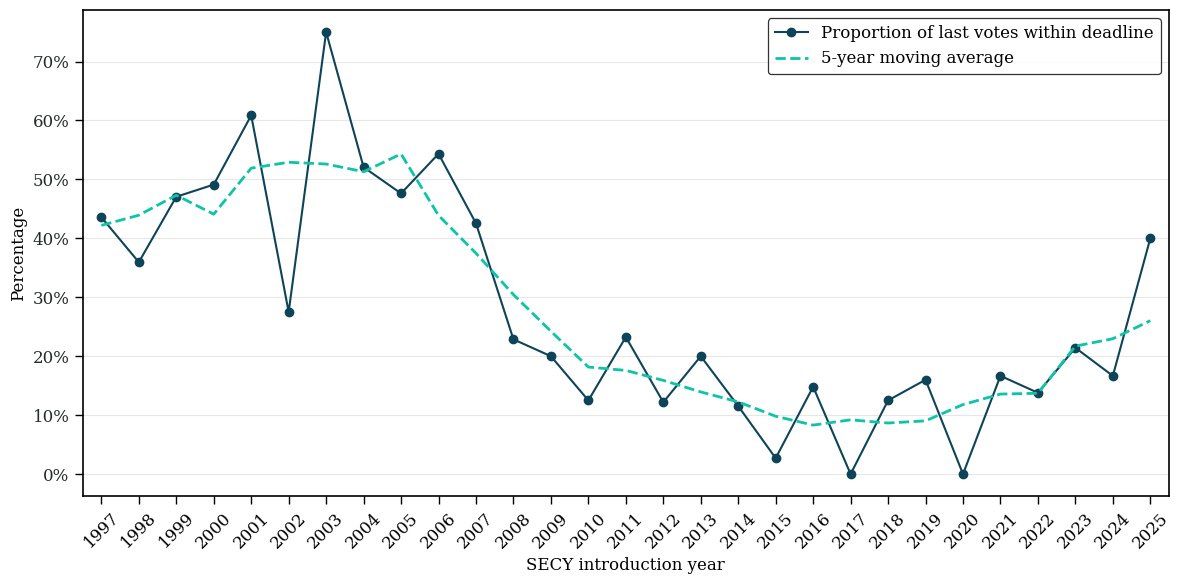

In [80]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# --- Font (Colab-safe Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 12

# =========================================
# 0) Filter for last votes only
# =========================================
last_vote_secys = unique_secy[unique_secy['last_vote'] == True].copy()

# Assign deadlines by detailed_type
def get_deadline(row):
    if row['detailed_type'] == 'Proposed Rule':
        return 30
    elif row['detailed_type'] == 'Final Rule':
        return 60
    else:
        return 18

last_vote_secys['deadline'] = last_vote_secys.apply(get_deadline, axis=1)
last_vote_secys['on_time'] = last_vote_secys['Original_Vote_Business_Days'] <= last_vote_secys['deadline']

# =========================================
# 1) Group by year and compute on-time proportion
# =========================================
proportion_by_year = (
    last_vote_secys.groupby('SECY Year')['on_time']
    .mean()
    .reset_index()
)
proportion_by_year = proportion_by_year[proportion_by_year['SECY Year'] >= 1997]
proportion_by_year = proportion_by_year.sort_values('SECY Year').copy()

# 5-year moving average (centered)
proportion_by_year['moving_avg'] = (
    proportion_by_year['on_time'].rolling(window=5, center=True, min_periods=1).mean()
)

# Use numeric arrays for perfect alignment
years   = proportion_by_year['SECY Year'].astype(int).to_numpy()
on_time = proportion_by_year['on_time'].to_numpy()
moving  = proportion_by_year['moving_avg'].to_numpy()

# =========================================
# 2) Plot — consistent with Figures 1 & 2
# =========================================
fig, ax = plt.subplots(figsize=(12, 6))

# White backgrounds
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Lines (keep your colors/styles)
ax.plot(
    years, on_time,
    marker='o', color='#0D4459',
    label='Proportion of last votes within deadline'
)
ax.plot(
    years, moving,
    linestyle='--', color='#0DC3A8', linewidth=2,
    label='5-year moving average'
)

# =========================================
# 3) Axes, ticks, and grid — match other figures
# =========================================
ax.set_xlabel('SECY introduction year', color='black')
ax.set_ylabel('Percentage', color='black')

# Show ALL years with ticks; center labels; fix limits/margins for alignment
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha='center', color='black')
ax.set_xlim(years[0] - 0.5, years[-1] + 0.5)  # key for perfect centering
ax.margins(x=0)                               # remove extra padding

# Outward tick marks
ax.tick_params(axis='x', direction='out', length=6, width=1, color='black', bottom=True, top=False)
ax.tick_params(axis='y', direction='out', length=6, width=1, color='black')

# Black border
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

# Horizontal grid only
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

# Y as percentages
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

# Legend (upper right) with border
leg = ax.legend(frameon=True, loc='upper right')
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(0.9)

plt.tight_layout()
##plt.title(' Proportion of Last Vote Completed on Time by SECY Introduction Year')
plt.show()


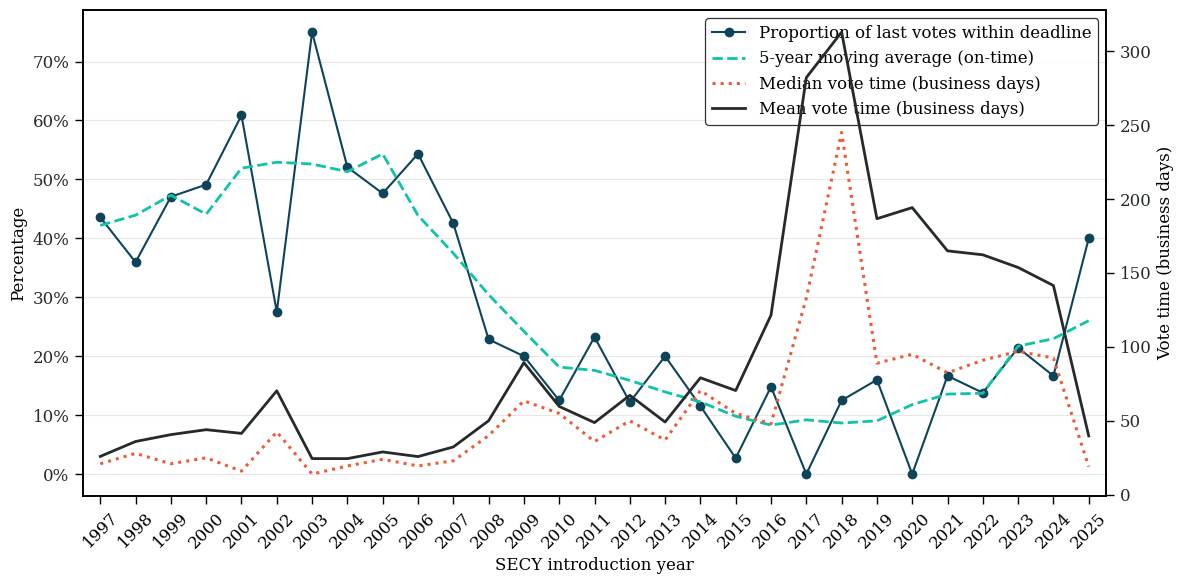

In [81]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd
import numpy as np

# --- Font (Colab-safe Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 12

# =========================================
# 0) Filter for last votes only
# =========================================
last_vote_secys = unique_secy[unique_secy['last_vote'] == True].copy()

def get_deadline(row):
    if row['detailed_type'] == 'Proposed Rule':
        return 30
    elif row['detailed_type'] == 'Final Rule':
        return 60
    else:
        return 18

last_vote_secys['deadline'] = last_vote_secys.apply(get_deadline, axis=1)
last_vote_secys['on_time'] = last_vote_secys['Original_Vote_Business_Days'] <= last_vote_secys['deadline']

# =========================================
# 1) Group by year: on-time proportion + median/mean vote time
# =========================================
stats_by_year = (
    last_vote_secys.groupby('SECY Year')
    .agg(
        on_time=('on_time', 'mean'),
        median_vote_time=('Original_Vote_Business_Days', 'median'),
        mean_vote_time=('Original_Vote_Business_Days', 'mean')
    )
    .reset_index()
)

stats_by_year = stats_by_year[stats_by_year['SECY Year'] >= 1997].sort_values('SECY Year').copy()

# 5-year moving average (centered) for on-time proportion
stats_by_year['moving_avg'] = (
    stats_by_year['on_time'].rolling(window=5, center=True, min_periods=1).mean()
)

# arrays
years   = stats_by_year['SECY Year'].astype(int).to_numpy()
on_time = stats_by_year['on_time'].to_numpy()
moving  = stats_by_year['moving_avg'].to_numpy()
median  = stats_by_year['median_vote_time'].to_numpy()
mean    = stats_by_year['mean_vote_time'].to_numpy()

# =========================================
# 2) Plot
# =========================================
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Left axis: on-time proportion
ax.plot(
    years, on_time,
    marker='o', color='#0D4459',
    label='Proportion of last votes within deadline'
)
ax.plot(
    years, moving,
    linestyle='--', color='#0DC3A8', linewidth=2,
    label='5-year moving average (on-time)'
)

# Right axis: median + mean vote time
ax2 = ax.twinx()
ax2.plot(
    years, median,
    linestyle=':', linewidth=2.2, color='#EE5C36',
    label='Median vote time (business days)'
)
ax2.plot(
    years, mean,
    linestyle='-', linewidth=2.0, color='#252A2B',
    label='Mean vote time (business days)'
)

# =========================================
# 3) Axes, ticks, and grid
# =========================================
ax.set_xlabel('SECY introduction year', color='black')
ax.set_ylabel('Percentage', color='black')
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

ax2.set_ylabel('Vote time (business days)', color='black')
ax2.tick_params(axis='y', direction='out', length=6, width=1, color='black')

ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha='center', color='black')
ax.set_xlim(years[0] - 0.5, years[-1] + 0.5)
ax.margins(x=0)

ax.tick_params(axis='x', direction='out', length=6, width=1, color='black', bottom=True, top=False)
ax.tick_params(axis='y', direction='out', length=6, width=1, color='black')

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)
for spine in ax2.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

# Combined legend
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
leg = ax.legend(handles1 + handles2, labels1 + labels2, frameon=True, loc='upper right')
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(0.9)

plt.tight_layout()
plt.show()


In [82]:
# Filter the records where the voter is "Marzano"
marzano_records = merged_with_allterm[merged_with_allterm['voter'].str.strip().str.lower() == 'marzano']

marzano_records

SECY_number                                    SRM Description  \
3182  SECY-21-0088  Denial of Petition Rulemaking on Alternative M...   
3267  SECY-22-0083  Petition for Rulemaking and Rulemaking Plan on...   
3347  SECY-23-0053  Denial of Petition for Rulemaking on Voluntary...   
3367  SECY-23-0091  Petition for Rulemaking on Licensing Safety An...   
3379  SECY-24-0008  Micro-Reactor Licensing and Deployment Conside...   
3382  SECY-24-0009  Proposed Revisions to the U.S. Nuclear Regulat...   
3405  SECY-24-0058  Rulemaking Plan on Drug and Alcohol Testing: T...   
3408  SECY-24-0076  Integrated Regulatory Review Service Mission S...   
3413  SECY-24-0083  Mission Statement Update Options Pursuant to S...   
3418  SECY-24-0087  Final Revision to The Policy Statement on Abno...   
3423  SECY-25-0020  Rulemaking Plan on Cost Expenditure Criteria f...   
3428  SECY-25-0021  Denial of Petition for Rulemaking and Disconti...   
3431  SECY-25-0042  Recommendation to Increase Resident Inspector ...   
3434  SECY-25-0052  Nth-of-a-Kind Microreactor Licensing and Deplo...   
3437  SECY-25-0068  Section 274b. Agreement with the State of Conn...   

       SRM Date  SRM Year                                           SRM url  \
3182 2025-06-18      2021  https://www.nrc.gov/docs/ML2516/ML25164A112.html   
3267 2025-07-07      2022  https://www.nrc.gov/docs/ML2518/ML25188A043.html   
3347 2025-07-15      2023  https://www.nrc.gov/docs/ML2519/ML25196A456.html   
3367 2025-07-15      2023  https://www.nrc.gov/docs/ML2519/ML25196A456.html   
3379 2025-06-17      2024   https://www.nrc.gov/docs/ML2516/ML25168A133.pdf   
3382 2025-11-18      2024  https://www.nrc.gov/docs/ML2527/ML25274A079.html   
3405 2025-05-19      2024   https://www.nrc.gov/docs/ML2513/ML25136A330.pdf   
3408 2025-11-18      2024   https://www.nrc.gov/docs/ML2532/ML25321A709.pdf   
3413 2025-01-24      2024   https://www.nrc.gov/docs/ML2502/ML25024A040.pdf   
3418 2025-04-22      2024  https://www.nrc.gov/docs/ML2511/ML25112A207.html   
3423 2025-05-12      2025   https://www.nrc.gov/docs/ML2513/ML25132A111.pdf   
3428 2025-04-23      2025  https://www.nrc.gov/docs/ML2511/ML25113A241.html   
3431 2025-09-16      2025   https://www.nrc.gov/docs/ML2525/ML25259A016.pdf   
3434 2025-11-13      2025   https://www.nrc.gov/docs/ML2531/ML25317A650.pdf   
3437 2025-08-08      2025   https://www.nrc.gov/docs/ML2522/ML25220A282.pdf   

                                            Description  SECY Date  SECY Year  \
3182  Denial of Petition Rulemaking on Alternative M... 2021-10-14       2021   
3267  Petition for Rulemaking and Rulemaking Plan on... 2022-09-06       2022   
3347  Denial of Petition for Rulemaking on Voluntary... 2023-06-12       2023   
3367  Petition for Rulemaking on Licensing Safety An... 2023-10-30       2023   
3379  Micro-Reactor Licensing and Deployment Conside... 2024-01-24       2024   
3382  Proposed Revisions to the U.S. Nuclear Regulat... 2024-01-25       2024   
3405  Rulemaking Plan on Drug and Alcohol Testing: T... 2024-07-09       2024   
3408  Integrated Regulatory Review Service Mission S... 2024-09-12       2024   
3413  Mission Statement Update Options Pursuant to S... 2024-10-08       2024   
3418  Final Revision to The Policy Statement on Abno... 2024-10-22       2024   
3423  Rulemaking Plan on Cost Expenditure Criteria f... 2025-03-26       2025   
3428  Denial of Petition for Rulemaking and Disconti... 2025-03-27       2025   
3431  Recommendation to Increase Resident Inspector ... 2025-05-21       2025   
3434  Nth-of-a-Kind Microreactor Licensing and Deplo... 2025-06-18       2025   
3437  Section 274b. Agreement with the State of Conn... 2025-07-30       2025   

                                              SECY url     detailed_type  \
3182  https://www.nrc.gov/docs/ML2030/ML20304A000.html             Other   
3267  https://www.nrc.gov/docs/ML2203/ML22031A179.html   Rulemaking Plan   
3347  https://www.nrc.gov/docs/ML2302/ML23026A05

/tmp/ipython-input-1558199487.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='voter', y='SECY_count', data=voter_counts, palette='Blues_d')


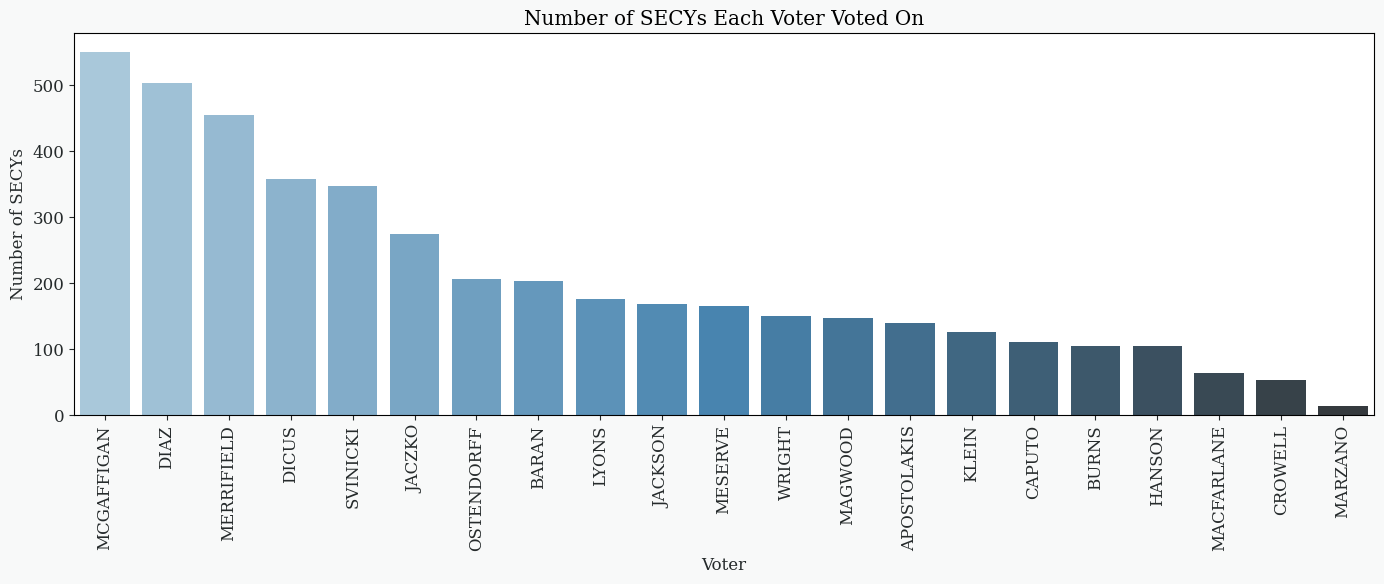

In [83]:
# Histogram: Number of SECYs each voter voted on
voter_counts = merged_with_allterm.groupby('voter')['SECY_number'].nunique().reset_index(name='SECY_count')
voter_counts = voter_counts.sort_values(by='SECY_count', ascending=False)

# Plotting the histogram
plt.figure(figsize=(14, 6))
sns.barplot(x='voter', y='SECY_count', data=voter_counts, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Number of SECYs Each Voter Voted On')
plt.xlabel('Voter')
plt.ylabel('Number of SECYs')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2468644171.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='voter', y='SECY_count', data=voter_counts, palette='Blues_d')


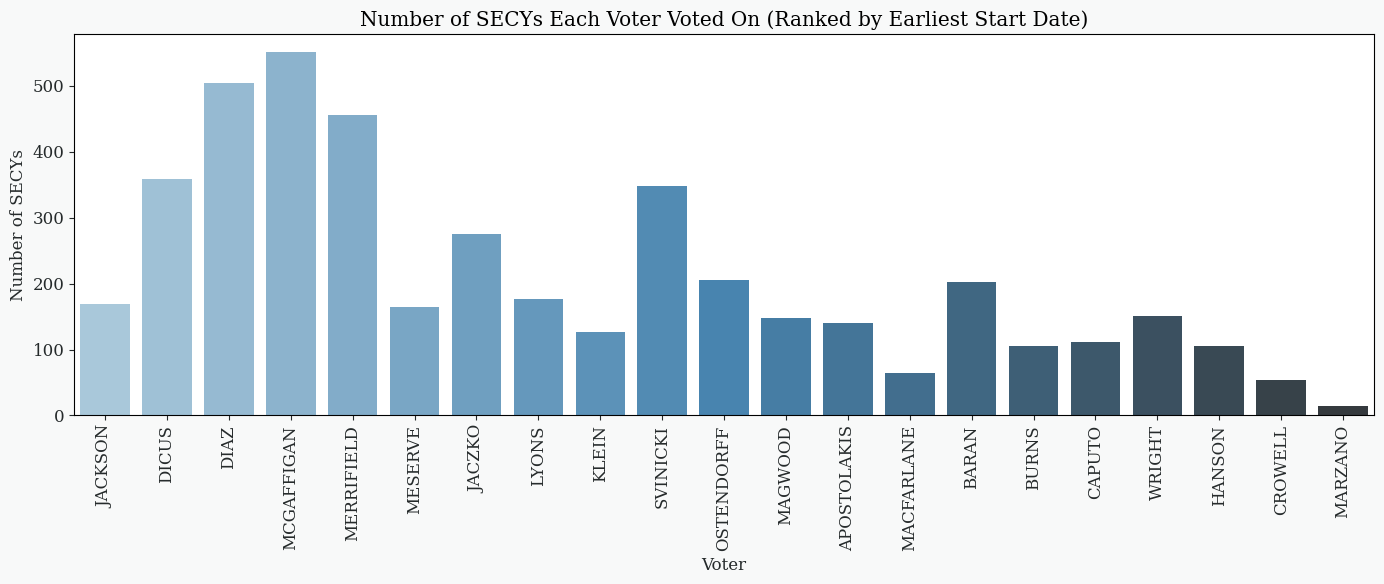

In [84]:
##rank from
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count how many unique SECYs each voter voted on
voter_counts = merged_with_allterm.groupby('voter')['SECY_number'].nunique().reset_index(name='SECY_count')

# Step 2: Get earliest 'Start Date' per voter (from merged commissioner info)
earliest_dates = merged_with_allterm.groupby('voter')['Start Date'].min().reset_index(name='Earliest_Start')

# Step 3: Merge the two
voter_counts = voter_counts.merge(earliest_dates, on='voter', how='left')

# Step 4: Sort by earliest start date (oldest commissioners first)
voter_counts = voter_counts.sort_values(by='Earliest_Start')

# Step 5: Plot
plt.figure(figsize=(14, 6))
sns.barplot(x='voter', y='SECY_count', data=voter_counts, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Number of SECYs Each Voter Voted On (Ranked by Earliest Start Date)')
plt.xlabel('Voter')
plt.ylabel('Number of SECYs')
plt.tight_layout()
plt.show()


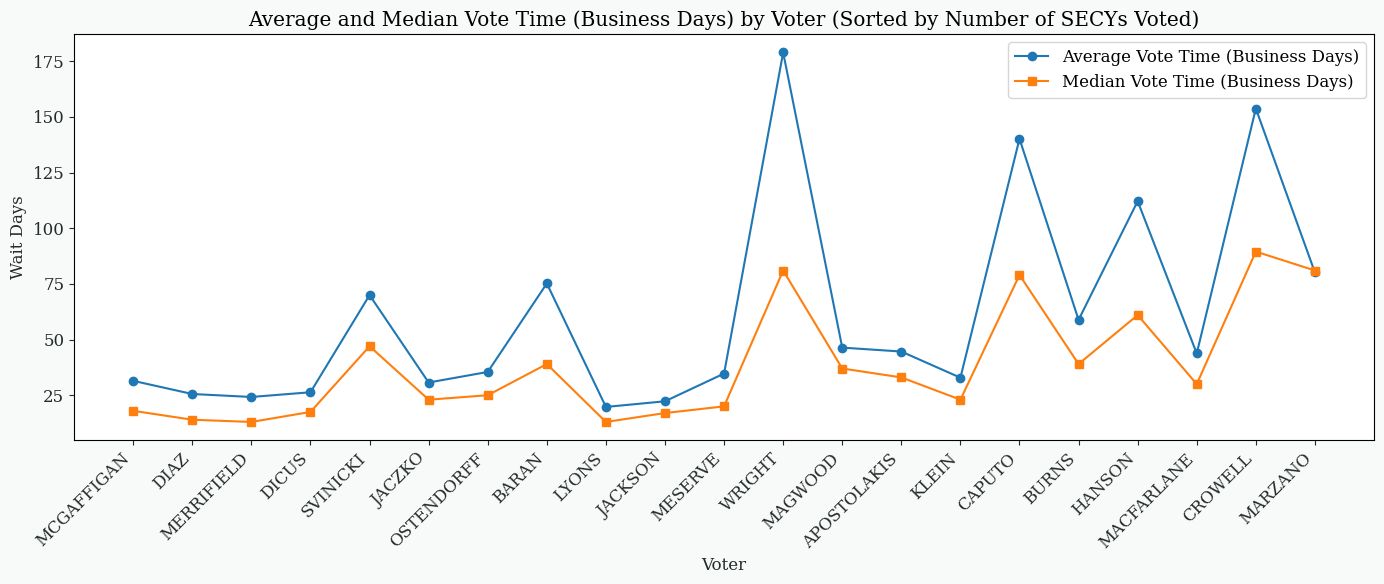

In [85]:
import matplotlib.pyplot as plt

# Group by voter and calculate average, median wait days, and count of SECYs
voter_stats = merged_with_allterm.groupby('voter').agg({
    'Vote_Business_Days': ['mean', 'median'],
    'SECY_number': 'nunique'
}).reset_index()

# Flatten column names
voter_stats.columns = ['voter', 'avg_wait_days', 'median_wait_days', 'secy_count']

# Sort by number of SECYs voted on
voter_stats = voter_stats.sort_values(by='secy_count', ascending=False)

# Plotting the line graph
plt.figure(figsize=(14, 6))
plt.plot(voter_stats['voter'], voter_stats['avg_wait_days'], marker='o', label='Average Vote Time (Business Days)')
plt.plot(voter_stats['voter'], voter_stats['median_wait_days'], marker='s', label='Median Vote Time (Business Days)')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Voter')
plt.ylabel('Wait Days')
plt.title('Average and Median Vote Time (Business Days) by Voter (Sorted by Number of SECYs Voted)')
plt.legend()
plt.tight_layout()
plt.show()


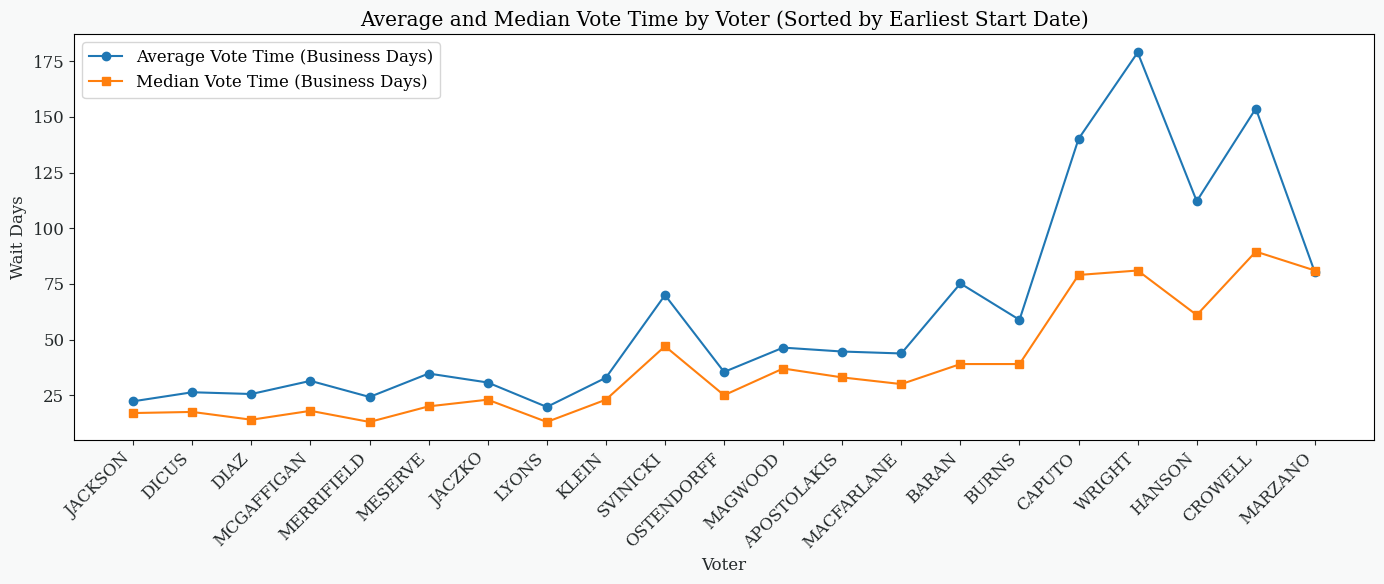

In [86]:
import matplotlib.pyplot as plt

# Step 1: Calculate average, median wait, and SECY count
voter_stats = merged_with_allterm.groupby('voter').agg({
    'Vote_Business_Days': ['mean', 'median'],
    'SECY_number': 'nunique'
}).reset_index()

# Flatten columns
voter_stats.columns = ['voter', 'avg_wait_days', 'median_wait_days', 'secy_count']

# Step 2: Bring in earliest start date per voter (from merged dataset with commissioner info)
earliest_start = merged_with_allterm.groupby('voter')['Start Date'].min().reset_index()
voter_stats = voter_stats.merge(earliest_start, on='voter', how='left')

# Step 3: Sort by earliest start date (ascending)
voter_stats = voter_stats.sort_values(by='Start Date')

# Step 4: Plot line graph
plt.figure(figsize=(14, 6))
plt.plot(voter_stats['voter'], voter_stats['avg_wait_days'], marker='o', label='Average Vote Time (Business Days)')
plt.plot(voter_stats['voter'], voter_stats['median_wait_days'], marker='s', label='Median Vote Time (Business Days)')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Voter')
plt.ylabel('Wait Days')
plt.title('Average and Median Vote Time by Voter (Sorted by Earliest Start Date)')
plt.legend()
plt.tight_layout()
plt.show()


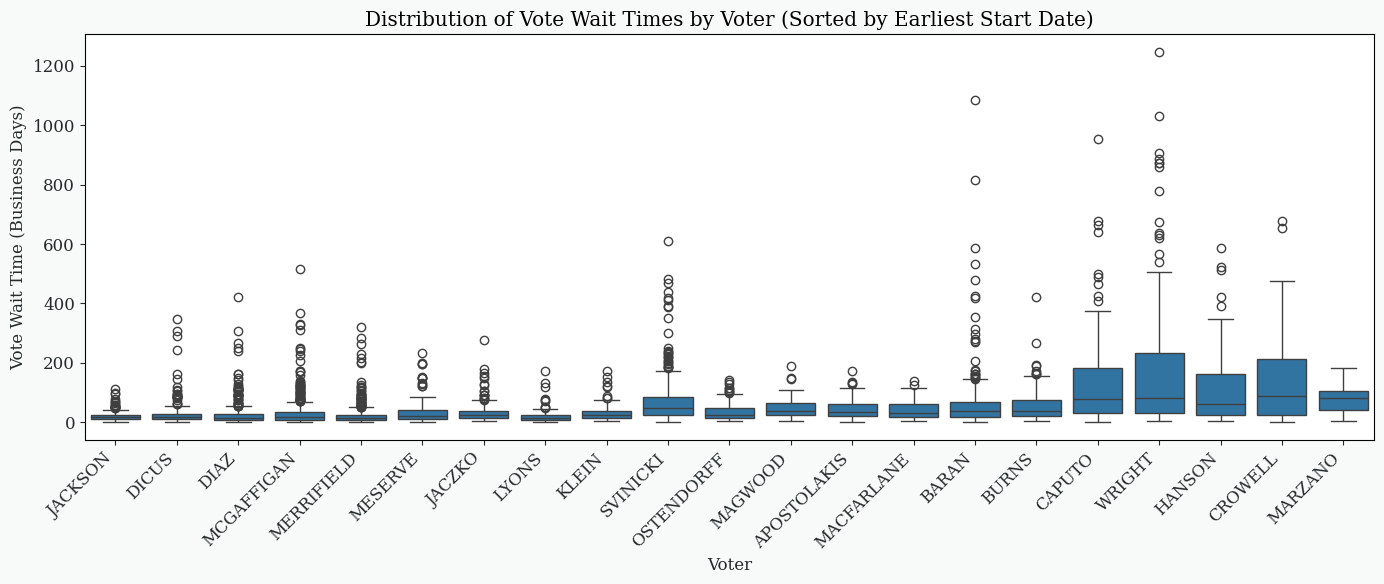

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get earliest start date per voter
earliest_start = merged_with_allterm.groupby('voter')['Start Date'].min().reset_index()
earliest_start = earliest_start.sort_values('Start Date')

# Step 2: Define the sort order
voter_order = earliest_start['voter'].tolist()

# Step 3: Create the box plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=merged_with_allterm, x='voter', y='Vote_Business_Days', order=voter_order)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Voter')
plt.ylabel('Vote Wait Time (Business Days)')
plt.title('Distribution of Vote Wait Times by Voter (Sorted by Earliest Start Date)')
plt.tight_layout()
plt.show()


#figure 6

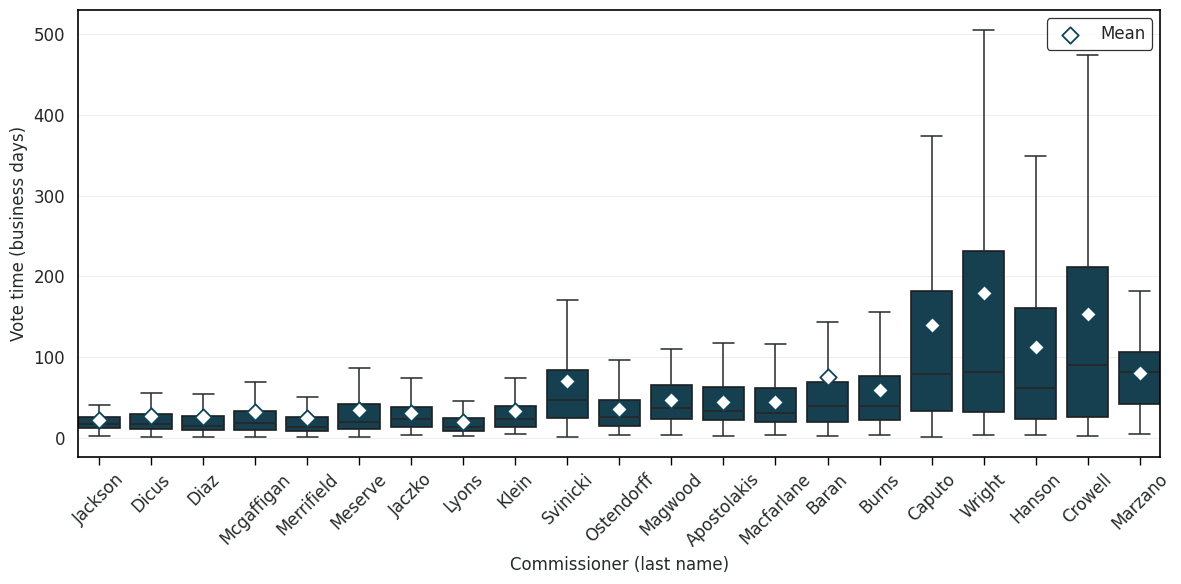

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ---- Brand palette (unchanged) ----
PALETTE = {
    "navy":   "#0D4459",  # primary accent (boxes/means)
    "sky":    "#56A9D5",
    "coal":   "#252A2B",  # outlines / text
    "paper":  "#F8F9F9"
}

# --- Font (Colab-safe Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size']   = 12

sns.set_style("white")

# ========= 1) Order commissioners by earliest start; capitalize names =========
earliest_start = (
    merged_with_allterm
      .assign(voter=merged_with_allterm['voter'].astype(str).str.strip().str.capitalize())
      .groupby('voter', as_index=False)['Start Date'].min()
      .sort_values('Start Date')
)
voter_order = earliest_start['voter'].tolist()

# ========= 2) Prepare data with same capitalization =========
data_plot = merged_with_allterm.copy()
data_plot['voter'] = data_plot['voter'].astype(str).str.strip().str.capitalize()

# Mean wait per voter for overlay (aligned to same order)
mean_wait_by_voter = (
    data_plot.groupby('voter', as_index=False)['Vote_Business_Days']
             .mean()
             .set_index('voter')
             .reindex(voter_order)
             .reset_index()
             .rename(columns={'Vote_Business_Days': 'mean_wait'})
)

# ========= 3) Figure/axes =========
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# ========= 4) Boxplot =========
sns.boxplot(
    data=data_plot,
    x='voter', y='Vote_Business_Days',
    order=voter_order,
    showfliers=False,
    color=PALETTE["navy"],
    linewidth=1.2,
    medianprops=dict(color=PALETTE["coal"], linewidth=1.4),
    whiskerprops=dict(color=PALETTE["coal"], linewidth=1.1),
    capprops=dict(color=PALETTE["coal"], linewidth=1.1),
    ax=ax
)

# Hatching & edges
for patch in ax.artists:
    patch.set_edgecolor(PALETTE["coal"])
    patch.set_facecolor(PALETTE["navy"])
    patch.set_hatch("///")

# ========= 5) Overlay means — white diamond =========
centers = ax.get_xticks()
ax.scatter(
    x=centers,
    y=mean_wait_by_voter['mean_wait'].to_numpy(),
    s=70,
    marker='D',                # diamond
    facecolors="white",
    edgecolors=PALETTE["navy"],
    linewidths=1.3,
    zorder=10,
    label='Mean'
)

# ========= 6) Axes labels, ticks, limits, styling =========
ax.set_xlabel('Commissioner (last name)', color=PALETTE["coal"])
ax.set_ylabel('Vote time (business days)', color=PALETTE["coal"])

# Put tick marks at the same centers; center the rotated labels
ax.set_xticks(centers)
ax.set_xticklabels(voter_order, rotation=45, ha='center', color=PALETTE["coal"])

# Lock x-limits to the first/last box with a small half-width pad
halfw = (ax.artists[0].get_width()/2.0) if ax.artists else 0.4
ax.set_xlim(centers[0] - halfw, centers[-1] + halfw)
ax.margins(x=0)

# Outward tick marks & border
ax.tick_params(axis='x', direction='out', length=6, width=1, color='black', bottom=True, top=False)
ax.tick_params(axis='y', direction='out', length=6, width=1, color='black')

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

# Horizontal grid only
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

# Legend (upper right) with border
leg = ax.legend(frameon=True, loc='upper right')
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(0.9)

plt.tight_layout()
plt.show()


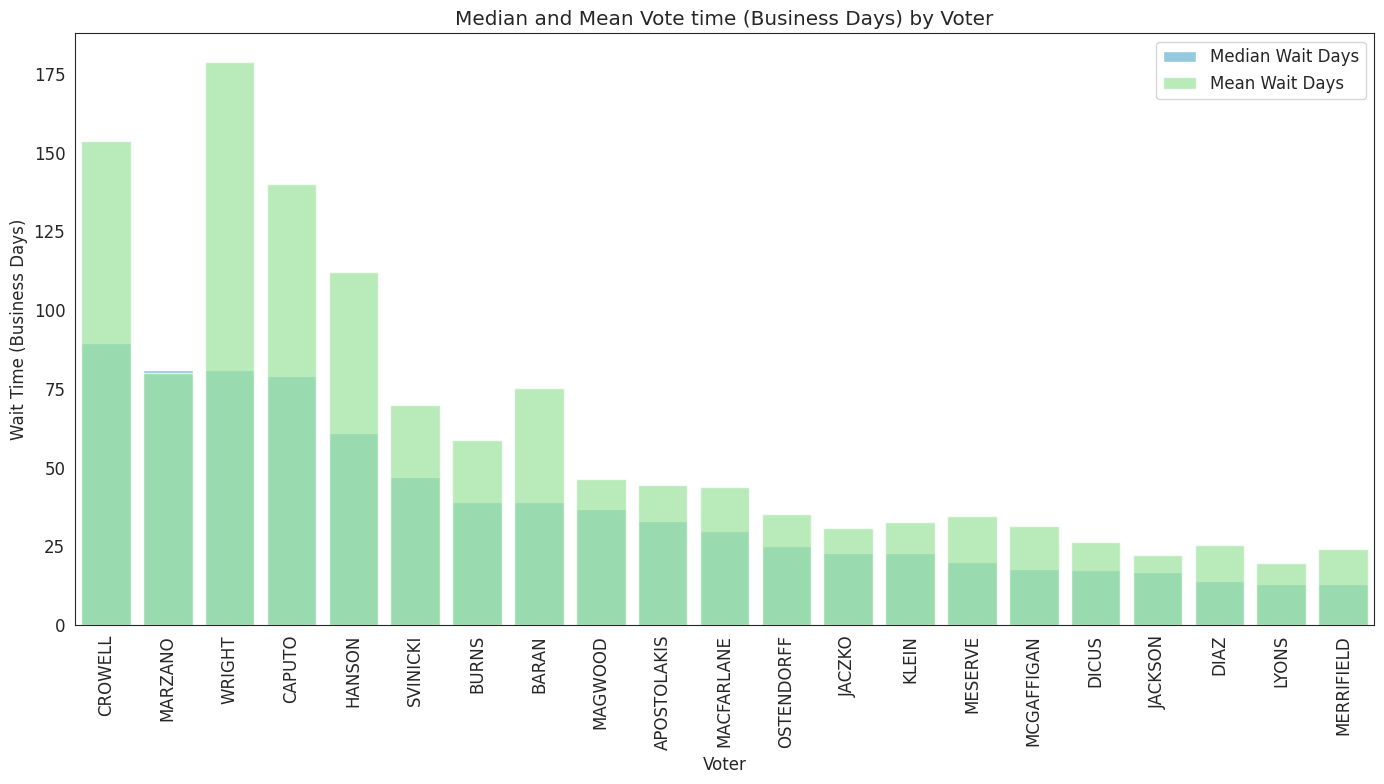

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare summary statistics by voter
voter_stats = merged_with_allterm.groupby('voter').agg(
    median_days=('Vote_Business_Days', 'median'),
    mean_days=('Vote_Business_Days', 'mean'),
    num_secys=('SECY_number', 'nunique')
).reset_index().sort_values(by='median_days', ascending=False)

# Set up the figure size
plt.figure(figsize=(14, 8))

# Plot average and median wait days as bars, number of SECYs as line
sns.barplot(x='voter', y='median_days', data=voter_stats, color='skyblue', label='Median Wait Days')
sns.barplot(x='voter', y='mean_days', data=voter_stats, color='lightgreen', label='Mean Wait Days', alpha=0.7)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Labels and title
plt.title('Median and Mean Vote time (Business Days) by Voter')
plt.xlabel('Voter')
plt.ylabel('Wait Time (Business Days)')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

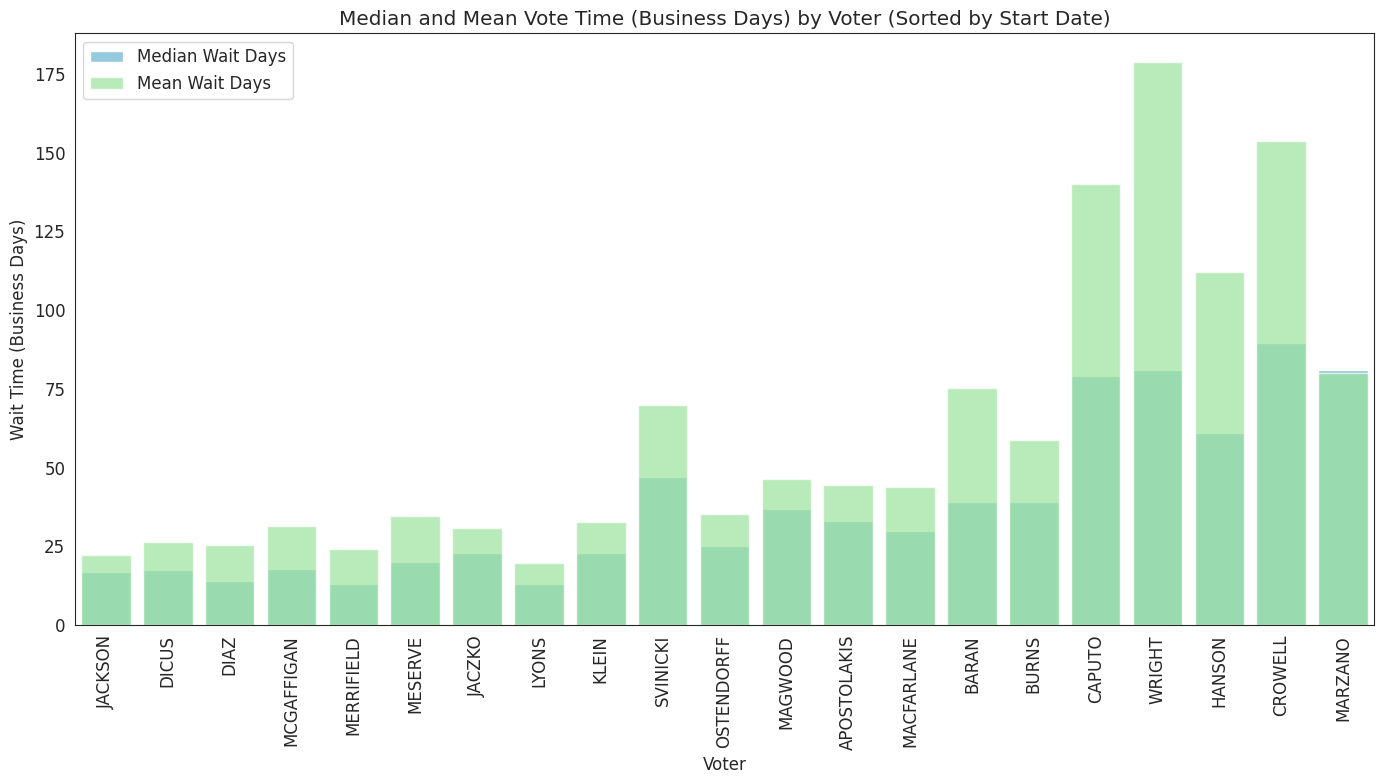

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare summary stats from both_data
voter_stats = merged_with_allterm.groupby('voter').agg(
    median_days=('Vote_Business_Days', 'median'),
    mean_days=('Vote_Business_Days', 'mean'),
    num_secys=('SECY_number', 'nunique')
).reset_index()

# Step 2: Merge with earliest Start Date from commissioner info
earliest_start = merged_with_allterm.groupby('voter')['Start Date'].min().reset_index()
voter_stats = voter_stats.merge(earliest_start, on='voter', how='left')

# Step 3: Sort by earliest Start Date
voter_stats = voter_stats.sort_values(by='Start Date')

# Step 4: Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='voter', y='median_days', data=voter_stats, color='skyblue', label='Median Wait Days')
sns.barplot(x='voter', y='mean_days', data=voter_stats, color='lightgreen', label='Mean Wait Days', alpha=0.7)

plt.xticks(rotation=90)
plt.title('Median and Mean Vote Time (Business Days) by Voter (Sorted by Start Date)')
plt.xlabel('Voter')
plt.ylabel('Wait Time (Business Days)')
plt.legend()
plt.tight_layout()
plt.show()


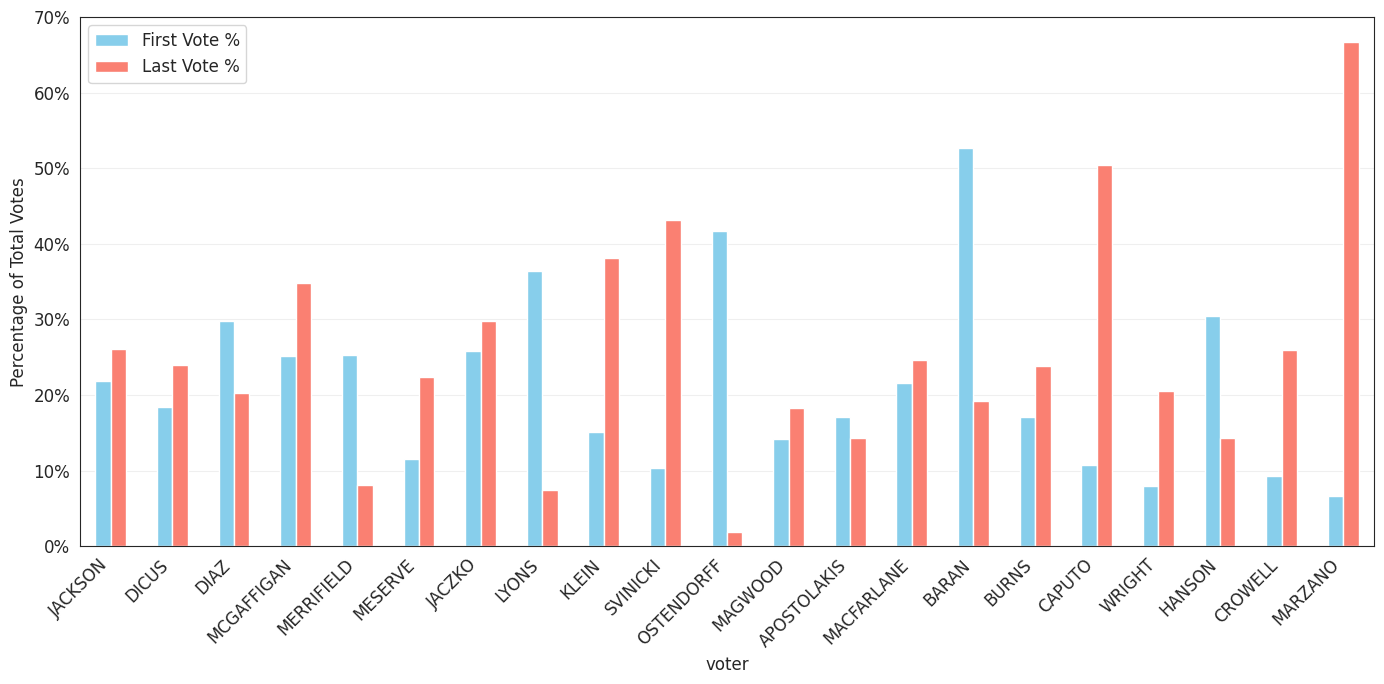

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# ====================================================
# 🚀 Step 1: Rebuild vote_summary from your 'merged' DataFrame
# ====================================================

# Count first and last votes per voter
first_vote = merged_with_allterm[merged_with_allterm['first_vote']].voter.value_counts()
last_vote = merged_with_allterm[merged_with_allterm['last_vote']].voter.value_counts()

vote_summary = pd.DataFrame({
    'First Vote Count': first_vote,
    'Last Vote Count': last_vote
}).fillna(0).astype(int)

# Calculate total votes *across all votes* per voter
vote_summary['Total Votes'] = merged_with_allterm.voter.value_counts()

# Derive percentages relative to total votes
vote_summary['First Vote %'] = vote_summary['First Vote Count'] / vote_summary['Total Votes']
vote_summary['Last Vote %'] = vote_summary['Last Vote Count'] / vote_summary['Total Votes']

# Merge to get earliest commission start date for sorting
earliest = merged_with_allterm.groupby('voter')['Start Date'].min().reset_index()
vote_summary = vote_summary.reset_index().merge(earliest, on='voter', how='left')
vote_summary = vote_summary.sort_values('Start Date').set_index('voter')

# ====================================================
# 🧾 Step 2: Plot the percentages
# ====================================================
fig, ax = plt.subplots(figsize=(14, 7))

vote_summary[['First Vote %', 'Last Vote %']].plot(
    kind='bar',
    ax=ax,
    color=['skyblue', 'salmon']
)

##ax.set_title('First & Last Votes as % of Total Votes (by Commissioner)')
ax.set_ylabel('Percentage of Total Votes')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


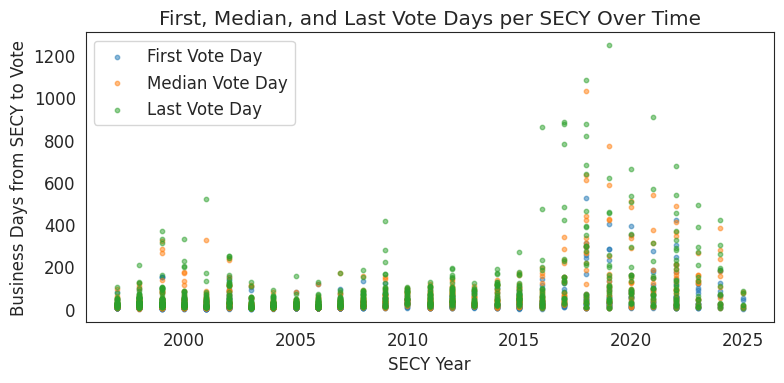

In [92]:
# Group by SECY Number and collect vote days
vote_timing_stats = merged_with_allterm.groupby('SECY_number')['Vote_Business_Days'].agg(
    first_vote_day='min',
    median_vote_day='median',
    last_vote_day='max'
).reset_index()

# Merge back to get SECY Year for plotting
vote_timing_stats = vote_timing_stats.merge(
    merged_with_allterm[['SECY_number', 'SECY Year']].drop_duplicates(),
    on='SECY_number',
    how='left'
)


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# Scatter plot
plt.scatter(vote_timing_stats['SECY Year'], vote_timing_stats['first_vote_day'],
            alpha=0.5, label='First Vote Day', s=10)
plt.scatter(vote_timing_stats['SECY Year'], vote_timing_stats['median_vote_day'],
            alpha=0.5, label='Median Vote Day', s=10)
plt.scatter(vote_timing_stats['SECY Year'], vote_timing_stats['last_vote_day'],
            alpha=0.5, label='Last Vote Day', s=10)

plt.xlabel('SECY Year')
plt.ylabel('Business Days from SECY to Vote')
plt.title('First, Median, and Last Vote Days per SECY Over Time')
plt.legend()
plt.tight_layout()
plt.show()


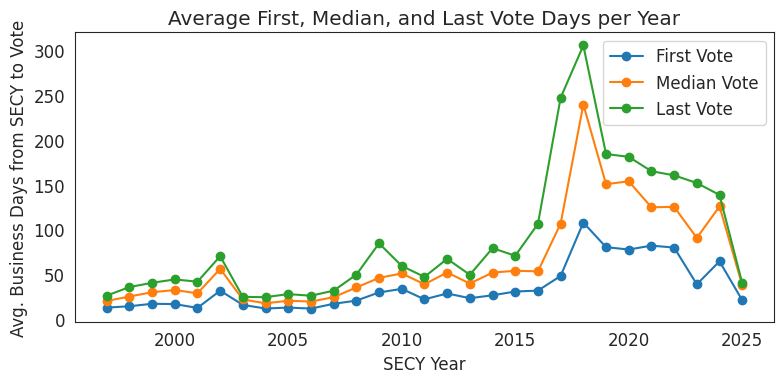

In [93]:
avg_by_year = vote_timing_stats.groupby('SECY Year')[['first_vote_day', 'median_vote_day', 'last_vote_day']].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(avg_by_year['SECY Year'], avg_by_year['first_vote_day'], label='First Vote', marker='o')
plt.plot(avg_by_year['SECY Year'], avg_by_year['median_vote_day'], label='Median Vote', marker='o')
plt.plot(avg_by_year['SECY Year'], avg_by_year['last_vote_day'], label='Last Vote', marker='o')

plt.xlabel('SECY Year')
plt.ylabel('Avg. Business Days from SECY to Vote')
plt.title('Average First, Median, and Last Vote Days per Year')
plt.legend()
plt.tight_layout()
plt.show()


#Figure 5

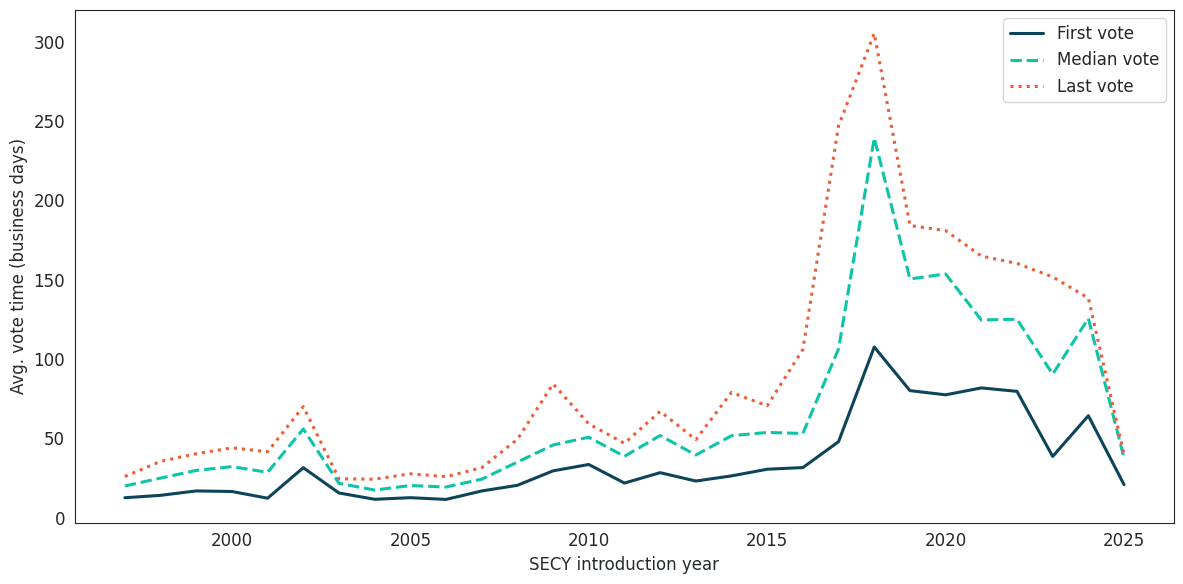

In [94]:
# Brand palette
PALETTE = {
    "navy":   "#0D4459",  # strong primary
    "teal":   "#0DC3A8",  # secondary
    "magenta":"#EE5C36",  # high-contrast accent
    "coal":   "#252A2B"   # axis/text
}

# Group stats
avg_by_year = vote_timing_stats.groupby('SECY Year')[
    ['first_vote_day', 'median_vote_day', 'last_vote_day']
].mean().reset_index()

plt.figure(figsize=(12, 6))

# ✅ Color + linestyle so it remains readable in B/W
plt.plot(avg_by_year['SECY Year'], avg_by_year['first_vote_day'],
         label='First vote',
         linewidth=2.2,
         color=PALETTE["navy"], linestyle='solid')     # solid navy

plt.plot(avg_by_year['SECY Year'], avg_by_year['median_vote_day'],
         label='Median vote',
         linewidth=2.2,
         color=PALETTE["teal"], linestyle='dashed')     # teal dashed

plt.plot(avg_by_year['SECY Year'], avg_by_year['last_vote_day'],
         label='Last vote',
         linewidth=2.2,
         color=PALETTE["magenta"], linestyle='dotted')   # magenta dotted

# Styling
plt.xlabel('SECY introduction year', color=PALETTE["coal"])
plt.ylabel('Avg. vote time (business days)', color=PALETTE["coal"])
# plt.title('Average First, Median, and Last Vote Days per Year')  # optional
plt.legend()
plt.tight_layout()
plt.show()


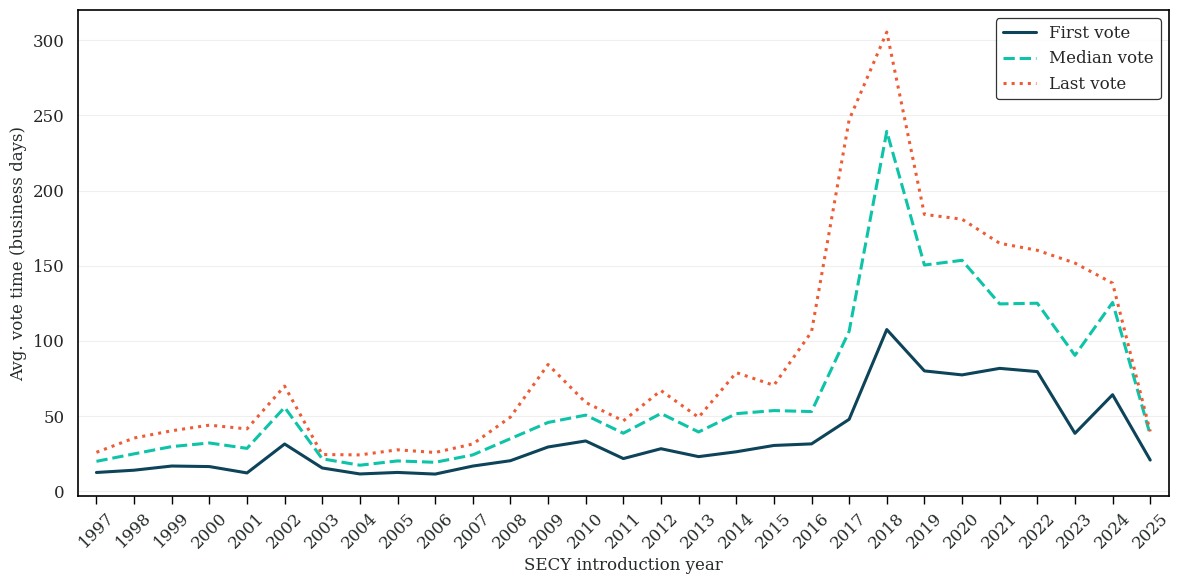

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# --- Font (Colab-safe Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size']   = 12

# Brand palette (as provided)
PALETTE = {
    "navy":   "#0D4459",  # strong primary
    "teal":   "#0DC3A8",  # secondary
    "magenta":"#EE5C36",  # high-contrast accent (note: this hex is orange)
    "coal":   "#252A2B"   # axis/text
}

# Group stats
avg_by_year = (
    vote_timing_stats.groupby('SECY Year')[['first_vote_day','median_vote_day','last_vote_day']]
    .mean()
    .reset_index()
    .sort_values('SECY Year')
)

# Numeric arrays for perfect x alignment
years = avg_by_year['SECY Year'].astype(int).to_numpy()
first  = avg_by_year['first_vote_day'].to_numpy()
median = avg_by_year['median_vote_day'].to_numpy()
last   = avg_by_year['last_vote_day'].to_numpy()

# Figure / axes
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Lines (unchanged styles)
ax.plot(years, first,  label='First vote',  linewidth=2.2, color=PALETTE["navy"],   linestyle='solid')
ax.plot(years, median, label='Median vote', linewidth=2.2, color=PALETTE["teal"],   linestyle='dashed')
ax.plot(years, last,   label='Last vote',   linewidth=2.2, color=PALETTE["magenta"],linestyle='dotted')

# Labels
ax.set_xlabel('SECY introduction year', color=PALETTE["coal"])
ax.set_ylabel('Avg. vote time (business days)', color=PALETTE["coal"])

# X ticks: show ALL years, centered; lock limits to remove offset/padding
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha='center', color=PALETTE["coal"])
ax.set_xlim(years[0]-0.5, years[-1]+0.5)
ax.margins(x=0)

# Tick marks and border (consistent with other figures)
ax.tick_params(axis='x', direction='out', length=6, width=1, color='black', bottom=True, top=False)
ax.tick_params(axis='y', direction='out', length=6, width=1, color='black')
for spine in ax.spines.values():
    spine.set_color('black'); spine.set_linewidth(1.2)

# Only horizontal grid lines
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

# Legend (upper right) with border
leg = ax.legend(frameon=True, loc='upper right')
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(0.9)

plt.tight_layout()
plt.show()


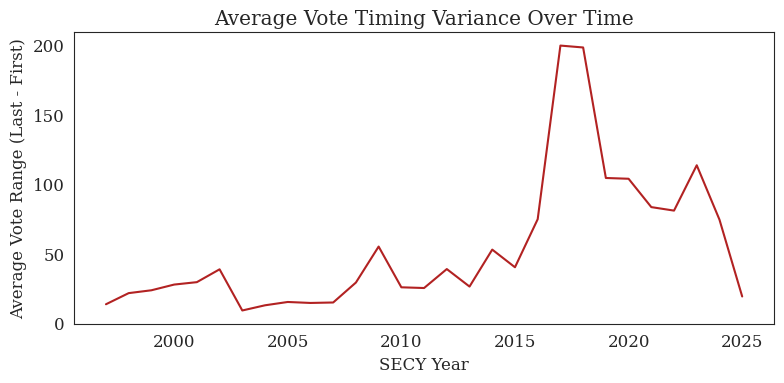

In [96]:
vote_timing_stats['vote_range'] = vote_timing_stats['last_vote_day'] - vote_timing_stats['first_vote_day']
variance_by_year = vote_timing_stats.groupby('SECY Year')['vote_range'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(variance_by_year['SECY Year'], variance_by_year['vote_range'], color='firebrick')
plt.xlabel('SECY Year')
plt.ylabel('Average Vote Range (Last - First)')
plt.title('Average Vote Timing Variance Over Time')
plt.tight_layout()
plt.show()


#figure 4

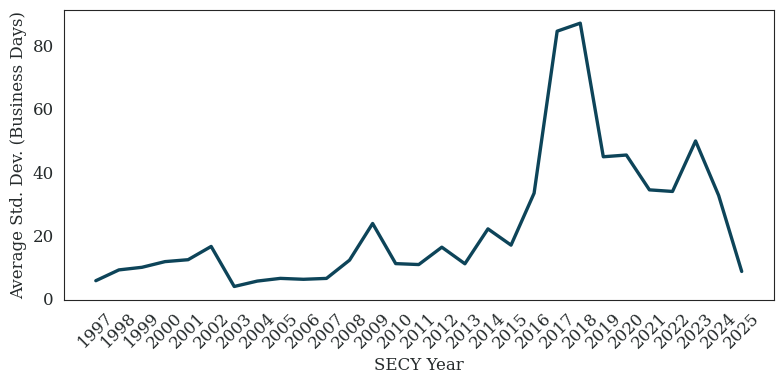

In [97]:
import numpy as np
import re
import matplotlib.pyplot as plt

# ---- BRAND palette ----
PALETTE_NAVY = "#0D4459"  # main line color (CB + print safe)
PALETTE_CHAR = "#252A2B"  # charcoal for axes, labels

df = vote_timing_stats.copy()
year_col = 'SECY Year'

# Detect per-commissioner vote-day columns if available
vote_day_cols = [c for c in df.columns if re.search(r'vote.*day$', c, flags=re.IGNORECASE)]

if vote_day_cols:
    # True std dev across commissioners' vote times per SECY
    df['vote_std'] = df[vote_day_cols].apply(
        lambda r: np.std(r.dropna().to_numpy(), ddof=0),
        axis=1
    )
else:
    # Fallback: use std across first/median/last if individual votes unavailable
    df['vote_std'] = df[['first_vote_day', 'median_vote_day', 'last_vote_day']].apply(
        lambda r: np.std(r.dropna().to_numpy(), ddof=0),
        axis=1
    )

# Average std dev per year
std_by_year = (
    df.groupby(year_col, as_index=False)['vote_std']
      .mean()
      .rename(columns={'vote_std': 'avg_vote_std'})
)

# ---- CLEAN LINE PLOT (no dots, navy line) ----
plt.figure(figsize=(8, 4))
plt.plot(
    std_by_year[year_col],
    std_by_year['avg_vote_std'],
    linewidth=2.4,
    color=PALETTE_NAVY,
    linestyle='solid'   # solid for consistency — stays readable in print/CVD
)

plt.xlabel('SECY Year', color=PALETTE_CHAR)
plt.ylabel('Average Std. Dev. (Business Days)', color=PALETTE_CHAR)
plt.xticks(std_by_year[year_col], rotation=45, color=PALETTE_CHAR)
plt.yticks(color=PALETTE_CHAR)

# Optional: Horizontal guides only (print-friendly, no verticals)
# ax = plt.gca()
# ax.yaxis.grid(True, linestyle="--", alpha=0.4)
# ax.xaxis.grid(False)

plt.tight_layout()
plt.show()


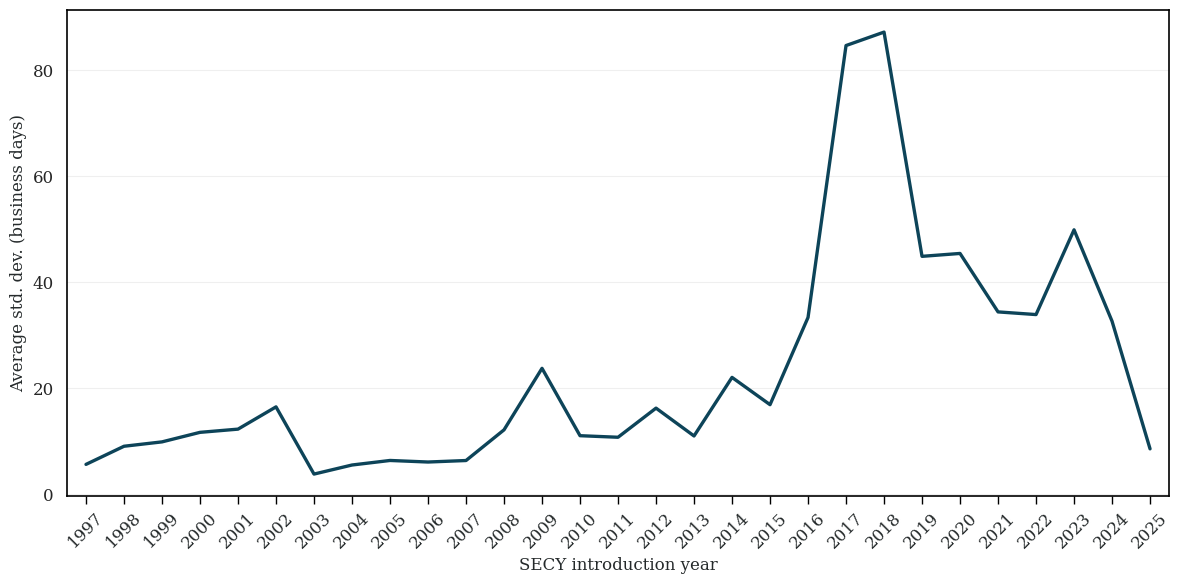

In [98]:
import numpy as np
import re
import matplotlib.pyplot as plt

# --- Fonts (Colab-safe Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 12

# ---- BRAND palette ----
PALETTE_NAVY = "#0D4459"  # main line color (CB + print safe)
PALETTE_CHAR = "#252A2B"  # charcoal for axes, labels

df = vote_timing_stats.copy()
year_col = 'SECY Year'

# Detect per-commissioner vote-day columns if available
vote_day_cols = [c for c in df.columns if re.search(r'vote.*day$', c, flags=re.IGNORECASE)]

if vote_day_cols:
    df['vote_std'] = df[vote_day_cols].apply(
        lambda r: np.std(r.dropna().to_numpy(), ddof=0), axis=1
    )
else:
    df['vote_std'] = df[['first_vote_day', 'median_vote_day', 'last_vote_day']].apply(
        lambda r: np.std(r.dropna().to_numpy(), ddof=0), axis=1
    )

# Average std dev per year
std_by_year = (
    df.groupby(year_col, as_index=False)['vote_std']
      .mean()
      .rename(columns={'vote_std': 'avg_vote_std'})
      .sort_values(year_col)
)

# Numeric arrays for alignment
years = std_by_year[year_col].astype(int).to_numpy()
stds  = std_by_year['avg_vote_std'].to_numpy()

# ---- CLEAN LINE PLOT (no dots, navy line) ----
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

ax.plot(
    years, stds,
    linewidth=2.4,
    color=PALETTE_NAVY,
    linestyle='solid'
)

ax.set_xlabel('SECY introduction year', color=PALETTE_CHAR)
ax.set_ylabel('Average std. dev. (business days)', color=PALETTE_CHAR)

# ---- X ticks: all years, aligned perfectly ----
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha='center', color=PALETTE_CHAR)
ax.set_xlim(years[0] - 0.5, years[-1] + 0.5)
ax.margins(x=0)

# ---- Tick mark styling & border (match other figs) ----
ax.tick_params(axis='x', direction='out', length=6, width=1, color='black', bottom=True, top=False)
ax.tick_params(axis='y', direction='out', length=6, width=1, color='black')

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

# ---- Horizontal grid only ----
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

plt.tight_layout()
plt.show()


In [99]:
from scipy.stats import levene

# Create decade bins
vote_timing_stats['decade'] = (vote_timing_stats['SECY Year'] // 10) * 10

# Group last vote days by decade
grouped = vote_timing_stats.groupby('decade')['last_vote_day'].apply(list)

# Apply Levene’s test
stat, pval = levene(*grouped)

print(f"Levene’s test statistic: {stat:.3f}, p-value: {pval:.3f}")


Levene’s test statistic: 34.662, p-value: 0.000


In [100]:
print(merged_with_allterm.columns)


Index(['SECY_number', 'SRM Description', 'SRM Date', 'SRM Year', 'SRM url',
       'Description', 'SECY Date', 'SECY Year', 'SECY url', 'detailed_type',
       '_merge', 'title', 'voter', 'Vote Date', 'CVR Year', 'valid_vote_date',
       '_merge_CVR', 'availability', 'SRM_Business_Days', 'Vote_Business_Days',
       'Vote_SRM_Business_Days', 'first_vote', 'last_vote', 'Role at CVR',
       'Party Affiliation', 'Start Date', 'End Date', 'Gender', 'Chair at CVR',
       'Cumulative Days Served', 'Term Number', 'Chair at SECY',
       'Chair at SECY Start Date', 'Chair at SECY End Date', 'Last Name',
       'Date', 'matched', 'Role at SECY', 'SECY_before_term',
       'Original_Vote_Business_Days', 'Original_SRM_Business_Days'],
      dtype='object')


In [101]:
import pandas as pd

# Modify the logic to count unique chairs (i.e., role == 'Chair') per SECY
# Filter only rows where the voter role is Chair
chairs_only = merged_with_allterm[merged_with_allterm['Role at CVR'].str.lower() == 'chair']

# Group by SECY and count unique chair names
chair_counts = chairs_only.groupby('SECY_number')['voter'].nunique().reset_index()
chair_counts.columns = ['SECY_number', 'num_chairs']

# Filter SECYs with more than one unique chair
multi_chair_secys = chair_counts[chair_counts['num_chairs'] > 1]

# Merge to get descriptive SECY info
secys_with_multiple_chairs = merged[merged['SECY_number'].isin(multi_chair_secys['SECY_number'].unique())]
secys_with_multiple_chairs

SECY_number                                    SRM Description  \
3364  SECY-23-0091  Petition for Rulemaking on Licensing Safety An...   
3365  SECY-23-0091  Petition for Rulemaking on Licensing Safety An...   
3366  SECY-23-0091  Petition for Rulemaking on Licensing Safety An...   
3367  SECY-23-0091  Petition for Rulemaking on Licensing Safety An...   
3368  SECY-23-0091  Petition for Rulemaking on Licensing Safety An...   
3402  SECY-24-0058  Rulemaking Plan on Drug and Alcohol Testing: T...   
3403  SECY-24-0058  Rulemaking Plan on Drug and Alcohol Testing: T...   
3404  SECY-24-0058  Rulemaking Plan on Drug and Alcohol Testing: T...   
3405  SECY-24-0058  Rulemaking Plan on Drug and Alcohol Testing: T...   
3406  SECY-24-0058  Rulemaking Plan on Drug and Alcohol Testing: T...   
3415  SECY-24-0087  Final Revision to The Policy Statement on Abno...   
3416  SECY-24-0087  Final Revision to The Policy Statement on Abno...   
3417  SECY-24-0087  Final Revision to The Policy Statement on Abno...   
3418  SECY-24-0087  Final Revision to The Policy Statement on Abno...   
3419  SECY-24-0087  Final Revision to The Policy Statement on Abno...   
4317   SECY-99-227             N+1 Resident Inspector Staffing Policy   
4318   SECY-99-227             N+1 Resident Inspector Staffing Policy   
4319   SECY-99-227             N+1 Resident Inspector Staffing Policy   
4320   SECY-99-227             N+1 Resident Inspector Staffing Policy   
4321   SECY-99-227             N+1 Resident Inspector Staffing Policy   

        SRM Date  SRM Year                                            SRM url  \
3364  2025-07-15      2023   https://www.nrc.gov/docs/ML2519/ML25196A456.html   
3365  2025-07-15      2023   https://www.nrc.gov/docs/ML2519/ML25196A456.html   
3366  2025-07-15      2023   https://www.nrc.gov/docs/ML2519/ML25196A456.html   
3367  2025-07-15      2023   https://www.nrc.gov/docs/ML2519/ML25196A456.html   
3368  2025-07-15      2023   https://www.nrc.gov/docs/ML2519/ML25196A456.html   
3402  2025-05-19      2024    https://www.nrc.gov/docs/ML2513/ML25136A330.pdf   
3403  2025-05-19      2024    https://www.nrc.gov/docs/ML2513/ML25136A330.pdf   
3404  2025-05-19      2024    https://www.nrc.gov/docs/ML2513/ML25136A330.pdf   
3405  2025-05-19      2024    https://www.nrc.gov/docs/ML2513/ML25136A330.pdf   
3406  2025-05-19      2024    https://www.nrc.gov/docs/ML2513/ML25136A330.pdf   
3415  2025-04-22      2024   https://www.nrc.gov/docs/ML2511/ML25112A207.html   
3416  2025-04-22      2024   https://www.nrc.gov/docs/ML2511/ML25112A207.html   
3417  2025-04-22      2024   https://www.nrc.gov/docs/ML2511/ML25112A207.html   
3418  2025-04-22      2024   https://www.nrc.gov/docs/ML2511/ML25112A207.html   
3419  2025-04-22      2024   https://www.nrc.gov/docs/ML2511/ML25112A207.html   
4317  2000-01-11      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4318  2000-01-11      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4319  2000-01-11      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4320  2000-01-11      1999  https://www.nrc.gov/sites/default/files/doc_li...   
4321  2000-01-11      1999  https://www.nrc.gov/sites/default/files/doc_li...   

                                            Description   SECY Date  \
3364  Petition for Rulemaking on Licensing Safety An...  2023-10-30   
3365  Petition for Rulemaking on Licensing Safety An...  2023-10-30   
3366  Petition for Rulemaking on Licensing Safety An...  2023-10-30   
3367  Petition for Rulemaking on Licensing Safety An...  2023-10-30   
3368  Petition for Rulemaking on Licensing Safety An...  2023-10-30   
3402  Rulemaking Plan on Drug and Alcohol Testing: T...  2024-07-09   
3403  Rulemaking Plan on Drug and Alcohol Testing: T...  2024-07-09   
3404  Rulemaking Plan on Drug and Alcohol Testing: T...  2024-07-09   
3405  Rulemaking Plan on Drug and Alcohol Testing: T...  2024-07-09   
3406  Rulemaking Plan on Drug and Alcohol Testing: T...  2024

In [102]:
# All unique SECYs
all_secys = set(merged_with_allterm['SECY_number'].unique())

# SECYs with at least one chair vote
chair_secys = set(chairs_only['SECY_number'].unique())

# SECYs without chair votes
no_chair_secys = all_secys - chair_secys

print(f"SECYs with no Chair votes: {len(no_chair_secys)}")
print(f"SECYs with Chair votes: {len(chair_secys)}")


SECYs with no Chair votes: 27
SECYs with Chair votes: 1021


In [103]:
no_chair_secys

{'SECY-02-0077',
 'SECY-02-0175',
 'SECY-03-0114',
 'SECY-06-0036',
 'SECY-06-0053',
 'SECY-09-0042',
 'SECY-14-0077',
 'SECY-14-0087',
 'SECY-15-0065',
 'SECY-16-0056',
 'SECY-16-0115',
 'SECY-17-0099',
 'SECY-18-0058',
 'SECY-18-0060',
 'SECY-20-0068',
 'SECY-20-0070',
 'SECY-20-0111',
 'SECY-22-0083',
 'SECY-23-0053',
 'SECY-24-0046',
 'SECY-99-006',
 'SECY-99-036',
 'SECY-99-070',
 'SECY-99-135',
 'SECY-99-146',
 'SECY-99-147',
 'SECY-99-279'}

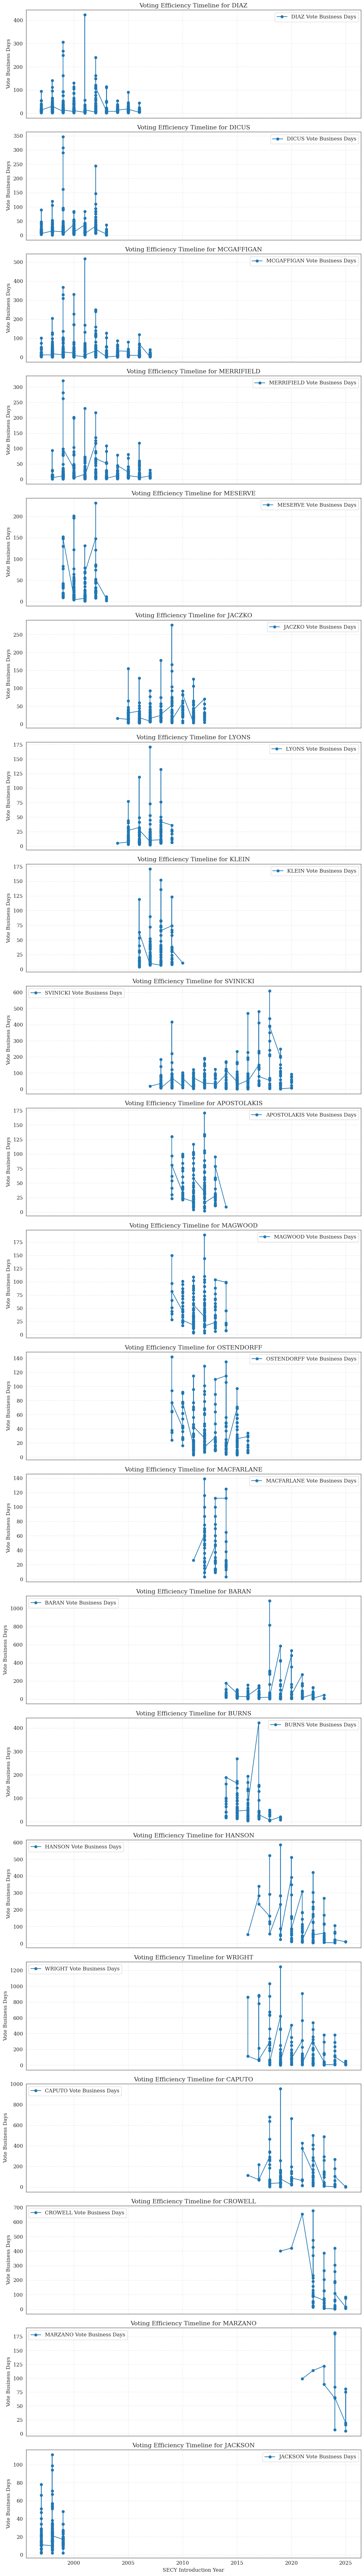

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for valid Vote_Business_Days and last votes
df_plot = merged_with_allterm[(~merged_with_allterm['Vote_Business_Days'].isna())].copy()

# Ensure SECY Year is numeric
df_plot['SECY Year'] = pd.to_numeric(df_plot['SECY Year'], errors='coerce')

# List of unique commissioners
commissioners = df_plot['voter'].unique()

# Plot each commissioner in a separate subplot
num_comm = len(commissioners)
fig, axes = plt.subplots(num_comm, 1, figsize=(12, 4*num_comm), sharex=True)

if num_comm == 1:
    axes = [axes]  # ensure iterable even for 1 commissioner

for ax, comm in zip(axes, commissioners):
    comm_data = df_plot[df_plot['voter'] == comm].sort_values('SECY Year')

    ax.plot(comm_data['SECY Year'], comm_data['Vote_Business_Days'],
            marker='o', linestyle='-', label=f'{comm} Vote Business Days')


    ax.set_title(f'Voting Efficiency Timeline for {comm}', fontsize=14)
    ax.set_ylabel('Vote Business Days', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()

axes[-1].set_xlabel('SECY Introduction Year', fontsize=12)
plt.tight_layout()
plt.show()


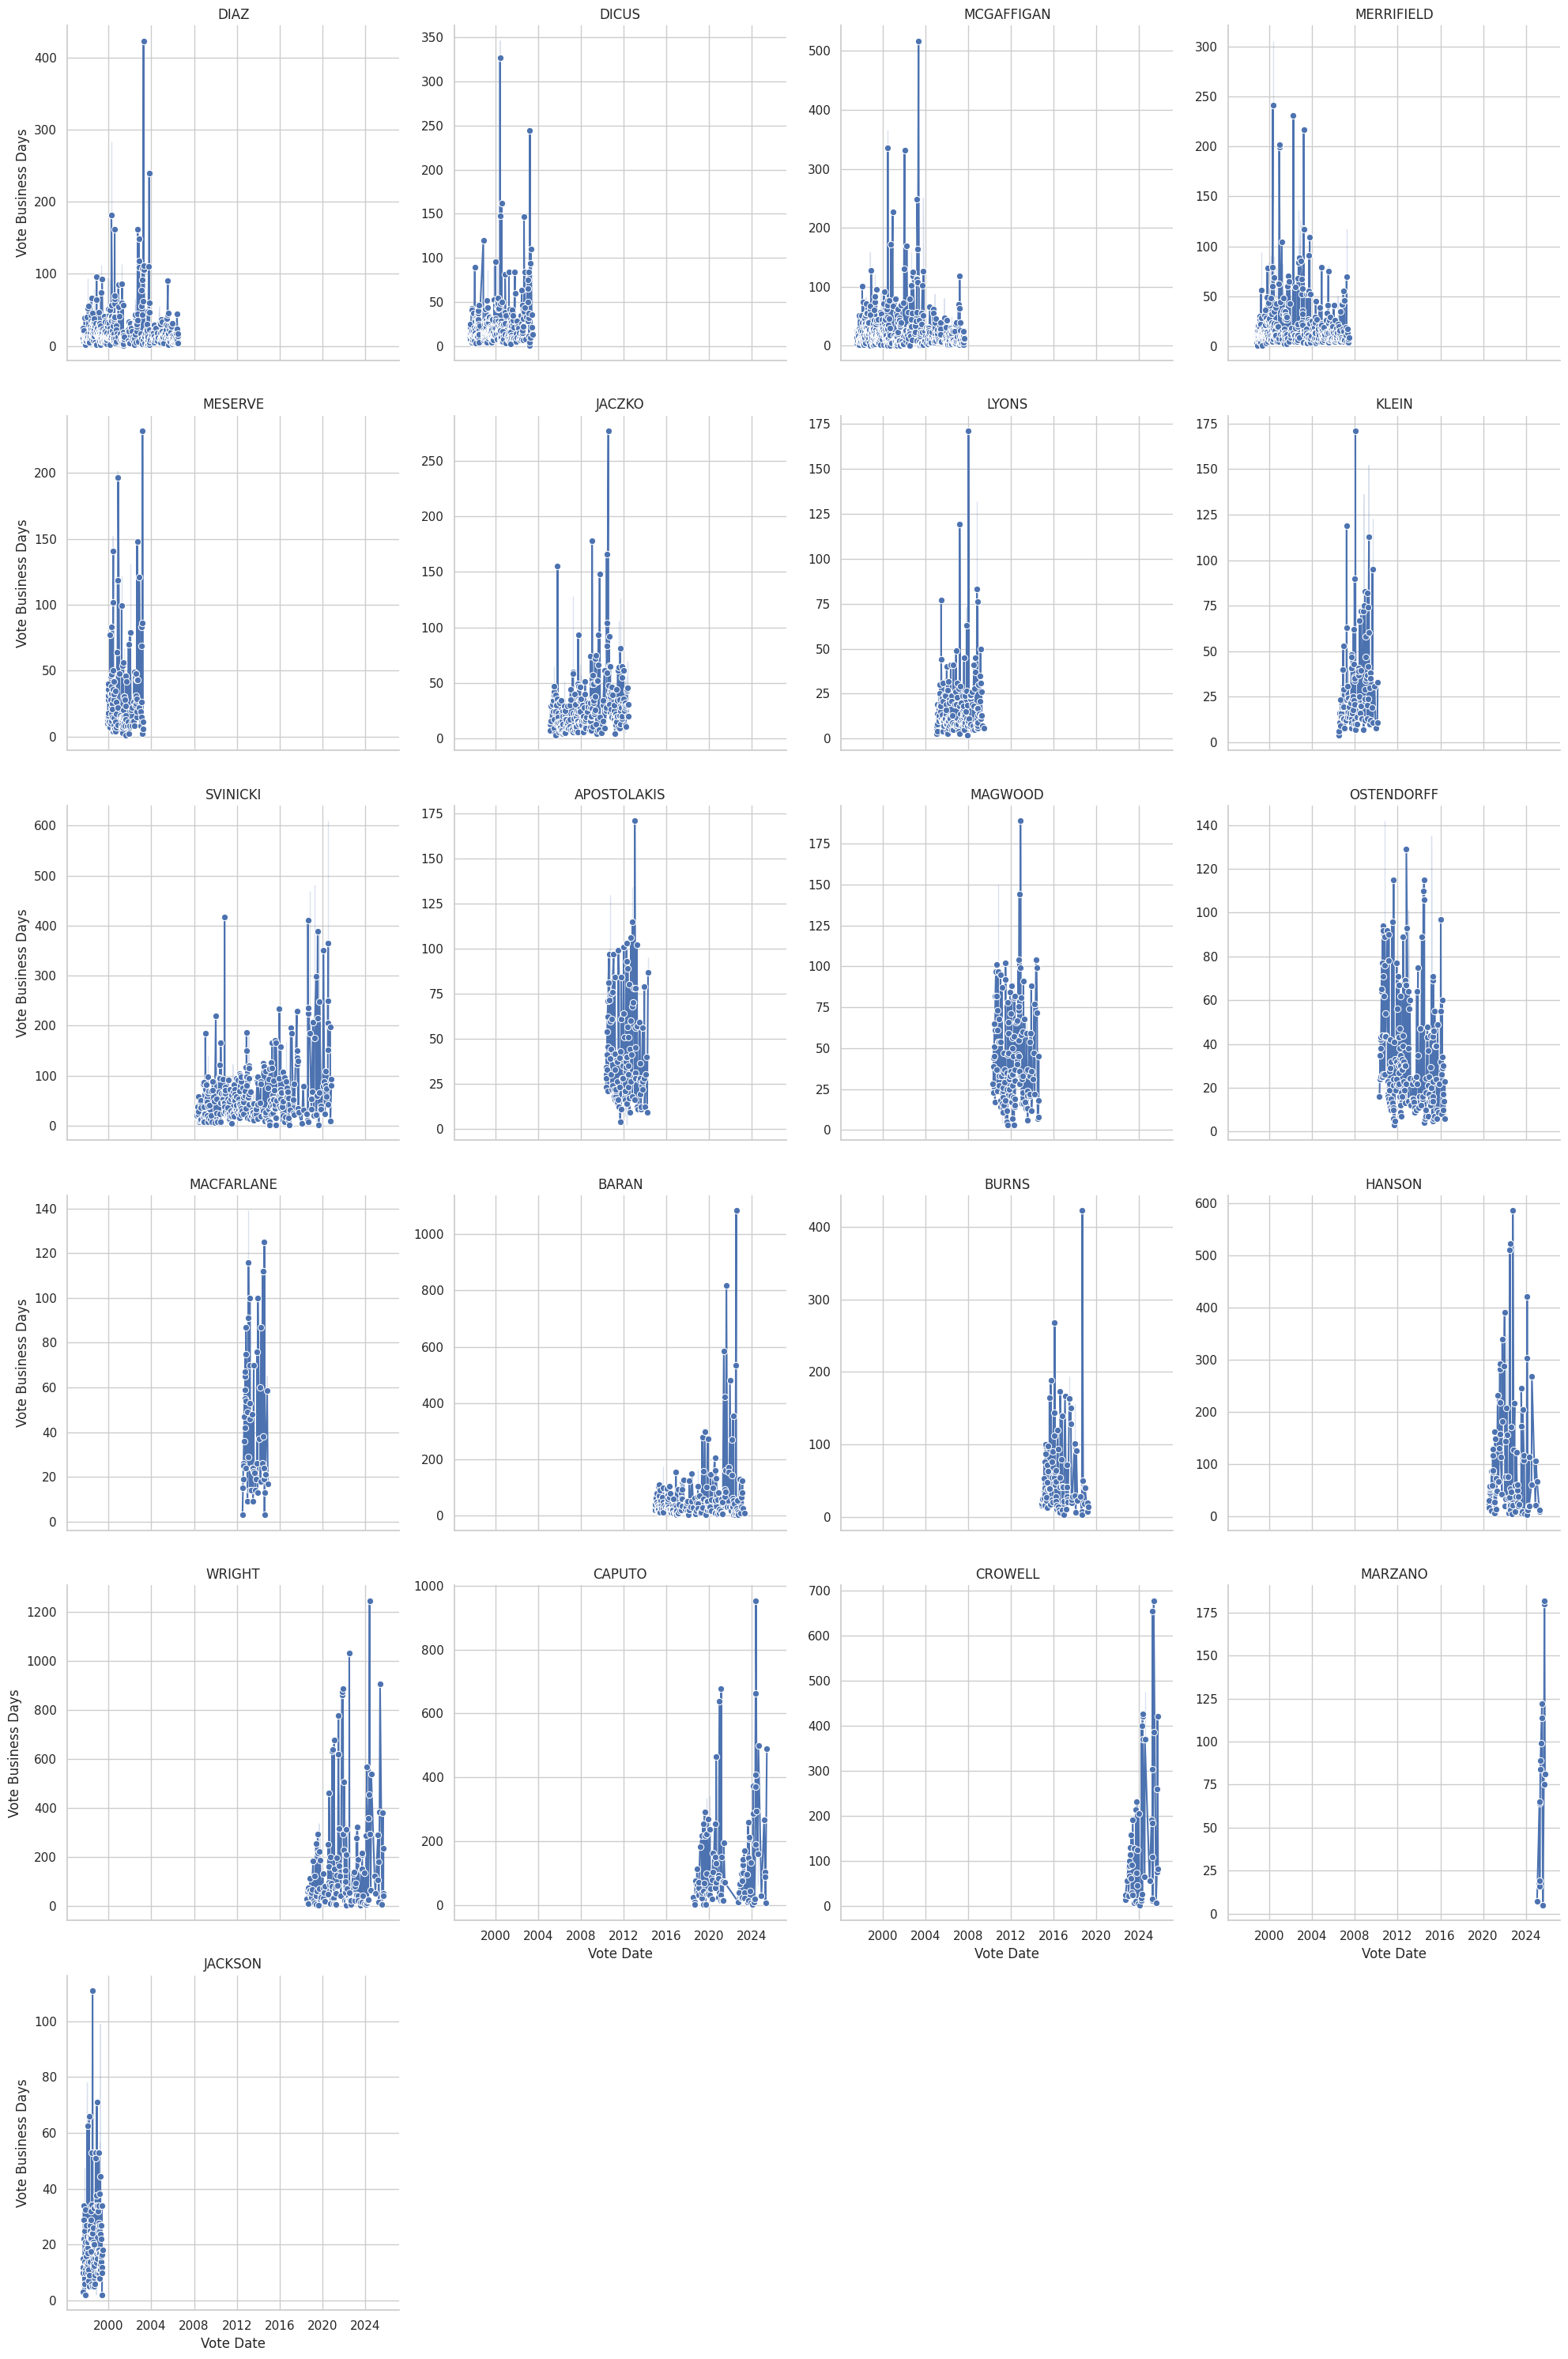

In [105]:
import seaborn as sns

sns.set(style="whitegrid")
g = sns.relplot(
    data=df_plot,
    x="Vote Date", y="Vote_Business_Days",
    col="voter", col_wrap=4,  # wrap into 4 columns per row
    kind="line", marker="o", facet_kws={'sharey': False, 'sharex': True}
)
g.set_titles("{col_name}")
g.set_axis_labels("Vote Date", "Vote Business Days")


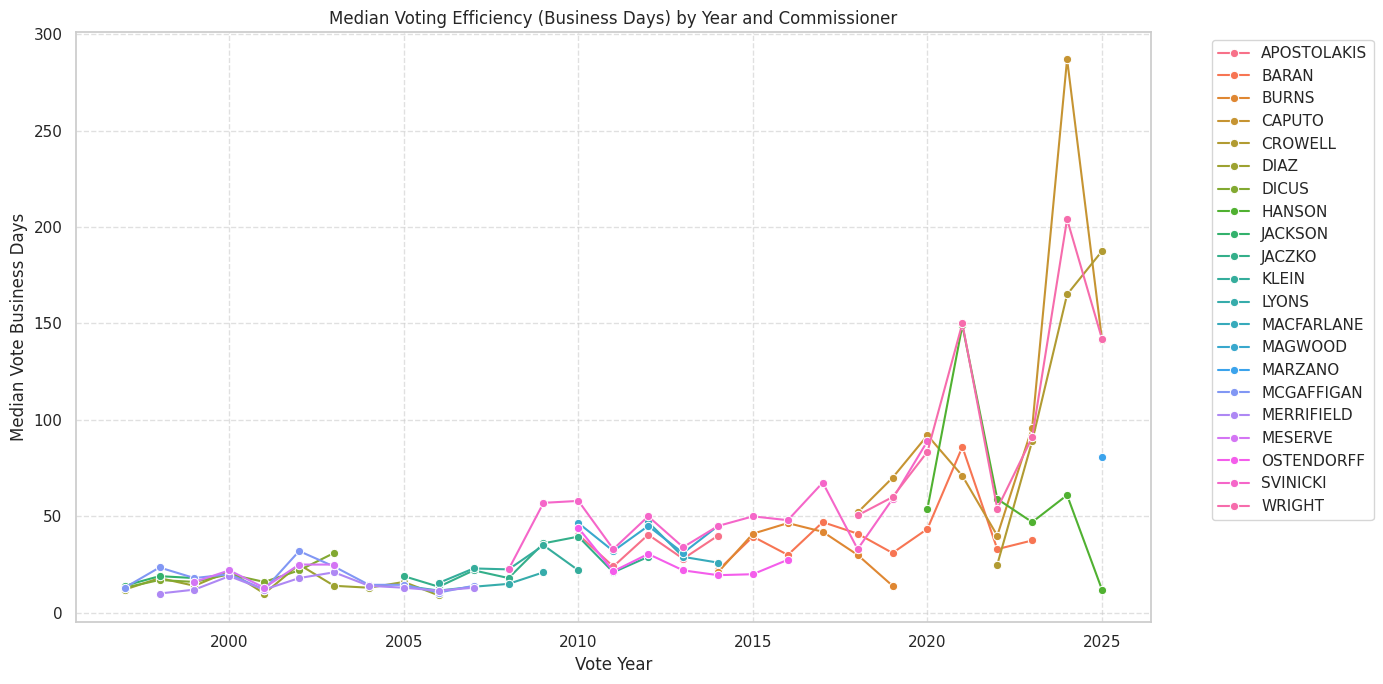

In [106]:
import seaborn as sns

# Ensure Vote Date is datetime
df_plot['Vote Date'] = pd.to_datetime(df_plot['Vote Date'], errors='coerce')
df_plot['Year'] = df_plot['Vote Date'].dt.year

# Compute median by commissioner-year
summary = (
    df_plot.groupby(['voter', 'Year'])['Vote_Business_Days']
    .median()
    .reset_index()
)

plt.figure(figsize=(14, 7))
sns.lineplot(data=summary, x='Year', y='Vote_Business_Days', hue='voter', marker='o')
plt.title("Median Voting Efficiency (Business Days) by Year and Commissioner")
plt.ylabel("Median Vote Business Days")
plt.xlabel("Vote Year")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


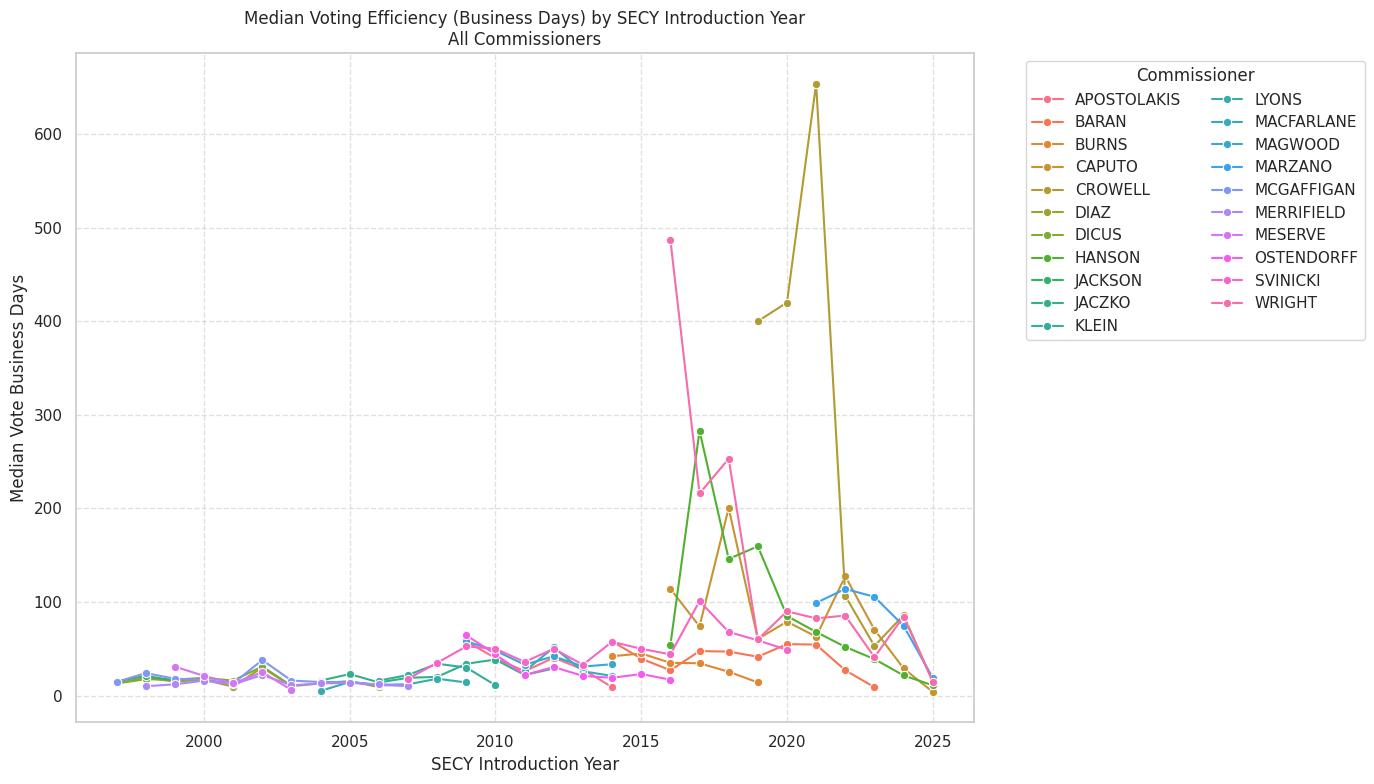

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure SECY Year is numeric
df_plot['SECY Year'] = pd.to_numeric(df_plot['SECY Year'], errors='coerce')

# Compute median by commissioner–SECY Year
summary = (
    df_plot.groupby(['voter', 'SECY Year'])['Vote_Business_Days']
    .median()
    .reset_index()
)

# Plot for all commissioners
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=summary,
    x='SECY Year', y='Vote_Business_Days',
    hue='voter', marker='o'
)
plt.title("Median Voting Efficiency (Business Days) by SECY Introduction Year\nAll Commissioners")
plt.ylabel("Median Vote Business Days")
plt.xlabel("SECY Introduction Year")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Commissioner", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()


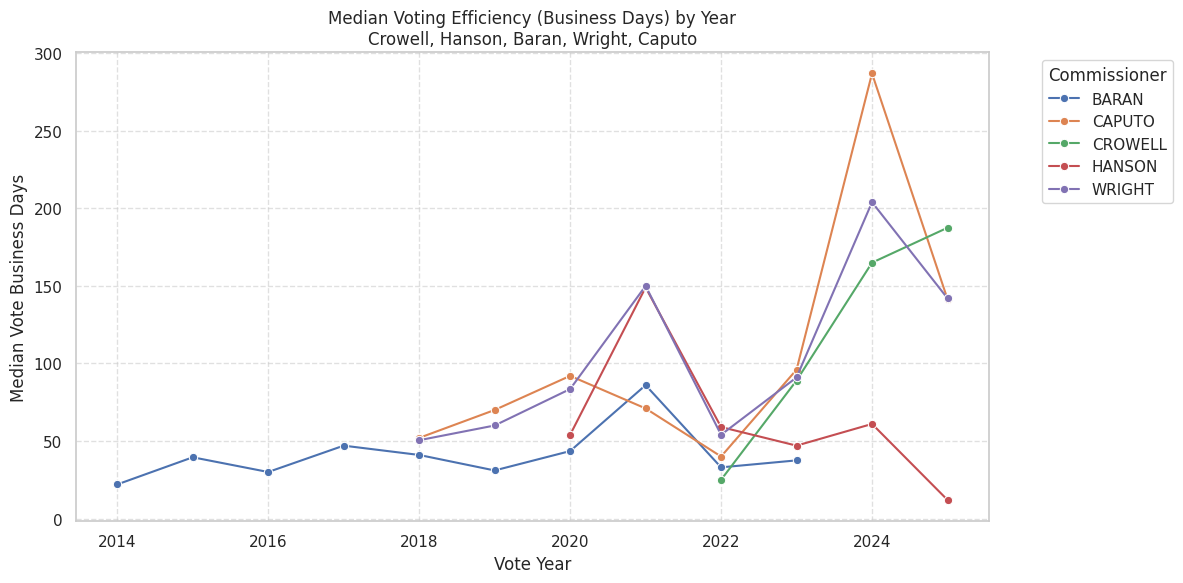

In [108]:
import seaborn as sns

# Ensure Vote Date is datetime
df_plot['Vote Date'] = pd.to_datetime(df_plot['Vote Date'], errors='coerce')
df_plot['Year'] = df_plot['Vote Date'].dt.year

# Compute median by commissioner-year
summary = (
    df_plot.groupby(['voter', 'Year'])['Vote_Business_Days']
    .median()
    .reset_index()
)

# Filter only the commissioners of interest
selected_commissioners = ["CROWELL", "HANSON", "BARAN", "WRIGHT", "CAPUTO"]
summary_filtered = summary[summary['voter'].str.upper().isin(selected_commissioners)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=summary_filtered,
    x='Year', y='Vote_Business_Days',
    hue='voter', marker='o'
)
plt.title("Median Voting Efficiency (Business Days) by Year\nCrowell, Hanson, Baran, Wright, Caputo")
plt.ylabel("Median Vote Business Days")
plt.xlabel("Vote Year")
plt.grid(True, linestyle="--", alpha=0.6)

plt.legend(title="Commissioner", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


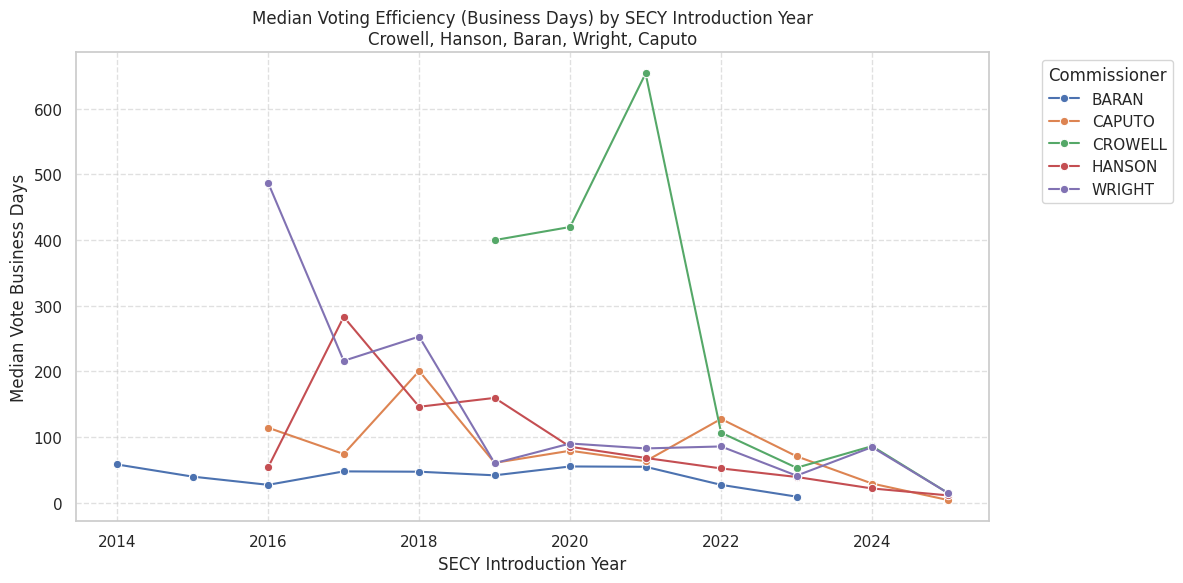

In [109]:
import seaborn as sns

# Make sure SECY Year is numeric
df_plot['SECY Year'] = pd.to_numeric(df_plot['SECY Year'], errors='coerce')

# Compute median by commissioner–SECY Year
summary = (
    df_plot.groupby(['voter', 'SECY Year'])['Vote_Business_Days']
    .median()
    .reset_index()
)

# Filter only the commissioners of interest
selected_commissioners = ["CROWELL", "HANSON", "BARAN", "WRIGHT", "CAPUTO"]
summary_filtered = summary[summary['voter'].str.upper().isin(selected_commissioners)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=summary_filtered,
    x='SECY Year', y='Vote_Business_Days',
    hue='voter', marker='o'
)
plt.title("Median Voting Efficiency (Business Days) by SECY Introduction Year\nCrowell, Hanson, Baran, Wright, Caputo")
plt.ylabel("Median Vote Business Days")
plt.xlabel("SECY Introduction Year")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Commissioner", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [110]:
# Filter for CAPUTO votes >100 business days
caputo_long = df_plot[
    (df_plot['voter'].str.upper() == "CAPUTO") &
    (df_plot['Vote_Business_Days'] > 500) &
    (df_plot['Vote_Business_Days'] != df_plot['Original_Vote_Business_Days'])
]

# Keep only the columns you care about
cols = [
    'SECY_number',
    'voter',
    'SECY Date',
    'Vote Date',
    'Start Date',
    'End Date',
    'Vote_Business_Days',
    'Original_Vote_Business_Days'
]

caputo_long_display = caputo_long[cols].sort_values('Vote_Business_Days')

# Show the records
caputo_long_display


SECY_number   voter  SECY Date  Vote Date Start Date   End Date  \
2864  SECY-18-0022  CAPUTO 2018-02-14 2020-12-14 2018-05-29 2021-06-30   
3098  SECY-20-0070  CAPUTO 2020-07-30 2024-05-03 2022-08-09 2025-08-01   
2857  SECY-18-0005  CAPUTO 2018-01-11 2021-02-11 2018-05-29 2021-06-30   
2988  SECY-19-0062  CAPUTO 2019-06-17 2024-05-15 2022-08-09 2025-08-01   

      Vote_Business_Days  Original_Vote_Business_Days  
2864               639.0                        711.0  
3098               663.0                        940.0  
2857               679.0                        774.0  
2988               953.0                       1230.0

In [111]:
# Make sure SECY Year is numeric
df_plot['SECY Year'] = pd.to_numeric(df_plot['SECY Year'], errors='coerce')

# Compute median by commissioner–SECY Year
summary = (
    df_plot.groupby(['voter', 'SECY Year'])['Vote_Business_Days']
    .median()
    .reset_index()
)

# Filter only the commissioners of interest
selected_commissioners = ["CAPUTO"]
summary_filtered = summary[summary['voter'].str.upper().isin(selected_commissioners)]

# Sort for readability
summary_filtered = summary_filtered.sort_values(['voter', 'SECY Year'])

summary_filtered

voter  SECY Year  Vote_Business_Days
22  CAPUTO       2016               114.0
23  CAPUTO       2017                74.0
24  CAPUTO       2018               200.5
25  CAPUTO       2019                60.5
26  CAPUTO       2020                79.0
27  CAPUTO       2021                63.0
28  CAPUTO       2022               127.5
29  CAPUTO       2023                70.5
30  CAPUTO       2024                29.0
31  CAPUTO       2025                 4.0

In [112]:
# Make sure SECY Year is numeric
df_plot['Vote Date'] = pd.to_datetime(df_plot['Vote Date'], errors='coerce')
df_plot['Year'] = df_plot['Vote Date'].dt.year
# Compute median by commissioner–SECY Year
summary = (
    df_plot.groupby(['voter', 'Year'])['Vote_Business_Days']
    .median()
    .reset_index()
)

# Filter only the commissioners of interest
selected_commissioners = ["CAPUTO"]
summary_filtered = summary[summary['voter'].str.upper().isin(selected_commissioners)]

# Sort for readability
summary_filtered = summary_filtered.sort_values(['voter', 'Year'])

summary_filtered

voter  Year  Vote_Business_Days
21  CAPUTO  2018                52.0
22  CAPUTO  2019                70.0
23  CAPUTO  2020                92.0
24  CAPUTO  2021                71.0
25  CAPUTO  2022                40.0
26  CAPUTO  2023                96.0
27  CAPUTO  2024               287.0
28  CAPUTO  2025               141.5

#Figure 7

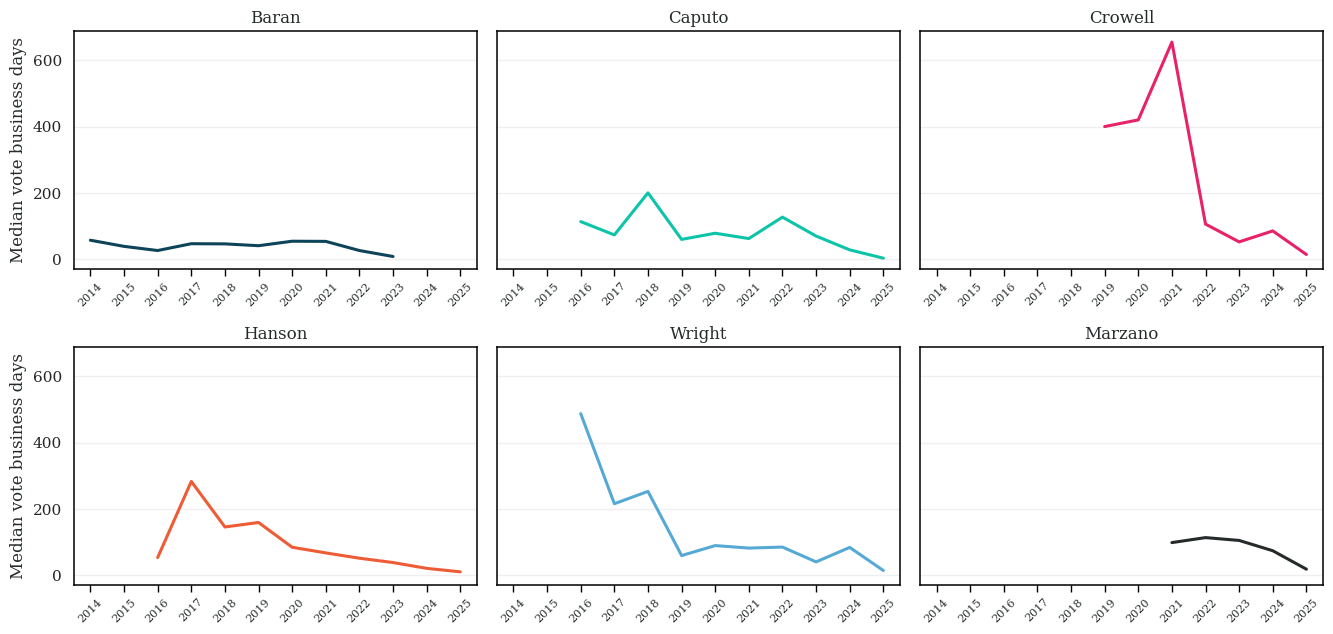

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Locked brand palette
# -----------------------------
PALETTE = {
    "NAVY":   "#0D4459",
    "TEAL":   "#0DC3A8",
    "SKY":    "#56A9D5",
    "ORANGE": "#EE5C36",
    "MAGENTA":"#E82269",
    "COAL":   "#252A2B",
    "PAPER":  "#F8F9F9",
}

# Fixed commissioner color mapping (consistent across the paper)
commissioner_colors = {
    "Baran":   PALETTE["NAVY"],
    "Caputo":  PALETTE["TEAL"],
    "Crowell": PALETTE["MAGENTA"],
    "Hanson":  PALETTE["ORANGE"],
    "Wright":  PALETTE["SKY"],
    "Marzano": PALETTE["COAL"],
}

# --- Font (Colab-safe Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size']   = 12

# -----------------------------
# Prep data
# -----------------------------
df = df_plot.copy()
df['SECY Year'] = pd.to_numeric(df['SECY Year'], errors='coerce')
df['voter'] = df['voter'].astype(str).str.strip().str.capitalize()

# Median by commissioner-year
summary = (
    df.groupby(['voter', 'SECY Year'])['Vote_Business_Days']
      .median()
      .reset_index()
)

# Commissioners to show (order locked)
selected_commissioners = ["Baran", "Caputo", "Crowell", "Hanson", "Wright", "Marzano"]
summary = summary[summary['voter'].isin(selected_commissioners)]

# Unified year axis
years_full = np.arange(2014, 2026)

# -----------------------------
# Small multiples: 3x2 grid
# -----------------------------
fig, axes = plt.subplots(2, 3, figsize=(13.5, 6.5), sharey=True)
axes = axes.flatten()

fig.patch.set_facecolor('white')
for ax in axes:
    ax.set_facecolor('white')

for ax, voter in zip(axes, selected_commissioners):
    c = commissioner_colors.get(voter, PALETTE["COAL"])
    s = summary[summary['voter'] == voter].set_index('SECY Year')['Vote_Business_Days']
    y = s.reindex(years_full)

    # Plot line only (no markers)
    ax.plot(years_full, y.values, color=c, linewidth=2.2, solid_capstyle='round')

    # --- Axes styling ---
    ax.set_title(voter, color=PALETTE["COAL"])
    ax.set_xlim(years_full.min() - 0.5, years_full.max() + 0.5)
    ax.margins(x=0)
    ax.set_xticks(years_full)
    ax.set_xticklabels(years_full, rotation=45, fontsize=8, color=PALETTE["COAL"], ha='center')

    ax.tick_params(axis='x', direction='out', length=5, width=1, color='black', bottom=True, top=False)
    ax.tick_params(axis='y', direction='out', length=5, width=1, color='black')

    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1.1)

    ax.grid(axis='y', linestyle='-', alpha=0.3)
    ax.grid(axis='x', visible=False)

# Repeat Y-axis labels on leftmost and second-row panels
axes[0].set_ylabel("Median vote business days", color=PALETTE["COAL"])
axes[3].set_ylabel("Median vote business days", color=PALETTE["COAL"])

# Hide any unused panels if fewer than 6
for ax in axes[len(selected_commissioners):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


/tmp/ipython-input-3233121637.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(years_full, rotation=45, fontsize=8, ha='center', color=PALETTE["COAL"])
/tmp/ipython-input-3233121637.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(years_full, rotation=45, fontsize=8, ha='center', color=PALETTE["COAL"])
/tmp/ipython-input-3233121637.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(years_full, rotation=45, fontsize=8, ha='center', color=PALETTE["COAL"])
/tmp/ipython-input-3233121637.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(years_full, rotation=45, fontsize=8, 

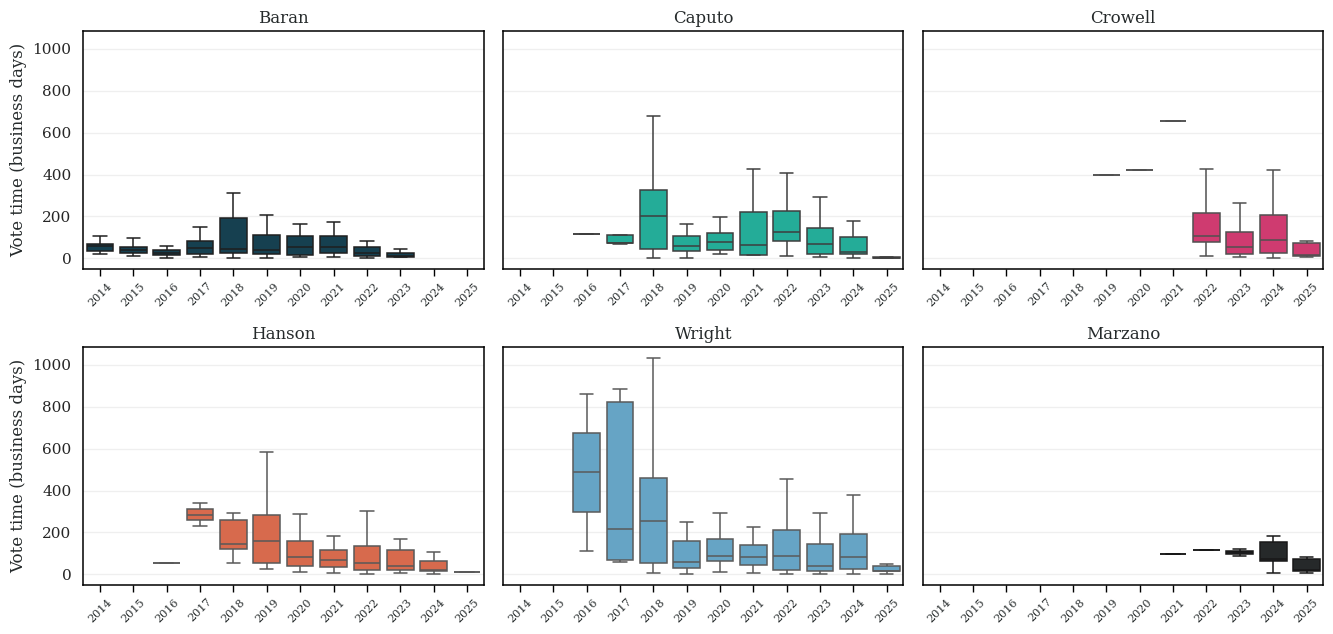

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prep
df = df_plot.copy()
df['SECY Year'] = pd.to_numeric(df['SECY Year'], errors='coerce')
df['voter'] = df['voter'].astype(str).str.strip().str.capitalize()
df = df.dropna(subset=['SECY Year', 'Vote_Business_Days'])

selected_commissioners = ["Baran", "Caputo", "Crowell", "Hanson", "Wright", "Marzano"]
df = df[df['voter'].isin(selected_commissioners)].copy()

years_full = np.arange(2014, 2026)

fig, axes = plt.subplots(2, 3, figsize=(13.5, 6.5), sharey=True)
axes = axes.flatten()

fig.patch.set_facecolor('white')
for ax in axes:
    ax.set_facecolor('white')

for ax, voter in zip(axes, selected_commissioners):
    c = commissioner_colors.get(voter, PALETTE["COAL"])
    d = df[df['voter'] == voter].copy()
    d['SECY Year'] = d['SECY Year'].astype(int)

    sns.boxplot(
        data=d,
        x='SECY Year', y='Vote_Business_Days',
        order=years_full,
        showfliers=False,
        color=c,
        linewidth=1.1,
        ax=ax
    )

    ax.set_title(voter, color=PALETTE["COAL"])
    ax.set_xlabel("")
    ax.set_xlim(-0.5, len(years_full)-0.5)
    ax.set_xticklabels(years_full, rotation=45, fontsize=8, ha='center', color=PALETTE["COAL"])

    ax.tick_params(axis='x', direction='out', length=5, width=1, color='black', bottom=True, top=False)
    ax.tick_params(axis='y', direction='out', length=5, width=1, color='black')

    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1.1)

    ax.grid(axis='y', linestyle='-', alpha=0.3)
    ax.grid(axis='x', visible=False)

axes[0].set_ylabel("Vote time (business days)", color=PALETTE["COAL"])
axes[3].set_ylabel("Vote time (business days)", color=PALETTE["COAL"])

plt.tight_layout()
plt.show()


# Figure 8

Font family in use: DejaVu Serif
Chair order earliest → latest: ['Jackson', 'Dicus', 'Meserve', 'Diaz', 'Klein', 'Jaczko', 'Macfarlane', 'Burns', 'Svinicki', 'Hanson', 'Wright']


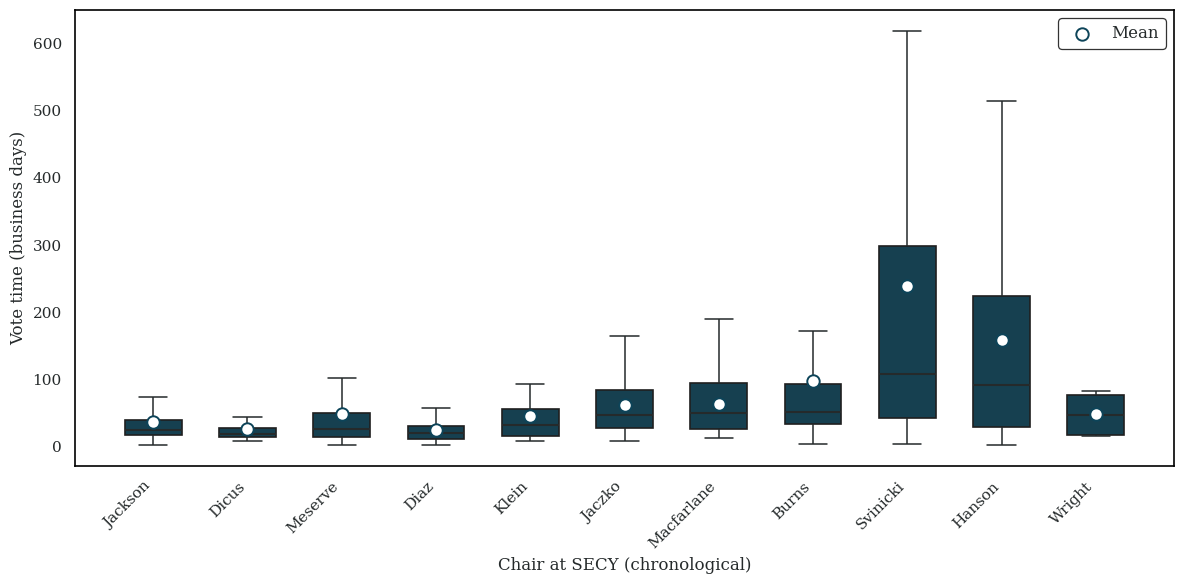

In [115]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os, subprocess

df = merged_with_allterm.loc[
    merged_with_allterm['last_vote'] == True,
    ['Chair at CVR', 'Chair at SECY', 'SECY_number', 'Original_Vote_Business_Days']
].dropna(subset=['Chair at CVR','Chair at SECY','SECY_number','Original_Vote_Business_Days']).copy()

# -----------------------------
# Font setup: use uploaded "Times New Roman" if present
# -----------------------------
def pick_times_family():
    fm._load_fontmanager(try_read_cache=False)
    names = {f.name for f in fm.fontManager.ttflist}

    if "Times New Roman" in names:
        return "Times New Roman"

    if "TeX Gyre Termes" not in names:
        try:
            subprocess.run(
                "apt-get update -qq && apt-get install -y -qq fonts-texgyre >/dev/null 2>&1",
                shell=True, check=False
            )
            subprocess.run("fc-cache -fv >/dev/null 2>&1", shell=True, check=False)
            fm._load_fontmanager(try_read_cache=False)
            names = {f.name for f in fm.fontManager.ttflist}
        except Exception:
            pass

    if "TeX Gyre Termes" in names:
        return "TeX Gyre Termes"
    return "DejaVu Serif"

sns.set_style("white")

chosen_family = pick_times_family()
mpl.rcParams.update({
    "font.family": chosen_family,
    "font.size": 12,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    # force white everywhere
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "savefig.facecolor": "white",
})

# -----------------------------
# Brand palette (your colors)
# -----------------------------
PALETTE = {
    "NAVY":   "#0D4459",  # primary accent (means, linework)
    "SKY":    "#56A9D5",  # box fill (screen) — still BW-safe with hatch
    "COAL":   "#252A2B",  # axes/labels/edges
}

# -----------------------------
# Data setup
# -----------------------------
df = merged_with_allterm.loc[
    merged_with_allterm['last_vote'] == True,
    ['Chair at SECY', 'Vote Date', 'Original_Vote_Business_Days']
].dropna().copy()

df['Vote Date'] = pd.to_datetime(df['Vote Date'], errors='coerce')
chair_order = (
    df.groupby('Chair at SECY')['Vote Date']
      .min()
      .sort_values()
      .index
      .tolist()
)
print("Font family in use:", chosen_family)
print("Chair order earliest → latest:", chair_order)

# -----------------------------
# Plot
# -----------------------------
plt.rcParams.update({
    'axes.edgecolor': PALETTE["COAL"],
    'text.color': PALETTE["COAL"],
    'axes.labelcolor': PALETTE["COAL"],
    'xtick.color': PALETTE["COAL"],
    'ytick.color': PALETTE["COAL"],
})

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

bp = sns.boxplot(
    data=df,
    x='Chair at SECY',
    y='Original_Vote_Business_Days',
    order=chair_order,
    showfliers=False,
    width=0.6,
    color=PALETTE["NAVY"],
    linewidth=1.2,
    medianprops=dict(color=PALETTE["COAL"], linewidth=1.5),
    whiskerprops=dict(color=PALETTE["COAL"], linewidth=1.1),
    capprops=dict(color=PALETTE["COAL"], linewidth=1.1),
    ax=ax
)

# Hatch pattern for grayscale
for patch in ax.artists:
    patch.set_edgecolor(PALETTE["COAL"])
    patch.set_facecolor(PALETTE["NAVY"])
    patch.set_hatch("///")

# Means overlay
means = (
    df.groupby('Chair at SECY')['Original_Vote_Business_Days']
      .mean()
      .reindex(chair_order)
)
centers = ax.get_xticks()
ax.scatter(
    x=centers,
    y=means.values,
    s=80,
    facecolors="white",
    edgecolors=PALETTE["NAVY"],
    linewidths=1.4,
    zorder=3,
    label='Mean'
)

# Legend
leg = ax.legend(
    frameon=True,
    loc='upper right',
    prop={'family': chosen_family, 'size': 12}
)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(0.9)

# Labels & ticks
ax.set_xlabel('Chair at SECY (chronological)', color=PALETTE["COAL"])
ax.set_ylabel('Vote time (business days)', color=PALETTE["COAL"])
plt.xticks(rotation=45, ha='right')

# Borders
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

ax.tick_params(axis='x', direction='out', length=6, width=1, color='black')
ax.tick_params(axis='y', direction='out', length=6, width=1, color='black')

plt.tight_layout()
plt.show()


In [116]:
# Summary statistics table for the same data used in the boxplot

# keep exactly the same df definition you used for the plot
df = merged_with_allterm.loc[
    merged_with_allterm['last_vote'] == True,
    ['Chair at SECY', 'Vote Date', 'Original_Vote_Business_Days']
].dropna().copy()

df['Vote Date'] = pd.to_datetime(df['Vote Date'], errors='coerce')
df = df.dropna(subset=['Vote Date'])

# same chronological order as the plot
chair_order = (
    df.groupby('Chair at SECY')['Vote Date']
      .min()
      .sort_values()
      .index
      .tolist()
)

summary_table = (
    df.groupby('Chair at SECY')
      .agg(
          n_obs=('Original_Vote_Business_Days', 'size'),
          mean=('Original_Vote_Business_Days', 'mean'),
          median=('Original_Vote_Business_Days', 'median'),
          std=('Original_Vote_Business_Days', 'std'),
          min=('Original_Vote_Business_Days', 'min'),
          q1=('Original_Vote_Business_Days', lambda x: x.quantile(0.25)),
          q3=('Original_Vote_Business_Days', lambda x: x.quantile(0.75)),
          max=('Original_Vote_Business_Days', 'max'),
          iqr=('Original_Vote_Business_Days', lambda x: x.quantile(0.75) - x.quantile(0.25)),
          first_vote_date=('Vote Date', 'min'),
          last_vote_date=('Vote Date', 'max'),
      )
      .reindex(chair_order)
      .reset_index()
)

# optional: nicer rounding
num_cols = ['mean','median','std','min','q1','q3','max','iqr']
summary_table[num_cols] = summary_table[num_cols].round(2)

summary_table


Chair at SECY  n_obs    mean  median     std   min     q1      q3     max  \
0        Jackson    184   37.16    25.0   46.46   2.0  17.00   40.00   367.0   
1          Dicus     34   26.71    19.5   22.39   8.0  14.00   27.75   103.0   
2        Meserve    161   49.34    26.0   65.93   2.0  14.00   50.00   517.0   
3           Diaz    148   25.28    20.0   21.92   2.0  11.00   31.00   155.0   
4          Klein    116   45.22    33.0   49.99   8.0  16.75   57.00   417.0   
5         Jaczko    109   62.39    48.0   48.93   8.0  28.00   84.00   293.0   
6     Macfarlane     64   64.30    50.0   43.57  13.0  26.75   94.25   190.0   
7          Burns     66   97.88    52.5  169.69   4.0  33.50   93.00  1271.0   
8       Svinicki     91  238.62   109.0  298.94   4.0  43.00  298.50  1245.0   
9         Hanson     70  159.07    92.0  180.76   3.0  29.50  224.50   906.0   
10        Wright      4   48.25    47.0   35.68  16.0  18.25   77.00    83.0   

       iqr first_vote_date last_vote_date  
0    23.00      1997-08-05     2000-06-30  
1    13.75      1999-07-23     2000-02-23  
2    36.00      1999-11-19     2003-10-31  
3    20.00      2003-06-13     2006-08-18  
4    40.25      2006-07-31     2010-11-08  
5    56.00      2009-06-26     2013-02-11  
6    67.50      2012-08-20     2015-10-01  
7    59.50      2015-02-24     2021-11-03  
8   255.50      2017-04-06     2024-06-06  
9   195.00      2021-03-19     2025-09-29  
10   58.75      2025-04-18     2025-10-17

In [117]:
import numpy as np
import pandas as pd

# --- Ensure datetime columns ---
merged_with_allterm['SECY Date'] = pd.to_datetime(merged_with_allterm['SECY Date'], errors='coerce')
merged_with_allterm['Chair at SECY Start Date'] = pd.to_datetime(merged_with_allterm['Chair at SECY Start Date'], errors='coerce')
merged_with_allterm['Chair at SECY End Date'] = pd.to_datetime(merged_with_allterm['Chair at SECY End Date'], errors='coerce')

# --- Build a Chair -> Next Chair mapping (chronological by chair term start) ---
chair_terms = (
    merged_with_allterm[['Chair at SECY', 'Chair at SECY Start Date', 'Chair at SECY End Date']]
    .dropna(subset=['Chair at SECY', 'Chair at SECY Start Date'])
    .drop_duplicates()
    .groupby('Chair at SECY', as_index=False)
    .agg(
        chair_term_start=('Chair at SECY Start Date', 'min'),
        chair_term_end=('Chair at SECY End Date', 'max')
    )
    .sort_values(['chair_term_start', 'chair_term_end'])
    .reset_index(drop=True)
)

chair_terms['next_chair'] = chair_terms['Chair at SECY'].shift(-1)
next_chair_map = chair_terms.set_index('Chair at SECY')['next_chair'].to_dict()

merged_with_allterm['next_chair'] = merged_with_allterm['Chair at SECY'].map(next_chair_map)

# --- Compute business days before chair term end (SECY Date -> Chair End Date) ---
valid = merged_with_allterm['SECY Date'].notna() & merged_with_allterm['Chair at SECY End Date'].notna()

bdays = np.full(len(merged_with_allterm), np.nan)
secy_d = merged_with_allterm.loc[valid, 'SECY Date'].values.astype('datetime64[D]')
end_d  = merged_with_allterm.loc[valid, 'Chair at SECY End Date'].values.astype('datetime64[D]')
bdays[valid.to_numpy()] = np.busday_count(secy_d, end_d)

merged_with_allterm['bdays_before_chair_end'] = bdays

# --- Define "within last 60 business days" ---
within_last60 = valid & (merged_with_allterm['bdays_before_chair_end'] < 60)

# --- responsible_chair rule:
# if within last 60 business days -> next chair (EXCEPT Wright, keep Wright)
# otherwise -> current chair
merged_with_allterm['responsible_chair'] = merged_with_allterm['Chair at SECY']

use_next = within_last60 & merged_with_allterm['Chair at SECY'].ne('Wright') & merged_with_allterm['next_chair'].notna()
merged_with_allterm.loc[use_next, 'responsible_chair'] = merged_with_allterm.loc[use_next, 'next_chair']

# (optional) drop helper column if you don't want it
# merged_with_allterm = merged_with_allterm.drop(columns=['next_chair'])


In [118]:
import numpy as np
import pandas as pd

# --- Work on a copy so merged_with_timeline is unchanged ---
tmp = merged_with_allterm.copy()
tmp.columns = tmp.columns.str.strip()  # safe, in case of trailing spaces

# Ensure datetime (in the copy only)
tmp['SECY Date'] = pd.to_datetime(tmp['SECY Date'], errors='coerce')
tmp['Chair at SECY Start Date'] = pd.to_datetime(tmp['Chair at SECY Start Date'], errors='coerce')
tmp['Chair at SECY End Date'] = pd.to_datetime(tmp['Chair at SECY End Date'], errors='coerce')

# Compute business days before chair term end (SECY Date -> Chair End Date), only where valid
valid = (
    tmp['SECY Date'].notna() &
    tmp['Chair at SECY Start Date'].notna() &
    tmp['Chair at SECY End Date'].notna()
)

within_term = valid & (
    (tmp['SECY Date'] >= tmp['Chair at SECY Start Date']) &
    (tmp['SECY Date'] <= tmp['Chair at SECY End Date'])
)

tmp['bdays_before_chair_end'] = np.nan

secy_d = tmp.loc[valid, 'SECY Date'].values.astype('datetime64[D]')
end_d  = tmp.loc[valid, 'Chair at SECY End Date'].values.astype('datetime64[D]')

tmp.loc[valid, 'bdays_before_chair_end'] = np.busday_count(secy_d, end_d)

tmp['introduced_within_last_60_bdays_of_chair_term'] = (
    within_term & (tmp['bdays_before_chair_end'] < 60)   # use <= 60 if you want inclusive
)

# --- Your aggregation code (unchanged), but run on tmp ---
secy_level = (
    tmp.sort_values('SECY Date')
      .groupby('SECY_number', as_index=False)
      .agg({
          'SECY Date': 'first',
          'Chair at SECY': lambda s: s.dropna().iloc[0] if s.notna().any() else np.nan,
          'Chair at SECY Start Date': lambda s: s.dropna().iloc[0] if s.notna().any() else np.nan,
          'Chair at SECY End Date': lambda s: s.dropna().iloc[0] if s.notna().any() else np.nan,
          'bdays_before_chair_end': 'min',
          'introduced_within_last_60_bdays_of_chair_term': 'max'
      })
)

secy_level = secy_level[
    secy_level['Chair at SECY'].notna() &
    secy_level['bdays_before_chair_end'].notna()
].copy()

chair_summary_last60 = (
    secy_level
    .groupby('Chair at SECY')
    .agg(
        total_secys=('SECY_number', 'nunique'),
        last60_secys=('introduced_within_last_60_bdays_of_chair_term', 'sum'),
        share_last60=('introduced_within_last_60_bdays_of_chair_term', 'mean'),
        chair_term_start=('Chair at SECY Start Date', 'min'),
        chair_term_end=('Chair at SECY End Date', 'max'),
    )
    .reset_index()
)

chair_summary_last60['share_last60'] = (chair_summary_last60['share_last60'] * 100).round(1)

chair_summary_last60 = chair_summary_last60.sort_values(
    ['chair_term_start', 'chair_term_end', 'Chair at SECY'],
    ascending=[True, True, True]
).reset_index(drop=True)

chair_summary_last60

Chair at SECY  total_secys  last60_secys  share_last60 chair_term_start  \
0        Jackson          184            20          10.9       1995-07-01   
1          Dicus           34            16          47.1       1999-07-01   
2        Meserve          161             6           3.7       1999-10-29   
3           Diaz          148            11           7.4       2003-04-01   
4          Klein          116            10           8.6       2006-07-01   
5         Jaczko          109            12          11.0       2009-05-13   
6     Macfarlane           64             9          14.1       2012-07-09   
7          Burns           66             6           9.1       2015-01-01   
8       Svinicki           91             8           8.8       2017-01-23   
9         Hanson           70             0           0.0       2021-01-20   
10        Wright            4             2          50.0       2025-01-20   

   chair_term_end  
0      1999-06-30  
1      1999-10-28  
2      2003-03-31  
3      2006-06-30  
4      2009-05-12  
5      2012-07-08  
6      2014-12-31  
7      2017-01-22  
8      2021-01-19  
9      2025-01-19  
10     2025-06-30

In [119]:
import numpy as np
import pandas as pd

tmp = merged_with_allterm.copy()
tmp.columns = tmp.columns.str.strip()

# --- basic cleaning (helps avoid silent mismatches) ---
for c in ['Chair at SECY', 'responsible_chair']:
    if c in tmp.columns:
        tmp[c] = tmp[c].astype(str).str.strip().replace({'nan': np.nan})

# --- ensure datetime ---
tmp['SECY Date'] = pd.to_datetime(tmp['SECY Date'], errors='coerce')
tmp['Chair at SECY Start Date'] = pd.to_datetime(tmp['Chair at SECY Start Date'], errors='coerce')
tmp['Chair at SECY End Date'] = pd.to_datetime(tmp['Chair at SECY End Date'], errors='coerce')

# --- compute last-60-business-days flag ---
valid = tmp['SECY Date'].notna() & tmp['Chair at SECY Start Date'].notna() & tmp['Chair at SECY End Date'].notna()
within_term = valid & (tmp['SECY Date'] >= tmp['Chair at SECY Start Date']) & (tmp['SECY Date'] <= tmp['Chair at SECY End Date'])

tmp['bdays_before_chair_end'] = np.nan
secy_d = tmp.loc[valid, 'SECY Date'].values.astype('datetime64[D]')
end_d  = tmp.loc[valid, 'Chair at SECY End Date'].values.astype('datetime64[D]')
tmp.loc[valid, 'bdays_before_chair_end'] = np.busday_count(secy_d, end_d)

tmp['within_last60'] = within_term & (tmp['bdays_before_chair_end'] < 60)  # change to <=60 if desired

# --- build Chair -> Next Chair map (chronological) ---
chair_terms = (
    tmp[['Chair at SECY', 'Chair at SECY Start Date', 'Chair at SECY End Date']]
      .dropna(subset=['Chair at SECY', 'Chair at SECY Start Date'])
      .drop_duplicates()
      .groupby('Chair at SECY', as_index=False)
      .agg(
          chair_term_start=('Chair at SECY Start Date', 'min'),
          chair_term_end=('Chair at SECY End Date', 'max'),
      )
      .sort_values(['chair_term_start', 'chair_term_end'])
      .reset_index(drop=True)
)

chair_terms['next_chair'] = chair_terms['Chair at SECY'].shift(-1)
next_map = chair_terms.set_index('Chair at SECY')['next_chair'].to_dict()

tmp['expected_responsible_chair'] = tmp['Chair at SECY']
tmp['next_chair'] = tmp['Chair at SECY'].map(next_map)

use_next = tmp['within_last60'] & tmp['Chair at SECY'].ne('Wright') & tmp['next_chair'].notna()
tmp.loc[use_next, 'expected_responsible_chair'] = tmp.loc[use_next, 'next_chair']

# --- audit vs existing responsible_chair ---
if 'responsible_chair' not in tmp.columns:
    print("No 'responsible_chair' column found in merged_with_allterm yet.")
else:
    mismatches = tmp[
        tmp['expected_responsible_chair'].fillna('') != tmp['responsible_chair'].fillna('')
    ].copy()

    # Useful view: one row per SECY_number (since your df has multiple rows per SECY)
    mismatch_secys = (
        mismatches.sort_values('SECY Date')
                  .drop_duplicates('SECY_number')
                  [['SECY_number','SECY Date','Chair at SECY','Chair at SECY End Date',
                    'bdays_before_chair_end','within_last60','next_chair',
                    'responsible_chair','expected_responsible_chair']]
    )

    print(f"Mismatched SECYs: {mismatch_secys.shape[0]}")
    mismatch_secys


Mismatched SECYs: 0


In [120]:

Svinicki_secys = (
    merged_with_allterm[
        merged_with_allterm['Chair at SECY'].eq('Svinicki') &
        merged_with_allterm['bdays_before_chair_end'].notna() &
        (merged_with_allterm['bdays_before_chair_end'] <= 70)
    ]
    .sort_values('SECY Date')
    .drop_duplicates('SECY_number')  # optional: one row per SECY
    [['SECY_number', 'SECY Date', 'Chair at SECY Start Date', 'Chair at SECY End Date',
      'bdays_before_chair_end', 'responsible_chair']]
)

Svinicki_secys


SECY_number  SECY Date Chair at SECY Start Date Chair at SECY End Date  \
3112  SECY-20-0095 2020-10-19               2017-01-23             2021-01-19   
3115  SECY-20-0098 2020-10-21               2017-01-23             2021-01-19   
3118  SECY-20-0102 2020-10-30               2017-01-23             2021-01-19   
3121  SECY-20-0109 2020-11-30               2017-01-23             2021-01-19   
3131  SECY-20-0111 2020-12-07               2017-01-23             2021-01-19   
3126  SECY-20-0110 2020-12-07               2017-01-23             2021-01-19   
3132  SECY-20-0112 2020-12-09               2017-01-23             2021-01-19   
3138  SECY-21-0001 2020-12-31               2017-01-23             2021-01-19   
3139  SECY-21-0004 2021-01-14               2017-01-23             2021-01-19   
3145  SECY-21-0006 2021-01-15               2017-01-23             2021-01-19   

      bdays_before_chair_end responsible_chair  
3112                    66.0          Svinicki  
3115                    64.0          Svinicki  
3118                    57.0            Hanson  
3121                    36.0            Hanson  
3131                    31.0            Hanson  
3126                    31.0            Hanson  
3132                    29.0            Hanson  
3138                    13.0            Hanson  
3139                     3.0            Hanson  
3145                     2.0            Hanson

Font family in use: DejaVu Serif
Responsible chair order earliest → latest: ['Jackson', 'Dicus', 'Meserve', 'Diaz', 'Klein', 'Jaczko', 'Macfarlane', 'Burns', 'Svinicki', 'Hanson', 'Wright']


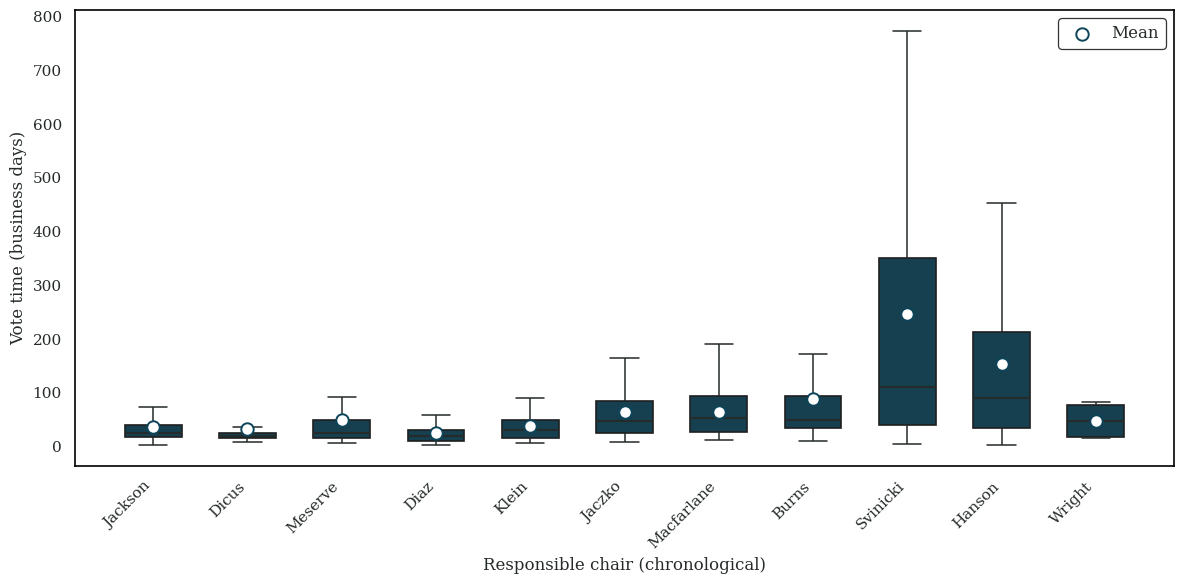

In [121]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os, subprocess

# -----------------------------
# Font setup: use uploaded "Times New Roman" if present
# -----------------------------
def pick_times_family():
    fm._load_fontmanager(try_read_cache=False)
    names = {f.name for f in fm.fontManager.ttflist}

    if "Times New Roman" in names:
        return "Times New Roman"

    if "TeX Gyre Termes" not in names:
        try:
            subprocess.run(
                "apt-get update -qq && apt-get install -y -qq fonts-texgyre >/dev/null 2>&1",
                shell=True, check=False
            )
            subprocess.run("fc-cache -fv >/dev/null 2>&1", shell=True, check=False)
            fm._load_fontmanager(try_read_cache=False)
            names = {f.name for f in fm.fontManager.ttflist}
        except Exception:
            pass

    if "TeX Gyre Termes" in names:
        return "TeX Gyre Termes"
    return "DejaVu Serif"

sns.set_style("white")

chosen_family = pick_times_family()
mpl.rcParams.update({
    "font.family": chosen_family,
    "font.size": 12,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "savefig.facecolor": "white",
})

# -----------------------------
# Brand palette (your colors)
# -----------------------------
PALETTE = {
    "NAVY":   "#0D4459",
    "SKY":    "#56A9D5",
    "COAL":   "#252A2B",
}

# -----------------------------
# Data setup (BY responsible_chair)
# -----------------------------
df = merged_with_allterm.loc[
    merged_with_allterm['last_vote'] == True,
    ['responsible_chair', 'Vote Date', 'Original_Vote_Business_Days']
].dropna(subset=['responsible_chair', 'Vote Date', 'Original_Vote_Business_Days']).copy()

df['Vote Date'] = pd.to_datetime(df['Vote Date'], errors='coerce')
df = df.dropna(subset=['Vote Date'])

chair_order = (
    df.groupby('responsible_chair')['Vote Date']
      .min()
      .sort_values()
      .index
      .tolist()
)

print("Font family in use:", chosen_family)
print("Responsible chair order earliest → latest:", chair_order)

# -----------------------------
# Plot
# -----------------------------
plt.rcParams.update({
    'axes.edgecolor': PALETTE["COAL"],
    'text.color': PALETTE["COAL"],
    'axes.labelcolor': PALETTE["COAL"],
    'xtick.color': PALETTE["COAL"],
    'ytick.color': PALETTE["COAL"],
})

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

bp = sns.boxplot(
    data=df,
    x='responsible_chair',
    y='Original_Vote_Business_Days',
    order=chair_order,
    showfliers=False,
    width=0.6,
    color=PALETTE["NAVY"],
    linewidth=1.2,
    medianprops=dict(color=PALETTE["COAL"], linewidth=1.5),
    whiskerprops=dict(color=PALETTE["COAL"], linewidth=1.1),
    capprops=dict(color=PALETTE["COAL"], linewidth=1.1),
    ax=ax
)

# Hatch pattern for grayscale
for patch in ax.artists:
    patch.set_edgecolor(PALETTE["COAL"])
    patch.set_facecolor(PALETTE["NAVY"])
    patch.set_hatch("///")

# Means overlay
means = (
    df.groupby('responsible_chair')['Original_Vote_Business_Days']
      .mean()
      .reindex(chair_order)
)
centers = ax.get_xticks()
ax.scatter(
    x=centers,
    y=means.values,
    s=80,
    facecolors="white",
    edgecolors=PALETTE["NAVY"],
    linewidths=1.4,
    zorder=3,
    label='Mean'
)

# Legend
leg = ax.legend(
    frameon=True,
    loc='upper right',
    prop={'family': chosen_family, 'size': 12}
)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(0.9)

# Labels & ticks
ax.set_xlabel('Responsible chair (chronological)', color=PALETTE["COAL"])
ax.set_ylabel('Vote time (business days)', color=PALETTE["COAL"])
plt.xticks(rotation=45, ha='right')

# Borders
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

ax.tick_params(axis='x', direction='out', length=6, width=1, color='black')
ax.tick_params(axis='y', direction='out', length=6, width=1, color='black')

plt.tight_layout()
plt.show()


In [122]:
# Summary statistics table for the "responsible_chair" boxplot

df = merged_with_allterm.loc[
    merged_with_allterm['last_vote'] == True,
    ['responsible_chair', 'Vote Date', 'Original_Vote_Business_Days']
].dropna(subset=['responsible_chair', 'Vote Date', 'Original_Vote_Business_Days']).copy()

df['Vote Date'] = pd.to_datetime(df['Vote Date'], errors='coerce')
df = df.dropna(subset=['Vote Date'])

# Same chronological order as the plot
chair_order = (
    df.groupby('responsible_chair')['Vote Date']
      .min()
      .sort_values()
      .index
      .tolist()
)

summary_table_resp = (
    df.groupby('responsible_chair')
      .agg(
          n_obs=('Original_Vote_Business_Days', 'size'),
          mean=('Original_Vote_Business_Days', 'mean'),
          median=('Original_Vote_Business_Days', 'median'),
          std=('Original_Vote_Business_Days', 'std'),
          min=('Original_Vote_Business_Days', 'min'),
          q1=('Original_Vote_Business_Days', lambda x: x.quantile(0.25)),
          q3=('Original_Vote_Business_Days', lambda x: x.quantile(0.75)),
          max=('Original_Vote_Business_Days', 'max'),
          iqr=('Original_Vote_Business_Days', lambda x: x.quantile(0.75) - x.quantile(0.25)),
          first_vote_date=('Vote Date', 'min'),
          last_vote_date=('Vote Date', 'max'),
      )
      .reindex(chair_order)
      .reset_index()
      .rename(columns={'responsible_chair': 'Responsible chair'})
)

# Optional: nicer rounding
num_cols = ['mean','median','std','min','q1','q3','max','iqr']
summary_table_resp[num_cols] = summary_table_resp[num_cols].round(2)

summary_table_resp


Responsible chair  n_obs    mean  median     std   min     q1      q3  \
0            Jackson    164   36.85    25.0   43.67   2.0  17.00   40.25   
1              Dicus     38   32.97    20.0   50.51   9.0  15.00   25.75   
2            Meserve    171   48.57    26.0   64.23   7.0  15.00   49.00   
3               Diaz    143   25.17    20.0   22.46   2.0  11.00   31.00   
4              Klein    117   38.21    31.0   31.59   6.0  16.00   50.00   
5             Jaczko    107   64.14    48.0   59.71   8.0  26.00   84.00   
6         Macfarlane     67   63.64    54.0   42.71  13.0  26.50   93.50   
7              Burns     69   88.23    50.0  154.94  10.0  35.00   94.00   
8           Svinicki     89  246.89   111.0  302.78   4.0  41.00  351.00   
9             Hanson     78  154.40    91.0  174.10   3.0  34.00  212.75   
10            Wright      4   48.25    47.0   35.68  16.0  18.25   77.00   

       max     iqr first_vote_date last_vote_date  
0    367.0   23.25      1997-08-05     2000-06-30  
1    310.0   10.75      1999-04-23     2000-06-30  
2    517.0   34.00      1999-09-02     2003-10-31  
3    155.0   20.00      2003-02-10     2006-06-07  
4    184.0   34.00      2006-05-03     2009-05-11  
5    417.0   58.00      2009-03-24     2012-11-29  
6    191.0   67.00      2012-05-21     2015-04-20  
7   1271.0   59.00      2014-12-02     2021-11-03  
8   1245.0  310.00      2016-12-12     2024-06-06  
9    906.0  178.75      2021-01-26     2025-09-29  
10    83.0   58.75      2025-04-18     2025-10-17

In [123]:
# Save to CSV
output_path = '/content/drive/Shareddrives/Nuclear/Projects/2025/NRC Commission vote efficiency/data/merged_with_allterm.csv'
merged_with_allterm.to_csv(output_path, index=False)

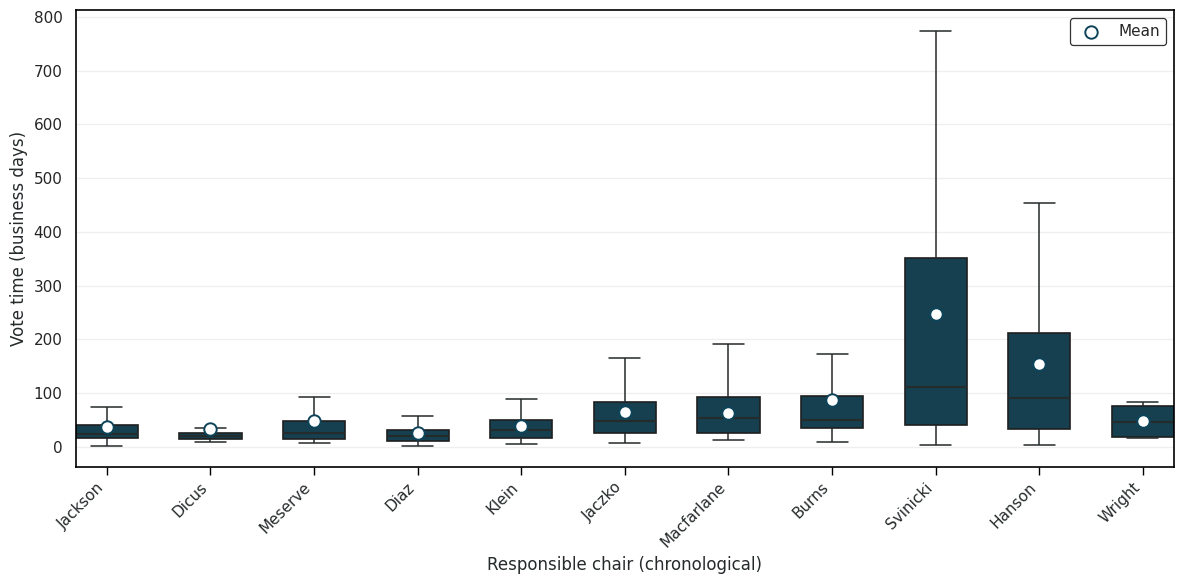

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Font (Colab-safe Times-style fallback) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size']   = 12

# Brand palette (same spirit as your other figures)
PALETTE = {
    "navy": "#0D4459",
    "coal": "#252A2B",
}

sns.set_style("white")

# -----------------------------
# Data setup (BY responsible_chair)
# -----------------------------
df = merged_with_allterm.loc[
    merged_with_allterm['last_vote'] == True,
    ['responsible_chair', 'Vote Date', 'Original_Vote_Business_Days']
].dropna(subset=['responsible_chair', 'Vote Date', 'Original_Vote_Business_Days']).copy()

df['Vote Date'] = pd.to_datetime(df['Vote Date'], errors='coerce')
df = df.dropna(subset=['Vote Date'])

# Chronological order by earliest vote date per responsible chair
chair_order = (
    df.groupby('responsible_chair')['Vote Date']
      .min()
      .sort_values()
      .index
      .tolist()
)

# -----------------------------
# Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

bp = sns.boxplot(
    data=df,
    x='responsible_chair',
    y='Original_Vote_Business_Days',
    order=chair_order,
    showfliers=False,
    width=0.6,
    color=PALETTE["navy"],
    linewidth=1.2,
    medianprops=dict(color=PALETTE["coal"], linewidth=1.5),
    whiskerprops=dict(color=PALETTE["coal"], linewidth=1.1),
    capprops=dict(color=PALETTE["coal"], linewidth=1.1),
    ax=ax
)

# Hatch pattern for grayscale
for patch in ax.artists:
    patch.set_edgecolor(PALETTE["coal"])
    patch.set_facecolor(PALETTE["navy"])
    patch.set_hatch("///")

# Means overlay
means = (
    df.groupby('responsible_chair')['Original_Vote_Business_Days']
      .mean()
      .reindex(chair_order)
)
centers = ax.get_xticks()
ax.scatter(
    x=centers,
    y=means.values,
    s=80,
    facecolors="white",
    edgecolors=PALETTE["navy"],
    linewidths=1.4,
    zorder=3,
    label='Mean'
)

# Labels
ax.set_xlabel('Responsible chair (chronological)', color=PALETTE["coal"])
ax.set_ylabel('Vote time (business days)', color=PALETTE["coal"])

# X ticks: show ALL chairs; no extra padding
ax.set_xticks(centers)
ax.set_xticklabels(chair_order, rotation=45, ha='right', color=PALETTE["coal"])
ax.margins(x=0)

# Tick marks + border
ax.tick_params(axis='x', direction='out', length=6, width=1, color='black', bottom=True, top=False)
ax.tick_params(axis='y', direction='out', length=6, width=1, color='black')
for spine in ax.spines.values():
    spine.set_color('black'); spine.set_linewidth(1.2)

# Only horizontal grid lines
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', visible=False)

# Legend (upper right) with border
leg = ax.legend(frameon=True, loc='upper right')
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(0.9)

plt.tight_layout()
plt.show()


In [125]:
import subprocess
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def pick_times_family():
    # refresh font cache
    fm._load_fontmanager(try_read_cache=False)
    names = {f.name for f in fm.fontManager.ttflist}

    # If it's already available, use it
    if "Times New Roman" in names:
        return "Times New Roman"

    # Try installing Microsoft core fonts (may fail on some environments)
    try:
        subprocess.run("apt-get update -qq", shell=True, check=False)
        subprocess.run(
            "apt-get install -y -qq ttf-mscorefonts-installer >/dev/null 2>&1",
            shell=True, check=False
        )
        subprocess.run("fc-cache -fv >/dev/null 2>&1", shell=True, check=False)
        fm._load_fontmanager(try_read_cache=False)
        names = {f.name for f in fm.fontManager.ttflist}
        if "Times New Roman" in names:
            return "Times New Roman"
    except Exception:
        pass

    # Very close Times-like fallback
    if "TeX Gyre Termes" not in names:
        try:
            subprocess.run(
                "apt-get install -y -qq fonts-texgyre >/dev/null 2>&1",
                shell=True, check=False
            )
            subprocess.run("fc-cache -fv >/dev/null 2>&1", shell=True, check=False)
            fm._load_fontmanager(try_read_cache=False)
            names = {f.name for f in fm.fontManager.ttflist}
        except Exception:
            pass

    if "TeX Gyre Termes" in names:
        return "TeX Gyre Termes"

    return "DejaVu Serif"

chosen_family = pick_times_family()

# --- Apply font (must be before plotting) ---
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": [chosen_family, "Times New Roman", "Times", "DejaVu Serif"],
    "font.size": 12,
})

# --- Verify what Matplotlib will actually use ---
prop = fm.FontProperties(family=chosen_family)
print("Requested family:", chosen_family)
print("Resolved font file:", fm.findfont(prop))


Requested family: DejaVu Serif
Resolved font file: /usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf
